<a href="https://colab.research.google.com/github/Shailesh0209/Machine_Learning_Practicals-MLP/blob/main/MLP_Workbook_V0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLP

---



#Libraries:

---



In [ ]:
from IPython.display import display, Math, Latex
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

from sklearn.datasets import fetch_california_housing, fetch_openml, make_classification, fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder, LabelBinarizer, MultiLabelBinarizer
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import RFE,SelectFromModel, SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, classification_report, make_scorer, hinge_loss, log_loss
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve

# Exercises:

---



##Week2: (Sklearn Methods)

---



This colab is modified verion of @CKPIITM [colab](https://colab.research.google.com/gist/CKPIITM/8fe82e0a9821bc3604515d5e9687519e/mlp_week_2.ipynb#scrollTo=bw6buzQP35zp) (source)


In [ ]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')


### 1. DictVectorizer

---




#### Excercise:1

---



In [ ]:
#Given the following:
data = [{'age':4,'height':96.0},{'age':1,'height':73.9},{'age':3,'height':88.9},{'age':2,'height':81.6}]

Q1: If keys of the dictionary are considered as features, How many features and data samples are present in 'data' ?

Q2: Convert the above list of dictionary objects to the feature matrix

In [ ]:
#Hints:
from sklearn._______ import DictVectorizer
dv = DictVectorizer(________ =False)


Solution: 

---



There are 4 data samples with 2 features each.
Using `DictVectorizer` convert the list of dictionary objects to the feature matrix.


In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) 
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

#### Exercise:2

---



In [ ]:
#Given the following:
data = [{'age':4,'height':96.0, 'weight':275.8},{'age':1,'height':73.9},{'age':3,'height':88.9},{'age':2,'height':81.6}]

Q1: If keys of the dictionary are considered as features, How many features and data samples are present in 'data' ?

Q2: Convert the above list of dictionary objects to the feature matrix

In [ ]:
#Hints:
from sklearn._______ import DictVectorizer
dv = DictVectorizer(________ =False)


### 2. SimpleImputer

---




#### Exercise1:

---



In [ ]:
from sklearn.__________ import SimpleImputer

Use the following dataset and answer the preceeding questions:


---



In [ ]:
cols =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
hd =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols) 

Q1: Using appropriate pandas method, finout:
1. Total entries
2. Total columns
3. Missing values overview
4. #of different data types of the features
5. Memory usage

---



Solution:

---



In [ ]:
hd.info() #without parentesis also it gives some output 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Q2: check if there are any missing values in numerical columns

---




Solution:

---



In [ ]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Q3. From the two non-numerical features `ca` and `thal`
* Find their unique values
* FInd the count of '?' in each of the two columns mentioned 

---




Solution:

---



In [ ]:
print('Unique values in ca:', hd.ca.unique())
print('Unique values in thal:', hd.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


Both of them contain `?`, which is a missing values. Let's count the number of missing values.

In [ ]:
print('# missing vlaue in ca:', hd.loc[hd.ca=='?', 'ca'].count())
print('# missing vlaue in ca:', hd.loc[hd.thal=='?', 'thal'].count())


# missing vlaue in ca: 4
# missing vlaue in ca: 2


Q4: Replace '?' with np.nan for the entire dataset

---



In [ ]:
hd.replace('?',np.nan, inplace=True)

Q5: Do the following steps:
1. Instantiate a 'SimpleImputer' object by the name 'imputer' with missing_values=np.nan, strategy = 'mean' and add_indicator = False parameters
2. fit_transform 'hd' and save it to variable 'hd1_imputed'
3. find  hd1_imputed.shape

---



In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
hd1_imputed = imputer.fit_transform(hd)
print(hd1_imputed.shape)

(303, 14)


Q6: Do the following steps:
1. Instantiate a 'SimpleImputer' object by the name 'imputer' with missing_values=np.nan, strategy = 'mean' and add_indicator = True parameters
2. fit_transform 'hd' and save it to variable 'hd2_imputed'
3. find  hd2_imputed.shape

---



In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean', add_indicator=True)
hd2_imputed = imputer.fit_transform(hd) 
print(hd2_imputed.shape)

(303, 16)

Q7. Compare hd1_imputed.shape and hd2_imputed.shape, note your observations in your own words

---



### 3. KNNImputer

---



#### Exercise1:

---



Q1: `X = np.array([[1,None,3],[4,5,8], [None,7,9], [8,8,7]])`
- replace None with values using KNNImputer with 2 nearest neighbors and uniform weights

Solution:

---



Q1: `X = np.array([[1,None,3],[4,5,8], [None,7,9], [8,8,7]])`
- replace None with values using KNNImputer with 2 nearest neighbors and uniform weights

Solution:

---



In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

X = np.array([[1,None,3],[4,5,8], [None,7,9], [8,8,7]])

print(X)
print()

#steps:
#Step1: Find nearest neighbors of [ 1. nan  3.]:(formula)
print('row2:', (((1-4)**2 + (3-8)**2)*3/2)**0.5 ) #row2
print('row3:', ((3-9)**2 * 3/1)**0.5)            #row3
print('row4:', (((1-8)**2 + (3-7)**2) * 3/2)**0.5 ) #row4

print()

print('row2(7.14) and row4(9.87) are nearest')

print('value corresponding to row2 is 5')
print('value corresponsing to row4 is 8')
print('(5+8/2) =' , (5+8)/2)
print()
#Step2: Pick 2 nearest neighbours based on distance 
  #row 2 and 3
  # answer = ( 5 +8 )/2 = 6.5
  #replace None with 6.5

knni = KNNImputer(n_neighbors = 2, weights = 'uniform')
res = knni.fit_transform(X)
print(res)

[[1 None 3]
 [4 5 8]
 [None 7 9]
 [8 8 7]]

row2: 7.14142842854285
row3: 10.392304845413264
row4: 9.874208829065749

row2(7.14) and row4(9.87) are nearest
value corresponding to row2 is 5
value corresponsing to row4 is 8
(5+8/2) = 6.5

[[1.  6.5 3. ]
 [4.  5.  8. ]
 [6.  7.  9. ]
 [8.  8.  7. ]]


#### Exercise2:

---



Use the following dataset and answer the preceeding questions:


---



In [ ]:
cols =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
hd =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols) 

Q1: Explore the data using .info and .describe methods

---



Solution:

---



In [ ]:
hd.info() #without parentesis also it gives some output 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Q2: check if there are any missing values in numerical columns

---




Solution:

---



In [ ]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Q3. From the two non-numerical features `ca` and `thal`
* Find their unique values
* FInd the count of '?' in each of the two columns mentioned 

---




Solution:

---



In [ ]:
print('Unique values in ca:', hd.ca.unique())
print('Unique values in thal:', hd.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


Both of them contain `?`, which is a missing values. Let's count the number of missing values.

In [ ]:
print('# missing vlaue in ca:', hd.loc[hd.ca=='?', 'ca'].count())
print('# missing vlaue in ca:', hd.loc[hd.thal=='?', 'thal'].count())


# missing vlaue in ca: 4
# missing vlaue in ca: 2


Q4: Replace '?' with np.nan for the entire dataset

---



Solution:

---



In [ ]:
hd.replace('?',np.nan, inplace=True)

Q5: Do the following steps:
1. Instantiate a '`KNNImputer`' object by the name 'kk' with `missing_values=np.nan`, `n_neighbors = 7` and `add_indicator = True` parameters
2. `fit_transform`,  `np.array(hd['ca'])`, reshape to (-1,1) if necessary and  save it to variable 'ca_imputed'
3. find  `ca_imputed[:-50]` (last 50 values)

---



Solution:

---



In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(missing_values = np.nan, n_neighbors = 7,add_indicator = True)
ca_new = knn.fit_transform(np.array(hd['ca']).reshape(-1,1))
ca_new[:-50]


Q6: Do the following steps:
1. Instantiate a '`KNNImputer`' object by the name 'kk' with `missing_values=np.nan`, `n_neighbors = 7` and `add_indicator = False` parameters
2. `fit_transform`,  `np.array(hd['thal'])`, reshape to (-1,1) if necessary and  save it to variable 'thal_imputed'
3. find  `thal_imputed[:-50]` (last 50 values)

---



Solution:

---



In [ ]:

knn = KNNImputer(missing_values = np.nan, n_neighbors = 7,add_indicator = False)
thal_imputed = knn.fit_transform(np.array(hd['thal']).reshape(-1,1))
thal_imputed[:-50]


### 4. Visualization Plots

---



#### Exercise1:(unscaled)

Use the following dataset to answer the preceeding questions:

---



In [ ]:
cols = ['sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=cols)

Q1. Using `info` method, examine the features of the `abalone_data`, do you see any null values from the result?

---



Solution:

---



In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Q2. Find the unique value for the feature '`sex`'

Solution:

---



In [ ]:
abalone_data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

Q3. Assign numerical values to sex.
- M ->1
- F ->2
- I ->3

---



Solution:

---



In [ ]:
#Assign numerical values to sex.
abalone_data = abalone_data.replace({"sex": {'M':1,'F':2, 'I':3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Q4: Create a label vector '`y`' with '`rings`' as its column data

Solution:

---



In [ ]:
y = abalone_data.pop('Rings')
print('The DataFrame object after deleting the column')
abalone_data.info()

The DataFrame object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


Q5. Using `describe` method on the feature matrix and  examine, if the features are on same scale or not

Solution:

---



In [ ]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Q6: Plot Histogram of '`Length`' feature using `plt.hist()`

Solution:

---



(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <a list of 10 Patch objects>)

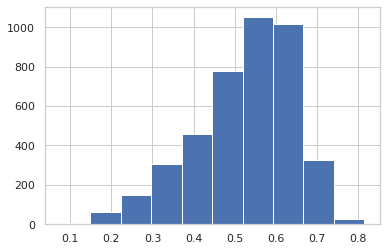

In [ ]:
%matplotlib inline
plt.hist(np.array(abalone_data['Length']))

Q7: Plot Histogram of '`Shucked weight`' feature using `plt.hist()`

Solution:

---



(array([ 786., 1052.,  962.,  775.,  399.,  123.,   46.,   24.,    7.,
           3.]),
 array([1.0000e-03, 1.4970e-01, 2.9840e-01, 4.4710e-01, 5.9580e-01,
        7.4450e-01, 8.9320e-01, 1.0419e+00, 1.1906e+00, 1.3393e+00,
        1.4880e+00]),
 <a list of 10 Patch objects>)

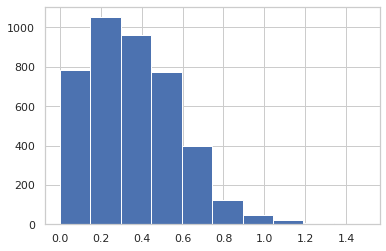

In [ ]:
plt.hist(np.array(abalone_data['Shucked weight']))

Q8a: Using `plt.hist()`, plot the histograms for each of the columns of the feature matrix onto single chart

---



Solution:

---



(array([7.770e+02, 1.023e+03, 1.078e+03, 7.980e+02, 3.490e+02, 1.040e+02,
        3.300e+01, 9.000e+00, 5.000e+00, 1.000e+00]),
 array([0.0015 , 0.10185, 0.2022 , 0.30255, 0.4029 , 0.50325, 0.6036 ,
        0.70395, 0.8043 , 0.90465, 1.005  ]),
 <a list of 10 Patch objects>)

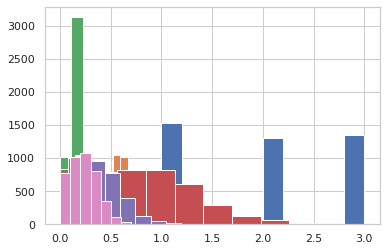

In [ ]:
plt.hist(np.array(abalone_data['sex']))
plt.hist(np.array(abalone_data['Length']))
plt.hist(np.array(abalone_data['Height']))
plt.hist(np.array(abalone_data['Whole weight']))
plt.hist(np.array(abalone_data['Shucked weight']))
plt.hist(np.array(abalone_data['Viscera weight']))
plt.hist(np.array(abalone_data['Shell weight']))

Q8b: Using `sns.histplot()`, plot the histograms for each of the columns of the feature matrix onto single chart

---



Q9a: Plot a combine kde plot for the feature matrix (`abalone_data` ) using `.plot.kde()` method

Solution:

---



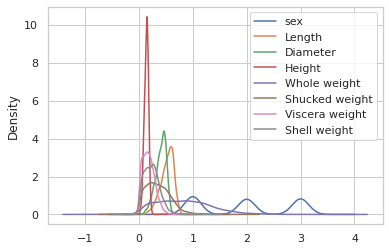

In [ ]:
#@title [KDE plots - combined]
ax =abalone_data.plot.kde()

Q9b: Plot a combine kde plot for the feature matrix (`abalone_data` ) using `.sns.kdeplot()` method

Q10. Do a `boxplot` for the feature matrix `abalone_data` with horizontal orientation

Solution:

---



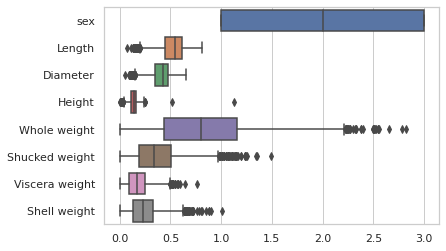

In [ ]:
ax = sns.boxplot(data=abalone_data, orient='h')

ax

Q11. Do a 'violin plot' on feature matrix using `'sns.violinplot()'`

### 5. Scaling

---



#### Exercise1:(MaxAbsScaler)

---



Q: For the below array 'x' apply MaxAbsScaler

---



In [ ]:
from sklearn._______ import MaxAbsScaler

In [ ]:
x = np.array([4,2,5,-28,-100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [ -28]
 [-100]]


Solution:

---



In [ ]:
from sklearn.preprocessing import MaxAbsScaler 
mas = MaxAbsScaler() 
x_new = mas.fit_transform(x)
x_new

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.28],
       [-1.  ]])

#### Exercise2:(MinMaxScaler)

---



Q: For the below array 'x' apply MaxAbsScaler

---



In [ ]:
from sklearn._______ import MinMaxScaler

In [ ]:
x = np.array([4,2,5,-28,-100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [ -28]
 [-100]]


Solution:

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler 
mas = MinMaxScaler() 
x_new = mas.fit_transform(x)
x_new

array([[0.99047619],
       [0.97142857],
       [1.        ],
       [0.68571429],
       [0.        ]])

#### Exercise3:(MinMaxScaler + Visualizations)

---



Use the following dataset and info to answer the preceeding questions:

---



In [ ]:
cols = ['sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=cols)

In [ ]:
#Assign numerical values to sex.
abalone_data = abalone_data.replace({"sex": {'M':1,'F':2, 'I':3}})

In [ ]:
y = abalone_data.pop('Rings')
X = abalone_data 


Q1. Use `MinMaxScaler` and scale the features in feature matrix '`X`' and save it to varaible '`X_normalized`'

Solution:

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
mm = MinMaxScaler() 
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

Q2: Find the mean and standard deviation (SD) of each feature using `.mean(axis = )` method


Solution:

---



In [ ]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [ ]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

The means and SDs of different features are now comparable. One can confirm this through visualizations.

Q3a: Plot the Histogram of tranformed features using `sns.hisplot()` method (Hint: Convert the X_normlised into a dataframe object)

---



Solution:

---



In [ ]:
cols = ['sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X_normalized = pd.DataFrame(X_normalized, columns= cols)
X_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


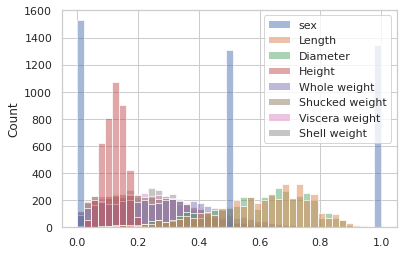

In [ ]:

sns.histplot(data=X_normalized)

Q3b: Plot the Histogram of tranformed features using `plt.hist()` method onto a single chart

---



Q4a: Plot the kde plot of tranformed features using `sns.kdeplot()` method (Hint: Convert the X_normlised into a dataframe object)

---



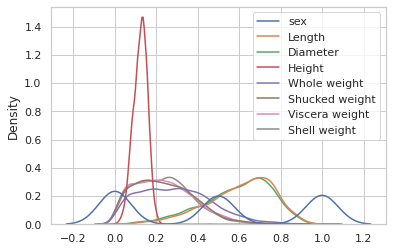

In [ ]:

sns.kdeplot(data=X_normalized)

Q4b: Plot the kde plot of tranformed features using `.plot.kde()` method 

---



Q5. Plot a boxplot on the transformed features using `sns.boxplot()`

---



Q6. Plot a violinplot using `sns.violinplot()`

---



#### Exercise4: (StandardScaler + Visualizations)

---



Use the following dataset and info to answer the preceeding questions:

---



In [ ]:
cols = ['sex', 'Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=cols)

In [ ]:
#Assign numerical values to sex.
abalone_data = abalone_data.replace({"sex": {'M':1,'F':2, 'I':3}})

In [ ]:
y = abalone_data.pop('Rings')
X = abalone_data 


Q1: Use `StandardScaler` and scale the features in feature matrix '`X`' and save it to varaible '`X_standardized`' and check first 5 value of '`X_standardized`'

---



Solution:

---



In [ ]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

Q2: Find the mean and standard deviation (SD) of each feature using `.mean(axis = )` method


---



Solution:

---



In [ ]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        8.84563616e-17,  3.40216776e-18,  6.80433551e-18,  2.89184259e-16])

In [ ]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

The `means` of different features are now comparable with SD =1

Q3: Plot a combined histogram of all the features of the 'transformed feature matrix' in one plot using `sns.histplot()` and `plt.hist()` methods

---



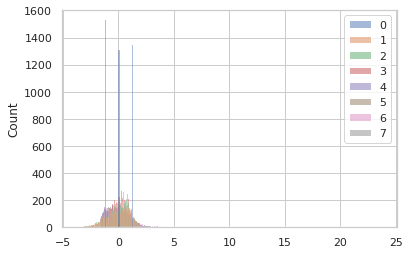

In [ ]:
#@title $[Histogram - combined]$
# create a new plot 
#sns.histplot(data=X_standardized)
in_cols=cols[:len(cols)-1]
plt.figure (figsize=(15,8))
data = pd.DataFrame(X_standardized, columns = cols)
for colname in abalone_data:
  plt.hist(data[colname].values , alpha=0.4)
plt.legend (in_cols, fontsize=18, loc='upper right',frameon=True)
plt.title('Distribution of features across samples after standardization')
plt.xlabel ('Range', fontsize=16)
plt.ylabel('Frequency',fontsize=16) 
plt.show()

Q4. Plot a kde plot using `.plot.kde()` and `sns.kdeplot()` method

---



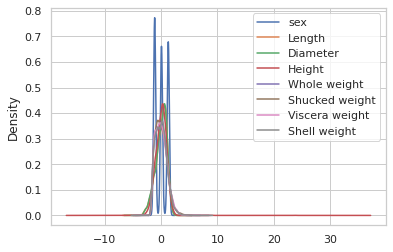

In [ ]:
data.plot.kde()

Q5. Plot a boxplot using sns.boxplot() for the transformed features

---



Solution:

---



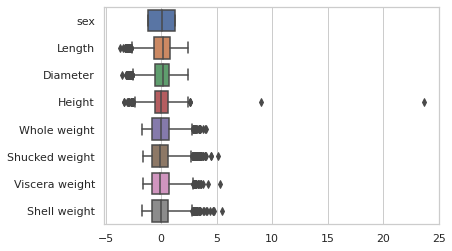

In [ ]:
#@title [Box plot]
ax = sns.boxplot(data=data , orient='h')

Q6. Plot a violin using sns.violinplot() for the transformed features

---



Solution:

---



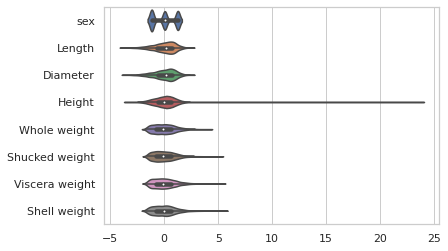

In [ ]:
ax = sns.violinplot(data = data , orient='h')

### 6. add_dummy_feature

---


#### Exercise1:

---



In [ ]:
from sklearn._______ import add_dummy_feature

Q. Use the following array 'x' and add a dummy feature to the given array

In [ ]:
x = np.array([
              [7,1],
              [1,4],
              [2,0],
              [-4,6]
])


Solution:

---



In [ ]:
from sklearn.preprocessing import add_dummy_feature 
x_new = add_dummy_feature(x)
x_new

### 7. PolynomialFeatures

---



In [ ]:
from sklearn.__________ import PolynomialFeatures

#### Exercise1:

---



Use the following dataset and info to answer preceeding questions:

---



In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')


In [ ]:
wine_data = wine_data.drop(['quality'],axis=1) #feature matrix


Q1. Find the shape of the feature matrix to give you #features before transformation

---



Q2.Fit a polynomial of degree-2 to wine_data using `PolynomialFeatures`

---



Q3. Find the shape of the feature matrix to give you #features after transformation and compare the #features before transformation

---



Solution:

---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

print('Number of features before transformation = ', wine_data.shape)

#Let us fit a polynomial of degree-2 to wine_data
poly = PolynomialFeatures() 
poly_wine_data = poly.fit_transform(wine_data) 

print('Number of features after transformation=', poly_wine_data.shape) 


Number of features before transformation =  (1599, 11)
Number of features after transformation= (1599, 78)


Note that after transformation, we have 78 features. Let's list out these features:


Q4. Get all the feature names out using appropriate method

---



Solution:

---



In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

Observe that - 
* Some features have ^2 suffix - these are degree-2 features of input features. For example, `sulphates^2` is the suqare of `sulphates` features.
* Some features are combination of names of the original feature names. For example,`total sulfur dioxide pH` is a combinationn of two features `total sulfur dioxide` and `pH`.


### 8.KBinsDiscretizer

---



In [ ]:
#KBinsDiscretizer discretizes features into k bins.
from sklearn.___________ import KBinsDiscretizer

#### Exercise1:

---



Use the following dataset to answer the preceeding questions:

---



In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')


In [ ]:
wine_data = wine_data.drop(['quality'],axis=1) #feature matrix


In [ ]:
KBinsDiscretizer?

Q1. Use `KBinsDiscretizer` method with `n_bins=10`, `encode='onehot'` parameters on `wine_data['chlorides'] and use `fit_transform` and save it to `'X_binned' variable

>*Hint: Convert the column to array and reshape to (-1,1) if needed*



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1) 
X_binned = enc.fit_transform(X) 

In [ ]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

Q3: Convert 'X_binned' to array and print the first 5 values

---



In [ ]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### 9. Handling Categorical Features

#### Exercise1:(OneHotEncoding,  OrdinalEncoder and LabelEncoder)

---



In [ ]:
from sklearn._____________ import OneHotEncoder 
from sklearn._____________ import OrdinalEncoder 
from sklearn._____________ import LabelEncoder 



Use the following dataset and info to answer preceeding questions:

---



[Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) has the following features:

    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal widht in cm
    5. class: Iris Setosa, Iris Versicolour, Iris Virginica

Q1. Use `pd.read_csv()` method to load the iris dataset with following instructions
- `names =['sepal length','sepal width','petal width','label']`
- `'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'`
- `header = None`


---



Solution:

---



In [ ]:
cols =['sepal length','sepal width','petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_data.head() 

,sepal length,sepal width,petal width,label
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


Q2. The `label` is a categorical attribute, using unique method find the unique classes of the `label`

---



Solution:

---



In [ ]:
iris_data.label.unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Q3. Convert the class labels (classes of the labels)  to one hot vector using `OneHotEncoder`

Solution:

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categories='auto')
print('shape of y before Encoding', iris_data.label.shape)


''' Passing 1d arrays as data to onehotcoder is deprecated in version, hence reshape to (-1,1) to have two dimensions. 
Input of onehotencoder fit_transform must not be 1-rank array'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1)) 

# y.reshape(-1,1) is a 450x1 sparse matrix of type <class numpy.float64> 
#with 150 stored elements in Coordinate format. 
#y is a 150x3 sparse matrix of type <class numpy.float64> with 150 stored 
print('Shape of y after encoding', iris_labels.shape)

#since output is sparse use       to_array = toarray() to expand it.
print('First 5 labels')
print(iris_labels.toarray()[:5])

shape of y before Encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Q4. Follow the following instructions:
- Instantiate a `OrdinalEncoder` object
- Create a label vector array using `np.array()` and save it to `iris_labels`
- Apply `fit_transform` on `iris_labels` using `OrdinalEncoder` object and save it to `iris_labels_transformed`
- Print a) unique values b) first 5 values of `iris_labels_transformed` variable

---



Solution:

---



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder() 
iris_labels = np.array(iris_data['label']) 
iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1)) 
print(np.unique(iris_labels_transformed))

print("\First 5 labels")
print(iris_labels_transformed[:5], iris_labels_transformed.shape)


[0. 1. 2.]
\First 5 labels
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]] (150, 1)


Q5. Follow the following instructions:
- Instantiate a `LabelEncoder` object
- Create a label vector array using `np.array()` and save it to `iris_labels`
- Apply `fit_transform` on `iris_labels` using `LabelEncoder` object and save it to `iris_integer`
- Print `iris_integer` variable

---



Solution:

---



In [ ]:
from sklearn.___________ import L_______


In [ ]:
from sklearn.preprocessing import LabelEncoder


iris_labels = np.array(iris_data['label'])


enc = LabelEncoder() 
label_integer = enc.fit_transform(iris_labels) 
label_integer, label_integer.shape, label_integer.reshape(-1,1)[:5]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 (150,),
 array([[0],
        [0],
        [0],
        [0],
        [0]]))

- OrdinalEncoder and LabelEncoder have the same functionality. A bit difference is the idea behind. OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

- That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,) (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)

[Source](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder)

#### Exercise 2:(LabelBinarizer,  MultiLabelBinarizer)

---



In [ ]:
from sklearn.__________ import M________________

Q1. `fit_transform` the variable `movie_generes` below using multi label binarizer

---



In [ ]:
movie_generes = [
                {'action','comedy'},
                {'comedy'},
                {'action','sci-fi'},
                {'sci-fi','action','thriller'}
          
]

Solution:

---



In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 
mlb.fit_transform(movie_generes) 


array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1]])

Q2. `fit_transform` varaible `y` below using `LabelBinarizer`

In [ ]:
y= np.array([1,2,3,4,1,3,2])
y

array([1, 2, 3, 4, 1, 3, 2])

Solution:

---



In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(y)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

Q3. `fit_transform` varaible `y` below using `MultiLabelBinarizer`

In [ ]:
y= np.array([[1,2,3,4,1,3,2],['a','b','c','c','a','a','b']])
y

array([['1', '2', '3', '4', '1', '3', '2'],
       ['a', 'b', 'c', 'c', 'a', 'a', 'b']], dtype='<U21')

Solution:

---



In [ ]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

lb = MultiLabelBinarizer()
y_new = lb.fit_transform(y)
y_new 

array([[1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1]])

#### Exercise:3 (pd.get_dummies)

---



Q1: Use get_dummies to create a one-hot encoding for each unique categorical value in the 'class' column of iris_data dataframe.

---




In [ ]:
pd.get_dummies?

Solution:

---



In [ ]:

 
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot 


,sepal length,sepal width,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
5.1,3.5,1.4,0.2,1,0,0
4.9,3.0,1.4,0.2,1,0,0
4.7,3.2,1.3,0.2,1,0,0
4.6,3.1,1.5,0.2,1,0,0
5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...
6.7,3.0,5.2,2.3,0,0,1
6.3,2.5,5.0,1.9,0,0,1
6.5,3.0,5.2,2.0,0,0,1
6.2,3.4,5.4,2.3,0,0,1


### 10. Transformers

---



#### Exercise1: (FunctionTransformer)

---



Use the following dataset:

---



In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Q. Follow the instructions below:
- Use `np.log1p` which returns natural logarithm of (1 + the feature value) on `wine_data`
- Save it to `wine_data_transformed` variable
- Create a new dataframe using `wine_data_transformed` and use `.describe()` method on it


Solution:

---



In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


Notice the change in statistics of all features

For example, 
    
    total sulfur dioxide 	1599.0 	46.467792 	32.895324 	6.00000 	22.0000 	38.00000 	62.000000 	289.00000

Became

    total sulfur dioxide 	1599.0 	3.634750 	0.682575 	1.945910 	3.135494 	3.663562 	4.143135 	5.669881    

#### Exercise2:(ColumnTransformer)

Consider the following array `'x'`

---



In [ ]:
x = [
     [20.0,'male'],
     [11.2,'female'],
     [15.6,'female'],
     [13.0,'male'],
     [18.6, 'male'],
     [16.4,'female']
]
x=np.array(x)
x

array([['20.0', 'male'],
       ['11.2', 'female'],
       ['15.6', 'female'],
       ['13.0', 'male'],
       ['18.6', 'male'],
       ['16.4', 'female']], dtype='<U32')

Q. Use the instructions below:
- import `ColumnTransformer`
- import `MaxAbsScaler`, `OneHotEncoder`
- Apply `MaxAbsScaler` on first column
- Apply `'passthrough'` on first column
- Apply `OneHotEncoder` on second column

Solution:

---



In [ ]:
from sklearn.compose import ColumnTransformer                  #transformer is list of tuples
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder 
ct = ColumnTransformer([
                        ('scaler',MaxAbsScaler(), [0]), #in the tuple first is reference name, second method and third is column on which we want to apply column transformer
                        ('pass','passthrough',[0]),
                        ('encoder',OneHotEncoder(),[1])
])

ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

#### Excercise3:(TransformedTargetRegressor)

---



- Transforms the target variable `y` before fitting a regression model.
- It takes **regressor** and **transformer** to be applied to the target variable as arguments.

Q. Follow the instructions/steps:
- Use fetch_california_housing and create X and y as feature matrix and label vector
- Create  MaxAbsScaler and LinearRegression objects
- Use TransformedTargetRegressor to use transformer and regressor parameters whose values are objects created in previous step
- Do a train_test_split
- Fit X_train and y_train with TransformedTargetRegressor object
- Find the score/R2score using TransformedTargetRegressor object
- Find the score/R2score using LinearRegression object (by fitting X_train and y_train)
- COmpare both the R2 Scores


---



Solution:

---



In [ ]:
from sklearn.compose import TransformedTargetRegressor 
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_california_housing 

X, y = fetch_california_housing(return_X_y=True)

transformer = MaxAbsScaler() 

regressor = LinearRegression()

regr = TransformedTargetRegressor (regressor=regressor, transformer=transformer)

X_train, X_test ,y_train, y_test = train_test_split(X,y,random_state=0)

regr.fit(X_train,y_train)

print('R2 score of raw_label regression:{0:.2f}'.format(regr.score(X_test,y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train) 
print('R2 score of transformed label regression: {0:.2f}'.format(raw_target_regr.score(X_test,y_test)))


R2 score of raw_label regression:0.59
R2 score of transformed label regression: 0.59


### 11. FeatureSelection

---



#### Exercise1:(VarianceThreshold)

---



Consider the following array, assume first column is age and second is height.

---



In [ ]:
X = np.array([[ 4. , 96. ],
              [ 1. , 73.9],
              [ 3. , 88.9],
              [ 2. , 81.6]])
X

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

Q. Apply VarianceThreshold on the above array with thrshold value of 9 and print the transformed array. What do you observe?

---



Solution:

---



In [ ]:
from sklearn.feature_selection import VarianceThreshold 
vt = VarianceThreshold(threshold = 9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])



---


As observed, age column is removed 
as variance  is beyond the threshold limit of 9


---



#### Exercise2:(SelectKBest)

---



Consider the following subset of data:

---



In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Q1: Determine if it is regression dataset or clasification dataset based on the label

Note: In case of Regression dataset, can use only `mutual_info_regression `of `f_regression` scoring functions only.

Q2. 
- Apply `SelectKBest` with, `mutual_info_regression`, `k =3` as parameters while instantiating.
- Perform `fit_transform` on X and y
- Check the shape of the new feature martix
- Also use appropriate method to get all the feature names out upon transformation.


Solution:

---



In [ ]:
# mutual_info_regression is scoring method for linear regression method

skb = SelectKBest(mutual_info_regression, k =3) 
X_new = skb.fit_transform(X,y)
print(f'shape of feature matrix after feature selection: {X_new.shape}')


shape of feature matrix after feature selection: (2000, 3)


In [ ]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

Q3. 
- Apply `SelectKBest` with, `f_regression`, `k =3` as parameters while instantiating.
- Perform `fit_transform` on X and y
- Check the shape of the new feature martix
- Also use appropriate method to get all the feature names out upon transformation.


#### Exercise3:(SelectPercentile)

---



In [ ]:
from sklearn.____________ import SelectPercentile

Consider the following subset of data:

---



In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Q1. a) Use SelectPercentile with mutual_info_regression , percentile= 30 parameters and create SelectPercentile object b) fit_transform X and y to find new feature matrix c) determine the number of features d) get feature names out using appropriate method

---




Solution:


---



In [ ]:
from sklearn.feature_selection import SelectPercentile 
sp = SelectPercentile(mutual_info_regression , percentile= 30)
X_new = sp.fit_transform(X,y)
print(f'shape of feature matrix after feature selection:{X_new.shape}')

shape of feature matrix after feature selection:(2000, 3)


As you can see from above output, the transformed data now only has top 30 percentile of features, i.e only 3 out of 8 features.


In [ ]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)



---


As you can see from above output, the transformed data only has top 3 features.


---




Q2. a) Use `SelectPercentile` with `f_regression` , `percentile= 30` parameters and create `SelectPercentile` object b) fit_transform X and y to find new feature matrix c) determine the number of features d) get feature names out using appropriate method

---




#### Exercise4:(GenericUnivariateSelect)

---



In [ ]:
from sklearn.___________ import GenricUnivariateSelect

Q1. What all values can `mode` parameter of `GenricUnivariateSelect` can take?

Solution:







---


The mode can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr`(false positive rate), `fdr` (false discovery rate), `fwe `(family wise error rate)


---



Consider the following subset of data:

---



In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Q2. a) GenricUnivariateSelect with mutual_info_regression , `mode= 'k_best'`, `param = 3` parameters and create GenricUnivariateSelect object b) fit_transform X and y to find new feature matrix c) determine the number of features before and after

---




Solution:


---



In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect 
gus= GenericUnivariateSelect(mutual_info_regression, mode='k_best', param = 3)
X_new = gus.fit_transform(X,y)
print(f'shape of feature matrix before feature selection:{X.shape}')
print(f'shape of feature matrix after feature selection:{X_new.shape}')


shape of feature matrix before feature selection:(2000, 8)
shape of feature matrix after feature selection:(2000, 3)


Q3. a) GenricUnivariateSelect with mutual_info_regression , `mode= 'percentile'`, `param = 30` parameters and create GenricUnivariateSelect object b) fit_transform X and y to find new feature matrix c) determine the number of features before and after

---




#### Exercise5:(RFE)

---



In [ ]:
from sklearn.feature_________ import RFE 

In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Q1. What are the two steps for the recursive feature elimination ?

---



Solution:

---


* __STEP 1__: Fits a model with RFE which uses an estimator 
* __STEP 2__: Ranks the features, afterwards it removes one or more features(depending upn `step` parameter)

These two steps are repeated until desired number of features are selected.

---



Q2. What are three parameters of RFE() method?

---



selector = RFE(`estimator`, `n_features_to_select` = 3 , `step`=1)


Q3. Which RFE object method gives a boolean array of the rank? 

---



Solution:

---


print(selector.support_) #selector is RFE instantiated object


Q4. Which RFE object method gives a  array of the ranks of the features? 

---



Solution:

---


print(selector.ranking_) #selector is RFE instantiated object


Solution:

---



In [ ]:
from sklearn.datasets import make_friedman1 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 


estimator = LinearRegression() 
selector = RFE(estimator, n_features_to_select = 3 , step=1)
selector = selector.fit(X,y)


#support_ attribute is a boolean array 
# marking which features are selected
print(selector.support_)

#rank of each feature 
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is : {selector.ranking_}')


[ True False False False False False  True  True]
Rank of each feature is : [1 5 4 3 6 2 1 1]


In [ ]:
X_new = selector.transform(X)
print(f'shape of feature matrix after feature selection:{X_new.shape}')


shape of feature matrix after feature selection:(2000, 3)


#### Exercise6:(SelectFromModel)

---



Q1. True/False: The feature importance threshold can be specified ONLY numerically

---



Solution:

---
The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as mean, median and float multiples of these like 0.1*mean.

---




Q2. Which properties can used to get the feature importance when called from the trained estimator?

---



Solution:

---


The feature importance is obtained via `coef_`, `feature_importance_ `or an `importance_getter` callable from the trained estimator.

Q3. Consider the following data set and using `SelectFromModel`, select top three features.

In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Solution:

---



In [ ]:
from sklearn.feature_selection import SelectFromModel 
estimator = LinearRegression() 
estimator.fit(X,y) 


print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features:{np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features = 3, prefit = True)
X_new = model.transform(X)
print(f'shape of feature matrix after feature selection:{X_new.shape}')
#print(t)


Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features:[1 2 0]
shape of feature matrix after feature selection:(2000, 3)
[7 6 0]


#### Exercise 7:(SequentialFeatureSelection)

---



Q1. What does SequentialFeatureSelection do?

---



It performs feature selection by selecting or deselecting features one by one in a greedy manner. 

In [ ]:
from sklearn.feature_selection import SequentialFeatureS__________ 


Q2. With the following dataset/data proided, do the following:
- 
a) Use LinearRegression()  as estimator, with n_features_to_select=3 to fit_transform X and y 
- b)Compute the times for direction = 'forward' and direction = 'backward' 
- c) Determine the top 3 features for both the cases 
-d) Which is slower? forward or backward?

In [ ]:
X_cal, y_cal = fetch_california_housing(return_X_y=True) 
# selecting a subset of data 
X , y = X_cal[:2000],y_cal[:2000]


Solution:

---



In [ ]:
%%time 
estimator= LinearRegression() 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3) 
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 221 ms, sys: 53.2 ms, total: 275 ms
Wall time: 239 ms


The features corresponding to `True` in the output `sfs.get_support()` are selected. In this case, feature 1,6,7 are selected.


In [ ]:
%%time 
estimator = LinearRegression() 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction = 'backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 383 ms, sys: 169 ms, total: 552 ms
Wall time: 367 ms


A couple of observations: 
* Both `forward` and `backward` selection methods select the same featurers.
* The `backward` selection method takes longer than `forward` selection method. 

From above examples, we can observe that depending upon number of features, `SFS` can accomplish feature selection in different periods forwards and backwards. 





### 12. PCA

---



In [ ]:
from sklearn.______________ import PCA 


Q1: **True/False:** PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance

True

Q2. **True/False:**PCA helps in reducing dimensions of a dataset, thus reducing computational cost of next steps such as training a model, cross validation etc.

True

Q3. Consider the following dataset:

---



In [ ]:
from sklearn.datasets import make_regression

features,label = make_regression(n_features = 3, noise = 0.5, random_state = 42)
df = pd.DataFrame(features)
df['label'] = label
df.columns = ['X1', 'X2','X3', 'Label']
df.head()

,X1,X2,X3,Label
0,-0.792521,0.504987,-0.114736,13.480582
1,0.280992,-0.208122,-0.622700,-18.902685
2,0.791032,1.402794,-0.909387,110.450979
3,0.625667,-1.070892,-0.857158,-78.162124
4,-0.342715,-0.161286,-0.802277,-35.728094


Q3a. Sperate feature matrix as X and label vector as y from the dataframe df

---



Solution:

---



In [ ]:
X = np.array(df.loc[:, ['X1','X2','X3']])
y = np.array(df.loc[:, ['Label']])


(array([[-0.79252074,  0.50498728, -0.11473644],
        [ 0.28099187, -0.20812225, -0.62269952],
        [ 0.79103195,  1.40279431, -0.90938745],
        [ 0.62566735, -1.0708925 , -0.85715756],
        [-0.34271452, -0.16128571, -0.80227727]]), array([[ 13.48058159],
        [-18.90268472],
        [110.45097856],
        [-78.16212402],
        [-35.72809432]]))

Q3b Apply PCA on X with n_components = 2 and print the principle axes and explained variance

---




Solution:

---



In [ ]:
from sklearn.decomposition import PCA 
pca =PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca.n_components_, pca.components_, pca.explained_variance_

(2, array([[-0.14276678,  0.9278954 , -0.34442383],
        [ 0.27861938, -0.29623857, -0.91357208]]), array([1.30567458, 0.92688528]))

Q3c. Apply PCA on X with n_components = 1 and print the shapes of X before and after transformation, principle axes and explained variance

---



Solution:

---



In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 
print('original shape:', X.shape)
print('transformed shape',X_pca.shape)

original shape: (100, 3)
transformed shape (100, 1)


In [ ]:
pca.n_components_, pca.components_, pca.explained_variance_

(1, array([[-0.14276678,  0.9278954 , -0.34442383]]), array([1.30567458]))

### 13. Pipelines

---



In [ ]:
from sklearn.________ import _ipeline
from sklearn.________ import make_pipeline 


#### Exercise1:

---



Consider the following dataset

---



In [ ]:
from sklearn.datasets import make_regression

features,label = make_regression(n_features = 3, noise = 0.5, random_state = 42)
df = pd.DataFrame(features)
df['label'] = label
df.columns = ['X1', 'X2','X3', 'Label']

#Feature Matrix and Label Vector in numpy.ndarray format
X = np.array(df.loc[:, ['X1','X2','X3']])
y = np.array(df.loc[:, ['Label']])

Q1. Create a pipe object applying SimpleImputer and StandardScaler

Solution:

---



In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
estimators =[
             ('simpleImputer',SimpleImputer()),
             ('standardScaler', StandardScaler()),
]
pipe = Pipeline(steps=estimators)

Q2. Create a pipe object applying SimpleImputer and StandardScaler using make_pipeline method

Solution:

---



In [ ]:
from sklearn.pipeline import make_pipeline 
pipe = make_pipeline(SimpleImputer(),StandardScaler())


Consider the following code:

---



In [ ]:
from sklearn.decomposition import PCA 
estimators = [
              ('simpleImputer',SimpleImputer()),
              ('pca',PCA()),
              ('regressor',LinearRegression())
]
pipe =Pipeline(steps=estimators)


Q3. 
- a) What is the difference between pipe.named_steps.pca and pipe.steps 
- b)print pipe.steps[1] 
- c) Print pipe['pca'] d)pipe[-1]

---



Solution:

---



In [ ]:
print(len(pipe.steps))

3


In [ ]:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


In [ ]:
print(pipe.named_steps.pca)

PCA()


In [ ]:
pipe.steps[1]

('pca', PCA())

In [ ]:
pipe['pca']

PCA()

In [ ]:
pipe[-1]

LinearRegression()

Q4. Set parameter value (n_components = 2) for pca step using .set_params
- (Hint: Parameters of the estimators in the pipeline can be accessed using the __syntax, note there are two undercores)

---



Solution:

---



In [ ]:
estimators = [
              ('simpleImputer',SimpleImputer()),
              ('pca', PCA()),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

Q5. Consider the following code and write what is achieved by setting the memory parameter in the pipeline object?

In [ ]:
import tempfile 
tempDirPath = tempfile.TemporaryDirectory()

estimators = [
              ('simpleImputer', SimpleImputer()),
              ('pca', PCA(2)),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps = estimators ,memory = tempDirPath)

Solution:

---



- Transforming data is a computationally expensive step.

- For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.
- This can be achived by setting memory parameter of pipeline object.

#### Exercise:2

---



Consider the following code:

---



In [ ]:
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf=[SVC(),LogisticRegression()],
                  clf_C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid = param_grid)


Q1: **True/False**: In the above code, `c` is an inverse of regularization, lower its value stronger the regularization 

---



Q2: **True/False**: In the code above clf_C provides a set of values for grid search.

---



Solution:

---




Both 1 and 2 are True

---



### 14. FeatureUnion

---



#### Exercise1:

---



Q1: **True/False**: Concatenates results of multiple transformer objects

---



Q2: **True/False**: FeatuerUnion and Pipeline can be used to create complex transformers.

---



Q3: **True/False**: FeatureUnion applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix

---



Solution:

---

True,
True,
True

#### Exercise2:

---



Q1. Follow the steps listed below:
1. import StandardScaler, LabelBinarizer, Pipeline, FeatureUnion, ColumnTransformer, SimpleImputer from sklearn
2. Create a num_pipeline pipeline object with ColumnTransformer, SimpleImputer and StandardScaler methods. Note: passthrough first 4 columns in ColumnTransformer, use strategy = 'median'  in SimpleImputer
3. Create cat_pipeline ColumnTransformer object with LabelBinarizer as method inside it applied to 5th column
4. Create full_pipeline, a FeatureUnion object with transformer_list as num_pipeline and cat_pipeline

---



Solution:

---



In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer 
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline ([
                          ('selector', ColumnTransformer([('select_first_4',
                                                           'passthrough',
                                                           slice(0,4))])),
                           ('imputer',SimpleImputer(strategy='median')),
                           ('std_scaler', StandardScaler()),
])

cat_pipeline = ColumnTransformer([
                                  ('label_binarizer',LabelBinarizer(),[4]),
])

full_pipeline = FeatureUnion(transformer_list=
                             [('num_pipeline', num_pipeline),
                              ('cat_pipeline',cat_pipeline)
])
                          
                          

Q2. Run the following code and what do you infer from it?

---



In [ ]:
from sklearn import set_config 
set_config(display='diagram')

#displays HTML representation in a jupyter context 
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

### 15. Handling Imbalanced Data

---



#### Exercise1:

---



Q1: **True/False**:Imbalanced datasets are those where one class is very less represented than the other class.

---



Q2: **True/False**:Imbalanced data results in more efficient ML algorithm

---



Q3. Two main approaches to handle imbalanced data are _________ and _________

---



Q4. From "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" read the csv and save it to a dataframe and determine if the label of dataset has any class imbalance?

Solution:

---



True, False, Oversampling and Undersampling

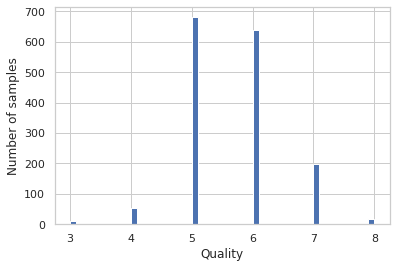

In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

#display the histograms of the target variable 'quality'

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
wine_data.shape


(1599, 12)

#### Exercise2: (RandomUnderSampler and RandomOverSampler)

In [ ]:
from _____.under_sampling import RandomUnderSampler 


In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')


In [ ]:

from collections import Counter #It allows you to count the items in an iterable list.
from imblearn.under_sampling import RandomUnderSampler 

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state =0)
X_rus, y_rus = undersample.fit_resample(X,y) # $\textbf fit_resample$
print('original dataset shape:', Counter(y))
print('Resample dataset shape',Counter(y_rus))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [ ]:
from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler() 
X_ros, y_ros = ros.fit_resample(X,y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

print(X_ros.shape[0]-X.shape[0],'New random points generated with RandomOverSampler')

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
2487 New random points generated with RandomOverSampler


#### Exercise3:(SMOTE)

---



In [ ]:
from imblearn.____________ import SMOTE 

Q1: SMOTE stands for  _______________

(Synthetic Minority Oversampling Technique)

Q2. **True/False**:SMOTE is available under imblean library and not sklearn

---



Q3. **True/False**:SMOTE is available only for oversampling but not undersampling

---



True, True

Q4. What are different types of SMOTE ?

Solution:

---


**Types of SMOTE** 
* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)

Q5.

---



In [ ]:
from imblearn.over_sampling import SMOTE 

oversample = SMOTE() 
X_sm, y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter, Counter(y)

(Counter({3: 681, 4: 681, 5: 681, 6: 681, 7: 681, 8: 681}),
 Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}))

In [ ]:
SMOTE?

Notes

---

[Quick Notes](https://https://github.com/ananddotiyer/IIT-M/blob/main/My%20Notes/MLP/Lecture%20Notes.pdf) ->Source:[@ananddotiyer ](https://https://github.com/ananddotiyer)

### 16. Notes

---



Data pre-processing Techniques

___
Data preprocessing involves several transformations that are applied to the raw data to make it more amenable for learning. It is carried out before using it for model training or prediction.

There are many pre-processing techniques for 
* Data Cleaning
  * Data Imputation
  * Feature scaling
* Feature transformation
  * Polynomial Features
  * Discretization
  * Handling categorical features
  * Custom Transformers
  * Composiste Transformers
    * Apply Transformation to diverse features
    * TargetTranformedRegressor
* Feature selection
    * Filter based feature selection
    * Wrapper based feature selection
* Feature Extraction
  * PCA

The transformation are applied in a specific order and the order can be specified via ```Pipeline```. We need to apply different transformations based on the feature type. `FeatureUnion` helps us perform that task and combine outputs from multiple transformations into a single transformed feature matrix. We will also study as how to visualize this pipeline.

Importing basic libraries

---

In this colab, we are importing as needed. However it is a good practice to have all imports in one cell -arranged in alphabetical order. This helps us weed out any duplicate imports and some such issues.


1.**Feature Extraction**

DictVectorizer
Many a times the data is present as a $\textbf {list of dictionary objects.}$ ML algorithms expect the data in **matrix form** with shape $(n,m)$ where $n$ is the number of samples and $m$ is the number of features.
`Vectorizer` **converts** a list of dictionary objects to feature matrix.

Let's create a sample data for demo purpose containing `age` and `height` of children.
  Each record/sample is a dictionary with two keys `age` and `height` , and corresponding values.
  


Data Imputation

---
  * Many machine learning algorithms need full feature matrix and they mayy not work in presence of missing data.
  * Data imputation identifies **missing values** in each featurer of the dataset and **replaces** them with an **appropriate values** based on a **fixed strategy** such as
    * **mean** or **median** or **mode** of that feature.
    * **use specified constant** value
Sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose.

Some of its important parameters:
  * *missing_values:* could be `int`,`str`,`np.nan` or `None`. Default is `np.nan`.
  * `strategy`: string, default is 'mean'. One the following strategies can be used:
    * `mean`- missing values are  replaced using the **mean** along each column.
    * `median`-missing values are replaced using the **median** along each column.
    * `most_frequent`-missing values are replaced using the **most_frequent** along each column
    * `constant` -missing values are replaced with value specified in `fill_value` argument.
    * `add_indicator` is a boolean parameter that when set to `True` returns **missing value indicators** in `indicator_` memeber value.

**Note** 
   * `mean` and `median` strategies can nonly be used with numeric data. 
   * `most_frequent` and `constant` strategies can be used with strings or numberic data.

Data imputation on real world dataset.

---
  Let's perform data imputation on real world dataset. We will be using <https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data> for this purpose. We will load this dataset from csv file.

The dataset has the following features:
    
    Age (in years)
    sex(1=male; 0=female)
    cp - chest pain type
    trestbps - resting blood pressure (anything above 130-140 is typically cause for concern) 
    fbs -fasting blood sugar (>120 mg/dl) (1=true; 0 = false)
    restecg - resting electrocardiographic results
        * normal=0
        * 1 = having ST-T wave abnormality;
        * 2 = showing probable or definite left ventricular hypertropy by Estes' criteria
    thalch - maximum heart rate achieved
    exang -excercise induced angina
        * 1 = yes
        * 0 = no
    oldpeak - depression induced by excercise relative to rest
    slope - slope of the peak excercise ST segment
        * 1 = unsloping;
        * 2 = flat value;
        * 3 = downsloping
    ca - number of major vessels (0-3) colored by fluroscopy 
    thal - (3 = normal; 6 =fixed defect; 7 = reversable defect)
    num - diagnosis of heart disease (angiographic disease status) (
      * 0 < 50% diameter narrowing;
      * 1: . 50% diameter narrowing

**STEP 1** Check if the data contains missing values.
* This can be checked via dataset description or by check number of `nan` or `np.null` in the dataframe. However such check can be performed only for numerical features.
* For non-numberical features, we can list their unique values and check if there are values like `?`.

**STEP 2** Replace '?' with `nan`.

**STEP 3**: Fill the missing values with `sklearn` missing value imputation utilities.
> Here we use `SimpleImputer` with `mean` strategy.

We will try two variations-
* add_indicator = `False`: Default choice that only imputes missing values.


`add_indicator = True:` Adds additional column for each column containing missing values. In our case, this adds two columns one for `ca` and other for `thal`. It indicates if the sample has a missing value.
now the number of extra column added will be 1 per missing columns that contains the boolean value i.e True/False to indicate that earlier some values were missing. It is just like a pointer for missing  value update.

**Feature Scaling**
Feature Scaling **transform feature values** such that **all the features are on the same scale**
When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:
* __Enables Faster Convergence__ in iterative optimization algorithms like gradien descent and its variants.
* The performance of ML algorithms such as SVM, K-NN and K-means etc that compute euclidean distance among input samples gets impacted if the features are not scaled.

`Tree` based Ml algorithms are not affected by feature-scaling. In other words, feature scaling is not required for `tree` based ML algorithms.
Feature scaling can be performed with the following methods:
* Standardization
* Normalization
* MaxAbsScaler

Let's demonstrate feature scaling on a real world dataset. For This purpose we will be using <https://archive.ics.uci.edu/ml/datasets/Abalone> We will use different scaling utilities in `sklearn` library.

[Abalone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data) has the following columns:
    
    Sex -nominal (M, F, and I (infant)) 
    Length (mm - Longest shell measurement) 
    Diameter (mm - perpendicular to lenght)
    Height (mm - with meat in shell) 
    Whole weight (grams -whole abalone)
    Shucked weight (grams - whole abalone)
    Viscera weight (grams - gut weight (after bleeding))
    Shell weight (grams - after being dried)
    Rings (target - age in years)
    

**STEP 1:** Examine the dataset
Feature scaling is performed only on numerical attributes. Let's check which are numerical attributes in this dataset. We can get that via `info()` method.

**STEP 1a [Optional]: Convert non-numerical attributes to numerical ones. 
> In this dataset, `sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation.


**STEP**: Separate labels from features.


**STEP 3:** Examine feature scales

 Statistical method
  check the scales of different feature with `describe` method of dataframe.
  

Note that
* There are 4177 examples or rows in this dataset.
* The mean and standard deviation of features are quite different from one another.

> We can confirm that with a variety of visualization techniques and plots.
Visualization of feature distributions.

  Visualize feature distributions.
  * HIstrogram
  * Kernel density estimation (KDE) plot
  * Box
  * Violin

Feature histogram:
  We will have separate and combined histogram plots to check if the feature are indeed on different scales.

  

KDE plot
Alternatively, we can generate **Kernel Density Estimate** plot using Gaussian Kernels.
> In statistics, kernel density function (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
This function uses Gaussian Kernels and includes automatic bandwidth determination.
>##@title [KDE plots - combined]
ax =abalone_data.plot.kde()

Observe that the features have different distributions and scales.
Box plot

---
A **box plot** (or box-and-whisker plot) shows the **distribution of quantitative** in a way that facilitates comparisions between variables or across levels of a categorical variables.

The box shows the **quartiles** of the dataset while the **whiskers** extend to show the rest of the distribution, except for points that are determined to be 'outliers' using a method that is a function of the inter-quartile range.

[Box Plot]

---
** sns.boxplot(data=abalone_data, orient='h')


**STEP 4:** Scaling


Normalization

The features are normalized such that their range lies between $[0,1] or [-1,1]$.There are two way to achieve this.

* `MaxAbsScaler` transform features in range $[-1,1]$ 
* `MinMaxScaler` transforms features in range $[0,1]$

MaxAbsScaler
It transforms the original features vector $ \textbf x$ into new feature vector $\textbf x^{'} $ so that all values fall within range [-1,1] \\
\begin{equation} \textbf x^{'} = \frac{\textbf x}{\text {MaxAbsoluteValue}}\end{equation}

where \begin{equation} \text {MaxAbsolutevalue}= \text {max}(\textbf x.max,|\textbf x.min|)\end{equation}


MinMaxScaler 

---
Normalization is a procedure in which the features' values are scaled such that they range between 0 and 1. This technique is also called **min-max scaling**. It is performed with the following formula:
\begin{equation} \mathbf X_{new} = \frac{X_{old} - X_{min} }{\mathbf X_{max} - X_{min}}\end{equation}

Where
* $X_{old}$ is the old value of a data point, which is rescaled to $ X_{new}$.
* $X_{min}$ is minimum value of feature $X$
* $X_{max}$, is maximum value of feature $X$.

Normalization can be achieved by `MinMaxScaler` from sklearn library.


Standardization 

---

Standardization is another feature scaling technique that results into (close to ) zero mean and unit standard deviation of a feature's values.
Formula for standardization:
\begin{equation} X_{new} = \frac{X_{old}-\mu}{\sigma}\end{equation}

Here $\mu$  and $\sigma$ respectively are the mean and standard deviation of the feature values.

Standardization can be achieved by StandardScaler from sklearn library.


4. `add_dummy_feature`
Augments dataset with a column vector, each value in the column vector is 1. this is useful for adding a parameter for bias term in the model.

**5.Custom transformers**

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

Useful when:
1. The dataset consists of *hetereogeneous data types* (e.g. raster images and text captions),
2. The dataset is stored in a `pandas.DataFrame` and different columns reuqire *different processing pipelines.*
3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [ ]:
from sklearn.preprocessing import FunctionTransformer 


You can implement a transformer from an arbitrary function with `FunctionTransformer`. 
* For example, let us build a tranformer that applies a log transformation to features.
For this demonstration, we will be using a  [wine quality dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) from uci machine learning repository.

It has got the following attributes:

    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide 
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
    12. quality (output: score between 0 and 10) 
    

**6 Polynomial Features** 

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form $[a,b]$, the degree-2 polynomial features are $[1,a,a^2,ab,b^2]$. 
`sklearn.preprocessing.PolynomialFeatures` enables us to perform polynomial transformation of desired degree. Let's demonstrate it with *wine quality* dataset.


7. Discretization**

**Discretization** (otherwise known as **quantization or binning**) provides a way to partition continuous features into discrete values.


* Certain datasets with conntinuous features may benefit from discretization, because discretization can transform the datasets of continuous attributes to one with only nomial attributes.
* One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.
* For instance, pre-processing with discretizer can introduce non-linearity to linear models.



**8. Handling Categorical Features** 


We need to convert the categorical features into numeric features.
1. Ordinal encoding
2. One hot encoding
3. Label encoding
4. Using dummy variables


**Ordinal Encoding** 

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate from before they feeding them for training an ML model.

Our intuitive way of handling them could be to assign them a numerical value. As an example, take state as a feature with 'Punjab', Rajasthan, and Haryana as the possible values. We might consider assigning number to these values as follows:


    Old feature | New feature
    ------------|-------------
    Punjab      |     1
    Rajasthan   |     2
    Haryana     |     3
    


However, this approach assigns some ordering to the labels, i.e. states, thus representing that Haryana is thrice Punjab and Rajasthan is twice Pubjab, these relationships do not exist in the data, thus providing wrong information to the ML model. 

One of the most-common approaches to handle this is: *One-hot encoding*


One-hot Encoding

---

This approach consists of creating an addtional feature for each label present in categorical feature(i.e. the number of different states here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is, 

      Old feature  |  $ New feature_1 (punjab) | New feature_2 (Rajasthan) | New feature_3(Haryana) 
     --------------|---------------------------|---------------------------|------------------------
     Punjab        |          1                |           0               |         0
     --------------|---------------------------|---------------------------|------------------------
     Rajasthan     |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------
     Haryana       |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------


It may be implemented using `OneHotEncoder` class from sklearn.preprocessing module. Let's demonstrate this concept with `Iris` dataset.


LabelEncoder

---
Another option is to use `LabelEncoder` for transforming categorical features into integer codes.

MultilabelBinarizer

---

Encodes categorical features with value 0 to $ k-1$ where $k$ is number of classes. As the name suggests for case where output are multilabels there we use each unique label as column and assign 0 or 1 depending upon in the dataset that value is present or not. Movie generes is best example to understand.



9. Composite Transformers

---
It applies a set of transformers to columns of an array or `pandas.DataFrame`, concatenates the transformed outputs from different transformers into a single matrix.
* It is useful for transforming heterogeneous data by applying different transformers to separate subsets of features.
* It combines different feature selection mechanism and transformation into a single transformer object.

**TransformedTargetRegressor**

> Transforms the target variable `y` before fitting a regression model.
* The predicted values are mapped back to the original space via an inverse transform.
* It takes **regressor** and **transformer** to be applied to the target variable as arguments.


**Feature selection** 

`sklearn.feature_selection` module has useful APIs to select features/reduce dimensionality, either to improve estimators' accuracy score or to boost their performance on very high-dimensional datasets.

Filter based methods

---

Variance Threshold 

---

This transformer helps to keep only high variance features by providing a certain threshold.
> Features with  variance greater or equal to threshold value are kept rest are removed.

> By default it removes any feature with same value i.e. 0 variance.


As you may observe from output of above cell, the transformer has removed the `age` feature because its variance is below the threshold.

SelectKBest 

---
It selects `k` highest scoring features based on a function and removes the rest of the features.

Let's take an example of California Housing Dataset.


Let's select 3 most important features, since it is a regression problem, we can use only `mutual_info_regression` of `f_regression` scoring functions only.

Select Percentile 

---
This is very similar to `SelectKBest` from previous section, the only difference is, it selects top `percentile` of all features and drops the rest of features.

Similar to `SelecKBest`, it also uses a scoring function to decide the importance of features.

Let's use the california housing price dataset for this API.

GenericUnivariateSelect

---


It applies  univariate feature selection with a certain strategy, which is passed to the API via `mode` parameter. The `mode` can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr`(false positive rate), `fdr` (false discovery rate), `fwe` (family wise error rate) 

If you want to accomplish the same objective as `SelectKBest`, we can use following code: 


RFE (Recursive Feature Elimination) 
* __STEP 1__: Fits a model and 
* __STEP 2__: Ranks the features, afterwards it removes one or more features(depending upn `step` parameter)

These two steps are repeated until desired number of features are selected.



RFE-CV

This adds another layer of cross validation to `RFE`. 

SelectFromModel 

---

>Selects desired number of important features(as specified with `max_features` parameter) above certain threshold of feature importance as obtained from the trained estimator.
* The feature importance is obtained via `coef_`, `feature_importance_` or an `importance_getter` callable from the trained estimator.
* The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as `mean`, `median` and `float` multiples of these like `0.1*mean`.


The following example uses california housing price dataset. Using `SelectFromModel` top three features are selected.



SequentialFeatureSelection 

---

It performs feature selection by selecting or deselecting features one by one in a greedy manner. 

**11. PCA**
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.
It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Let's generate some artificial data to better understand PCA.


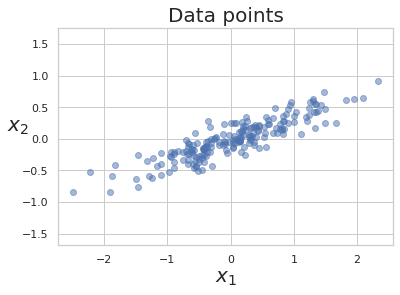

In [ ]:
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

Let us fit a `PCA` transformer on this data and compute its two principal components: 

In [ ]:
from sklearn.decomposition import PCA 
pca =PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principle axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where **each column returns them in the form of a matrix, where each column represents a principle component:** 


In [ ]:
print(f'The {pca.n_components_} principle axes are \n',pca.components_)

The 2 principle axes are 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Let's also look at the explained variance corresponding to each priciple axes.

In [ ]:
print('Explained variance by each component', pca.explained_variance_)

Explained variance by each component [0.7625315 0.0184779]


To better understand PCA, let's visualize these principle axex.
* There are two principle axes $ C_1 and C_2$. They are orthogonal to each other. An additional vector $C_3$ is also mentioned for comparision.
* The lenghts of $C_1$ and $C_2$ are taken as square root of respective explained variance. The length of the vector implies how important that vector is.

In [ ]:
# draw projections of data points on different vectors

projections = X@pca.components_ 
print(projections.shape)
c3= X[2]
arbitary_projection = X@c3 
print(arbitary_projection.shape)


(200, 2)
(200,)


Text(0.5, 0, '$z$')

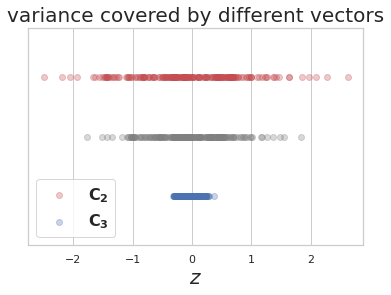

In [ ]:
#plt.figure(figsize=(8,6))
plt.scatter(projections[:,0], 1+np.zeros((200,1)),alpha=0.3, color='r')
plt.scatter(projections[:,1], -1+np.zeros((200,1)),alpha=0.3, color='b')
plt.scatter(arbitary_projection, np.zeros((200,)),alpha=0.3, color='grey')
plt.legend(['$\mathbf{C_2}$','$\mathbf{C_3}$'],prop={'size': 16})
plt.title("variance covered by different vectors",size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size =20)

Reducing Dimensions

---
We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture high(i.e. desired) amount of variance are kept.


Let's reduce the dimension of our data from 2 to 1. You can observe the transformed data has only 1 feature.


In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 
print('original shape:', X.shape)
print('transformed shape',X_pca.shape)

original shape: (200, 2)
transformed shape (200, 1)


To better understand what happened to our data, let's visualize our original data and the reduced data.
To do this, we will need to bring the transformed data into space or original data, which can be accomplished by `inverse_transform` method of `PCA` object.


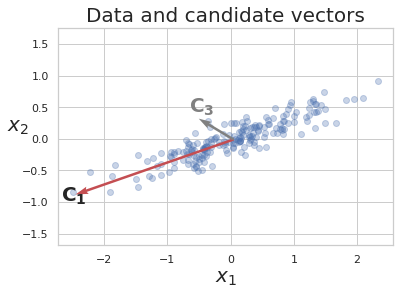

In [ ]:
#@ Visualize data in PC space
@title [Visualize principal components]

# set x and y labels

plt.figure()

plt.title('Data and candidate vectors', size = 20)

plt.xlabel('$x_1$', size=20)

plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 

                                    pca.components_, 

                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],

                                    ['r','b']):

    v = principal_axis * np.sqrt(length)

    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis

    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis

    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component

lengths = np.eye(2)

np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,

           *(1.1*(c3-pca.mean_)),

           scale=1,

           scale_units='xy',

           color='grey')

# label the  principal axis

plt.text(*(1.4*c3), 

         '$\mathbf{C_3}$', 

         size = 20,

         color='grey')

plt.axis('equal')

plt.show()

From above chart it is clear that the new/transformed data points are now projected on $\mathbf C_1$ vector. 


**Chaining Transformers**

The preprocessing transformations are applied one after another on the input feature matrix.
>It is important to apply exactly same transformation on training, evaluation and test set in the same order.
Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.
The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

Pipeline

---

Sequentially apply a list of transformers and estimators.
* Intermediate steps of the pipeline must be 'transformer' that is, they must implement `fit` and `transform` methods.
* The final estimator only needs to implement `fit`. 

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

Creating pipelines

A pipeline can be created with `Pipeline()`. It takes a list of ('estimatorsName',estimator(...)) tuples. The pipeline object exposes interface of the last step.

The same pipeline can also be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

Accessing parameters of a step in pipeline



---


Parameters of the estimators in the pipeline can be accessed using the __syntax, note there are two undercores 

In [ ]:
estimators = [
              ('simpleImputer',SimpleImputer()),
              ('pca', PCA()),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])


In above example `n_components` of `PCA()` step is set after the pipeline is created.

**GridSearch with pipeline**




---
By using naming convention of nested parameters, grid search can be implemented.


In [ ]:
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf=[SVC(),LogisticRegression()],
                  clf_C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid = param_grid)


* `c` is an inverse of regularization, lower its value stronger the regularization is.
* In the example above `clf_C` provides a set of values for grid search.



Caching Transformers



---



Transforming data is a computationally expensive step.
* For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.

This can be achived by setting `memory` parameter of `pipeline` object.



FeaturerUnion 

---
Concatenates results of multiple transformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.
`FeatuerUnion` and `Pipeline` can be used to create complex transformers.

**Visualizaing Pipelines**


14. Handling Imbalanced Data 


---




Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversampling

[Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

![Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)



We will demonstrate how to handle imbalance with the help of wine quality dataset that we have used earlier in this notebook.

We will reload this dataset once more before using it for the demonstration.


Undersampling


---



Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library 


**Oversampling**

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using RandomOverSampler class from imblearn library.



**Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for over sampling. It is available under **imblean** library.


**Types of SMOTE** 
* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)

##Week3:(Linear Regression)

---



###1. Common Setup:

---



####Exercise1:

---



Q. Follow the steps below to do '**Common Setup**' process
- setup a random seed of value 306
- setup ShuffleSplit with n_splits =10, test_size = 0.2 and random_state = 42
- load the data as features, labels from fetch_california_housing with parameters as_frame = True and return_X_y = True
- use train_test_split and a)divide features and labels into combined set(train+dev) and test set b)#dividing combined set(train+dev) into train and dev set



Solution:

---



Common Setup 

---
- Random Seed
- Define CV
- Load Data
- Split Data


1. Random Seed

---



In [ ]:
import numpy as np

np.random.seed(306) #The value in the numpy random seed saves the state of randomness.

2. CV

---



In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

In [ ]:
ShuffleSplit?

3. Load Data

---



In [ ]:
from sklearn.datasets import fetch_california_housing

features, labels = fetch_california_housing(as_frame = True, return_X_y = True)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

4. Split Data

---



In [ ]:
from sklearn.model_selection import train_test_split

#dividing features and labels into combined set(train+dev) and test set
com_train_feat, test_feat, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

#dividing combined set(train+dev) into train and dev set
train_feat, dev_feat, train_labels, dev_labels = train_test_split(com_train_feat, com_train_labels, random_state=42)



###Linear Regression:

---



####Exercise1:(No CrossValidation)

---



Use the following dataset and info and answer the preceeding questions:

---



In [ ]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#Common Setup: 1. Random Seed 2. Define CV 3. Load Data 4. Split Data
np.random.seed(306)

#cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42) 

features, labels = fetch_california_housing(as_frame = True, return_X_y = True)

com_train_feat, test_feat, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
train_feat, dev_feat, train_labels, dev_labels = train_test_split(com_train_feat, com_train_labels, random_state=42)

- Q1. Create a `Pipeline` object '`pipe`' with `StandardScaler `and `LinearRegression`
- Q2. Apply `pipe.fit` on `com_train_feat, com_train_labels`
- Q3. Compute `pipe.score`/r2score on `test_feat` and `test_labels`
- Q4. Compute coefficient and intercept using `coef_`, `intercept_ `for the model
- Q5. Predict the values using `pipe.predict` on `test_feat`
- Q6. Import `mean_squared_error` from `sklearn.metrics` and compute the mean squared error for `test_labels`

Solution:

---



In [ ]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('lin_reg',LinearRegression())
                 ])

In [ ]:
pipe.fit(com_train_feat, com_train_labels)

Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())])

In [ ]:
pipe.score(test_feat,test_labels)

0.5910509795491352

In [ ]:
pipe[-1].coef_

array([ 0.85210815,  0.12065533, -0.30210555,  0.34860575, -0.00164465,
       -0.04116356, -0.89314697, -0.86784046])

In [ ]:
pipe[-1].intercept_

2.0703489205426377

In [ ]:
pipe.predict(test_feat)

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_labels, pipe.predict(test_feat))
mse

0.5411287478470688

####Exercise2:(with cross validation)

---



Use the following dataset and info and answer the preceeding questions:

---



In [ ]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#Common Setup: 1. Random Seed 2. Define CV 3. Load Data 4. Split Data
np.random.seed(306)

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42) 

features, labels = fetch_california_housing(as_frame = True, return_X_y = True)

com_train_feat, test_feat, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
train_feat, dev_feat, train_labels, dev_labels = train_test_split(com_train_feat, com_train_labels, random_state=42)

- Q1. Create a `Pipeline` object '`pipe`' with `StandardScaler `and `LinearRegression` 
- Q2. Import `cross_validate` and use:
> `pipe, com_train_feat, com_train_labels, cv = cv, scoring='neg_mean_absolute_error', return_train_score = True, return_estimator = True`
 as the parameters
-Q3. 

Solution:

---



Linear Regression

---
1. Common Setup
2. Use Pipeline
3. Use cross_validate

---




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

pipe = Pipeline([('scaling',StandardScaler()),
                 ('lin_reg',LinearRegression())
                 ])
res = cross_validate(pipe, com_train_feat, com_train_labels, cv = cv , scoring='neg_mean_absolute_error', return_train_score = True, return_estimator = True)
print(res)
print('train scores for 10 runs:')
print(res['train_score'])
print('test scores for 10 runs:')
print(res['test_score'])
print()
print(res['estimator'])
print()
print('Model for train_score: -0.53432327 and test_score: -0.51461906')
print(res['estimator'][0][1].coef_) 
print(res['estimator'][0][1].intercept_)

test_error = (-1) * res['test_score']
test_error_mean = np.round(test_error.mean(),4)
test_error_std = np.round(test_error.std(),4)

train_error = (-1) * res['train_score']
train_error_mean = np.round(train_error.mean(),4)
train_error_std = np.round(train_error.std(),4)


print('mean_absolute_error for test set\n:', test_error_mean,'+/-', test_error_std )
print('mean_absolute_error for train set\n:', train_error_mean,'+/-', train_error_std )


{'fit_time': array([0.0101223 , 0.03117085, 0.02533269, 0.02581835, 0.02629972,
       0.0325501 , 0.02831125, 0.03132653, 0.03688979, 0.03576541]), 'score_time': array([0.00730133, 0.00618267, 0.00721645, 0.00678515, 0.00666857,
       0.00315595, 0.00895548, 0.01308894, 0.01447797, 0.00792098]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())]), Pipeline(steps=[('scaling', Sta

In [ ]:
pipe.fit( com_train_feat, com_train_labels)
pipe[-1].coef_

array([ 0.85210815,  0.12065533, -0.30210555,  0.34860575, -0.00164465,
       -0.04116356, -0.89314697, -0.86784046])

In [ ]:
print(res['estimator'][0])

Pipeline(steps=[('scaling', StandardScaler()), ('lin_reg', LinearRegression())])


In [ ]:
print(res['estimator'][0][1])

LinearRegression()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(test_labels, pred_labels )

0.32120472175482906

##Week4:

---



###1. Work in Progress:

---



####Exercise1:

---



##Week5: (Classification)

---



###1. type_of_target:

---



####Exercise1: 

---



Import type_of_target from sklearn.utils.multiclass and answer the preceeding questions

---



1) For the label vector/matrix -> `[0,1]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

2) For the label vector/matrix -> `[0,1,2,3]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

3) For the label vector/matrix -> `[-1,1]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

4) For the label vector/matrix -> `[[0,1],[1,0]]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

5) For the label vector/matrix -> `[0.7,1.2,9]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

6) For the label vector/matrix -> `[[0,1,2],[0,1,2]]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

7) For the label vector/matrix -> `[[0,1],[0,2]]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

8) For the label vector/matrix -> `[[-1.5,1],[1,-1.5]]`, guess the type of label output from the options:
> a) binary

> b) multiclass

> c) continous

> d) multilabel-indicator

> e) multiclass-multioutput

> f) continuous-multioutput

###2. isinstance( ):

---



####Exercise1:

---



1) Given `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- What is the data type of X
- Using isinstance method verify datatype of X with np.ndarray
- Write a program converting X using to_numpy, if not of type np.ndarray

> **Note:**`DataFrame.to_numpy(dtype=None, copy=False, na_value=NoDefault.no_default)` is a pandas method that converts a dataframe to numpy array

Solution:

---



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
isinstance(X, np.ndarray)

False

In [ ]:
if not isinstance(X, np.ndarray):
  X = X.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Reasoning:
p = np.array([1,2,3])
print(isinstance(p, np.ndarray))


True


####Exercise2:

---



1) Given `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- What is the data type of y
- Using isinstance method verify datatype of y with np.ndarray
- Write a program converting y using to_numpy, if not of type np.ndarray

> **Note:**`DataFrame.to_numpy(dtype=None, copy=False, na_value=NoDefault.no_default)` is a pandas method that converts a dataframe to numpy array

Solution:

---



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
isinstance(y, np.ndarray)

False

In [ ]:
if not isinstance(X, np.ndarray):
  y = y.to_numpy()
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_new = MinMaxScaler().fit_transform(X)


In [ ]:
np.min(X_new), np.max(X_new)

(0.0, 1.0)

label 5


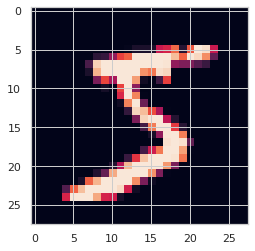

In [ ]:
print('label', y[0])
plt.imshow(X_new[0].reshape(28,28));

###3. Print Image from Data:

---



####Exercise1: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- print the shape of X and X[0](first example)
- reshape the first example to 28 X 28 matrix
- find the minimum and maximum value of the first example
- print the label value and image of this first example using matplotlib.pyplot

---



Solution:

---



In [ ]:
X.shape

(70000, 784)

In [ ]:
X[0].shape

(784,)

In [ ]:
X[0].reshape(28,28).shape

(28, 28)

In [ ]:
min(X[0]), max(X[0])

(0.0, 255.0)

label 5


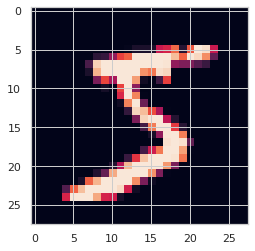

In [ ]:
print('label', y[0])
plt.imshow(X[0].reshape(28,28));

####Exercise2: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- print the shape of X and X[99](100th example)
- reshape the first example to 28 X 28 matrix
- find the minimum and maximum value of the 100th example
- print the label value and image of this 100th example using matplotlib.pyplot

---



Solution:

---



In [ ]:
X.shape

(70000, 784)

In [ ]:
X[99].shape

(784,)

In [ ]:
X[99].reshape(28,28).shape

(28, 28)

label 1


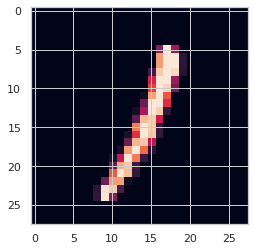

In [ ]:
print('label', y[99])
plt.imshow(X[99].reshape(28,28))

####Exercise3: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- print the shape of X and X[0](first example)
- reshape the first 3 examples to 28 X 28 matrix
- print the label value and image of these 3 examples using matplotlib.pyplot

---



Solution:

---



5


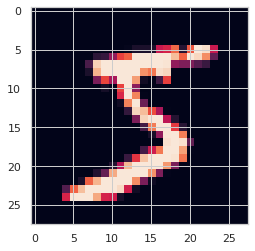

0


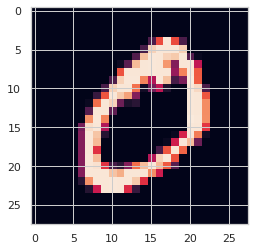

4


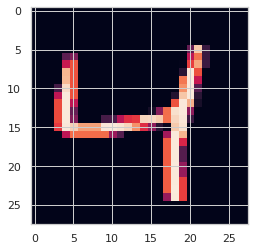

In [ ]:
for i in range(3):
  X_i = X[i].reshape(28,28)
  print(y[i])
  plt.imshow(X_i)
  plt.show()

Solution:

---



###4. Binary Classification (Perceptron)

---



####Exercise1: [Common Setup]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Load the dataset
2. Convert the feature matrix and label vector/matrix to np.ndarray (if feature matrix and label vector/matrix is not of np.ndarray type)
3. Scale the feature matrix using MinMaxScaler
4. Print image of y[0] first example
5. Split the total number of samples into train and test set in the following ratio: 60000/10000 (that is, 60000 samples in the training set and 10,000 samples in the testing set).
6. Check for class imbalance in the label

---



Solution:

---



In [ ]:
#1 loading data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
#2 converting to np.ndarray
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
if not isinstance(X, np.ndarray):
  X = X.to_numpy()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
if not isinstance(y, np.ndarray):
  y = y.to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
#3 Scaling feature matrix
X = MinMaxScaler().fit_transform(X)
np.min(X), np.max(X)

(0.0, 1.0)

5


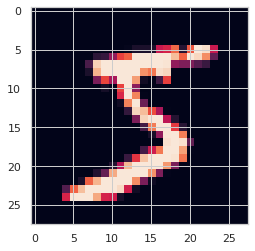

In [ ]:
#4 Print image of first label
print(y[0])
plt.imshow(X[0].reshape(28,28))

In [ ]:
#5 split the dataset into training and test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

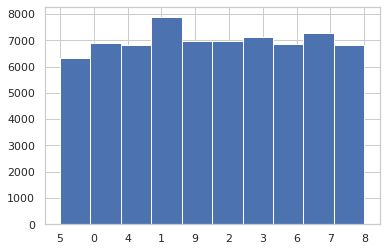

In [ ]:
#6 checking for imbalance
plt.hist(y);

####Exercise2: [Modify Labels]

---


Continuing from previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- **Note**: The original label vector contains 10 classes, we need to modify the number of classes to 2. The label 0 will be changed to 1 and all other labels(1-9) will be changed to -1.
1. Name the label vectors as y_train_0 and y_test_0.
2. Do a sanity check by print labels and respective images for first 10 examples

---



Solution:

---



In [ ]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

####Exercise3: [Baseline Model]

---


Continuing from previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Construct a baseline model with the following rule(you are free to choose different rule)

> Count number of samples per class.

> The model always outputs the class which has highest number of samples.

> Then calculate the accuracy of the baseline model.

2. Do you think accuracy alone is a good measure?

---



Solution:

---



In [ ]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print(num_pos,num_neg)


5923 54077


In [ ]:
base_clf = DummyClassifier(strategy='most_frequent') # there are other strategies

In [ ]:
base_clf.fit(X_train,y_train_0)
print("Training accuracy:{0:.2f}".format(base_clf.score(X_train, y_train_0)))
print("Testing accuracy:{0:.2f}".format(base_clf.score(X_test,y_test_0)))

Training accuracy:0.90
Testing accuracy:0.90


* Now the reason is obvious. The model would have predicted 54077 sample correctly just by outputing -1 for all the input samples. Therefore the accuracy will be $ \frac{54077}{60000}=90.12 \% $

This is the reason why "accuracy" alone is not always a good measure!.


####Exercise4: [Perceptron Model without CV]

---


Continuing from the previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Create an instantiation of binary classifier (bin_clf) and call `fit` method to train the model.
2. Print the dimensions of the weight vector, bias value and type of loss function used (hint: loss_function_)
3. **Make predictions** on the train set and then calculate the training accuracy.
4. **Make predictions** on the test set and then calculate the test accuracy.
5. Take few images from the testset at random and **display** it with the corresponding **predictions**.
6. Plot a few images in a single figure window along with their respective Predictions. (OPTIONAL)
7. Check how many 0's have been correctly predicted and print the accuracy
8. Check how many non-0's have been correctly predicted and print the accuracy
9. Using ConfusionMatrixDisplay.from_predictions() display the confusion matrix
10. Print the values of precision, recall and accuracy
---



Solution:

---



**Perceptron model **

---

1. **Training data**(features label or $(\mathbf X,y)$ where $y$ is a **discrete** number from a finite set **Features** in this case are **pixel**  values of an image.
2. **Model**: 
\begin{eqnarray} h_w:y&=&\text g(\mathbf w^T 
\mathbf x) \\ 
&=&\text g(w_0+w_1x_1+\ldots + w_mx_m)\end{eqnarray} where,
 * $\mathbf w$ is weight vector in $\mathbb{R}^{(m+1)}$ i.e. it has components: $\{w_0,w_1,\ldots,w_m\}$
 * g$(z)$ is a non-linear activation function given by a signum function:

$$\text g(z)=\begin{cases} +1 ,\text {if} \ z \ge 0 \\
-1, \text {otherwise}(i.e. z \lt 0)\end{cases}$$

3. **Loss function**: Let $ {\hat y}^{(i)} \in \{-1,+1\}$ be the prediction from perceptron and ${\hat y}^{(i)}$ be the actual label for $i-\text{th}$ example. 
$ \\ $

The error is 

$$\text e^{(i)}=\begin{cases} 0 , \ \ \text {if} \ \ {\hat y}^{(i)} = y^{(i)} \\
-\mathbf {w^Tx^{(i)}}y^{(i)}, \text {otherwise}(i.e. {\hat y}^{(i)} \ne y^{(i)})\end{cases}$$

THis can be compactly written as:
\begin{equation} e^{(i)}=\max(-\mathbf{w^Tx^{(i)}}y^{(i)},0)=\max(-h_{\text w }(\mathbf x^{(i)})y^{(i)},0)\end{equation} 

4.**Optimization**:
 * Perceptron learning algorithm
 1. Initialize $\mathbf {\text w}^{(0)}=0$
 2. For each training example $(x^{(i)},y^{(i)})$
  * ${\hat y}^{(i)}=\text{sign}(\mathbf {w^Tx}^{(i)})[\text {calculate the output value}]$
  * $\mathbf w^{(t+1)} := \mathbf w^{(t)}+ \alpha (y^{(i)}-{\hat y}^{(i)})\mathbf x^{(i)}[\text{Update the weights}] $

   Linearly separable examples lead to convergence of the algorithm with zero training loss, else it oscillates.

---



**Prameters of Perceptron Class**

---
* Let's quickly take a look into the important parameters of the Perceptron()
`class sklearn.linear_model.Perceptron(*,penalty=None, alpha = 0.0001, l1_ration=0.15, fit_intercept = True, max_iter=1000,tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,class_weight=None, warm_start=False).`
* Need not to pay attention to all the arguments and their default values.
* Internally, the API uses the preceptron loss (i.e. it calls **Hinge(0,0)**, where 0.0 is a threshold) and uses SGD to update the weights.
* You may refer to the documentation for more details on the `Perceptron` class.
* The other way of deploying perceptron is to use the general `linear_model.SGDClassifier` with `loss='perceptron'`

* The above loss is termed as hard Hinge-loss (as scores pass through the sign function) and hence we can't use SGD.
* Whereas, SKlearn implements hinge-Loss with the following definition: $\max(0,-wx^iy^i$) and by default calls sgd to minimize the loss.





In [ ]:
bin_clf = Perceptron(max_iter=100, random_state=1729)
bin_clf.fit(X_train, y_train_0)
print(f'Dimension of weights: {bin_clf.coef_.shape}')
print(f'Bias: {bin_clf.intercept_}')
print(f'Loss function: {bin_clf.loss_function_}, loss value: {bin_clf.loss}')

Dimension of weights: (1, 784)
Bias: [-108.]
Loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x7f123707dcf0>, loss value: perceptron


In [ ]:
y_hat_train_0 = bin_clf.predict(X_train)
print("Training Accuracy:", bin_clf.score(X_train,y_train_0))

Training Accuracy: 0.99095


In [ ]:
print('Test accuracy:',bin_clf.score(X_test,y_test_0))


Test accuracy: 0.989


Label: 1.0


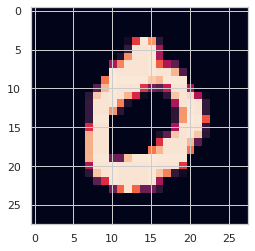

In [ ]:
print(f'Label: {y_test_0[3]}')
plt.imshow(X_test[3].reshape(28, 28))

Label: -1.0


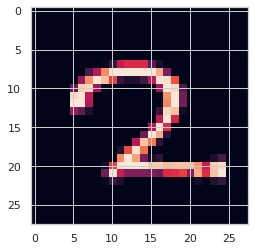

In [ ]:
print(f'Label: {y_test_0[77]}')
plt.imshow(X_test[77].reshape(28, 28))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


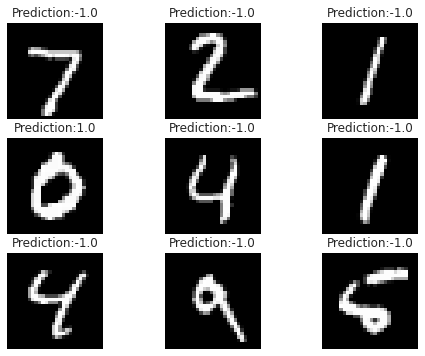

In [ ]:
y_hat_test_0 = bin_clf.predict(X_test)
num_images = 9 # choose a square number 
factor = np.int(np.sqrt(num_images)) 
fig,ax = plt.subplots(nrows=factor, ncols = factor, figsize=(8,6))
idx_offset  = 0 # display "num_images" starting from idx_offset
for i in range(factor):
  index = idx_offset + i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X_test[index+j].reshape(28,28),cmap='gray')# we should not use x_train_with_
    ax[i,j].set_title("Prediction:{0}".format(str(y_hat_test_0[index+j])))
    ax[i,j].set_axis_off()

Let's see how many 0's have been correctly predicted.



---



In [ ]:
idx_0 = np.where(y_test_0 == 1)[0] #all images from test set that are actually 0's

In [ ]:
zero_imgs = X_test[idx_0] # all images for the actual 0's.
zero_pred_labels = y_hat_test_0[idx_0] # predictions of all actual 0's

In [ ]:
num_misclassified = np.count_nonzero(zero_pred_labels == -1)
num_correctpred = len(zero_pred_labels) - num_misclassified
accuracy = num_correctpred / len(zero_pred_labels)
print(accuracy)

Let's see how many non-0's have been correctly predicted.



---



In [ ]:
idx_not_0 = np.where(y_test_0 == -1)[0] #all images from test set that are actually non-0's
idx_not_0


In [ ]:
non_zero_imgs = X_test[idx_not_0] # all images for the actual non-0's.
non_zero_pred_labels = y_hat_test_0[idx_not_0] # predictions of all actual non_0's
non_zero_pred_labels

In [ ]:
num_misclassified = np.count_nonzero(non_zero_pred_labels == 1)
num_correctpred = len(non_zero_pred_labels) - num_misclassified
accuracy = num_correctpred / len(non_zero_pred_labels)
print(accuracy)

* This above score (guess the name of the metric) is less than the accuracy score of the model but it seems preety descent!. 
* Will it be the same if we consider another digit, say, 5 for positive class and all other class as negative?..Of course not. You may cross check it.


---


Better Evaluation metrics
* We now know that using the accuracy **alone** to measure the performance of the model is not suitable(especially for imbalanced datasets), so which are the more suitable metrics then?


---


Confusion Matrix is the word!



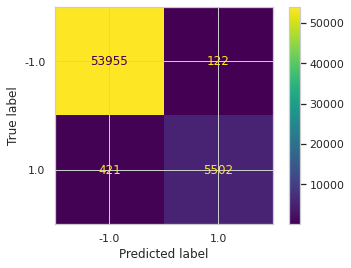

In [ ]:
y_hat_train_0 = bin_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0, values_format='.5g',display_labels=bin_clf.classes_)
plt.show()

* Pay attention to the number of FPs and FNs. Suppose for some reasons, we want the classifer to avoid FPs to a good extent irrespective of FNs, how can we achive it?
* To answer it, let's compute the other metrics which take FPs and FNs into account.

---


Precision and Recall

---



* We can use the function `classification_report` to compute these parameters. However, for the time being let's compute these parameters using the data from the confusion matrix manually 

In [ ]:
cf_matrix = cm_display.confusion_matrix 
tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

In [ ]:
precision = tp/(tp+fp) 
print("Precision:",precision)
recall = tp/(tp+fn)
print('Recall:',recall)
accuracy = (tn+tp)/(tn+tp+fn+fp)
print('accuracy:',accuracy)


Precision: 0.9783072546230441
Recall: 0.9289211548201924
accuracy: 0.99095


* The precision is close to 0.98. Despite it, we still want to increase the precision. Let's come back to this later.
* In general, we would like to know whether the model under consideration with the set hyper-parameters is a good one for a given problem.

**Cross validation**


* Well to address this, we have to use cross-validation folds and measure the same metrics across these folds for different values of hyper-parameters.
* However, perceptron does not many hyperparameters other than the learning rate.
* For the moment, we set the learning rate to its default value. Later, we use `GridSearchCV` to find the better value for the learning rate.



####Exercise5: [Perceptron Model with CV]

---


Continuing from the previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Instantiate Perceptron with `max_iter = 100`, `random_state = 1729`
2. Use cross_validate with `cv =5 `
3. Compute the average and standard deviation of scores for all three metrics on (`k=5`) folds to measure the generalization!.
4. Pick the first estimator returned by the cross-validate function.
5. Use ConfusionMatrixDisplay.from_predictions() to print the confusion matrix
6. use precision_scaore and recall_score to print the respective precision and recall scores

---



In [ ]:
# bin_cfg = Perceptron(max_iter=100, random_state=1729)
# scores = cross_validate(bin_clf, X_train, y_train_0, cv=5, scoring=['recall', 'f1', 'precision'], return_estimator=True)
# # scores = cross_validate(bin_clf, X_test, y_test_0, cv=5, scoring=['recall', 'f1', 'precision'], return_estimator=True)
# pprint(scores)

# print('f1,             avg:{0:.2f},  std:{1:.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
# print('precision,      avg:{0:.2f},  std:{1:.2f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
# print('recall,         avg:{0:.2f},  std:{1:.2f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

# bin_clf = scores['estimator'][0]
# y_hat_test_0 = bin_clf.predict(x_test)
# cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0, values_format='.5g')
# print('Precision:{0:.2f}'.format(precision_score(y_test_0,y_hat_test_0)))
# print('recall:{0:.2f}'.format(recall_score(y_test_0,y_hat_test_0)))


In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
if not isinstance(X, np.ndarray):
    X = X.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
if not isinstance(y, np.ndarray):
    y = y.to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
target_names = np.unique(y)
print(f'Number of samples: {X.shape[0]}, type: {X.dtype}')
print(f'Number of features: {X.shape[1]}')
print(f'Minimum: {np.min(X)}, Maximum: {np.max(X)}')
print(f'Number of classes: {len(target_names)}, type: {y.dtype}')
print(f'Labels: {target_names}')

Number of samples: 70000, type: float64
Number of features: 784
Minimum: 0.0, Maximum: 255.0
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
X = MinMaxScaler().fit_transform(X)
print(f'Minimum: {np.min(X)}, Maximum: {np.max(X)}')

Minimum: 0.0, Maximum: 1.0


Label: 5


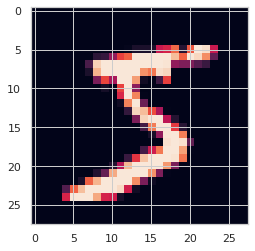

In [ ]:
print(f'Label: {y[0]}')
plt.imshow(X[0].reshape(28, 28))

Label: 0


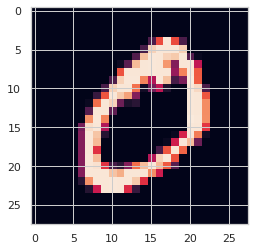

In [ ]:
print(f'Label: {y[1]}')
plt.imshow(X[1].reshape(28, 28))

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [ ]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

Label: -1.0


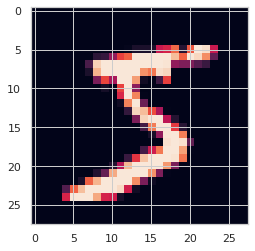

In [ ]:
print(f'Label: {y_train_0[0]}')
plt.imshow(X_train[0].reshape(28, 28))

Label: 1.0


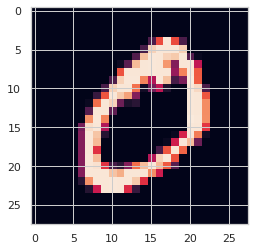

In [ ]:
print(f'Label: {y_train_0[1]}')
plt.imshow(X_train[1].reshape(28, 28))

In [ ]:
bin_cfg = Perceptron(max_iter=100, random_state=1729)
scores = cross_validate(bin_clf, X_train, y_train_0, cv=5, scoring=['recall', 'f1', 'precision'], return_estimator=True)
# scores = cross_validate(bin_clf, X_test, y_test_0, cv=5, scoring=['recall', 'f1', 'precision'], return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([1.19246936, 1.78187037, 1.25511742, 1.13674974, 1.45565414]),
 'score_time': array([0.04313636, 0.05141497, 0.05448437, 0.04369736, 0.04667163]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [ ]:
print('f1,             avg:{0:.2f},  std:{1:.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
print('precision,      avg:{0:.2f},  std:{1:.2f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
print('recall,         avg:{0:.2f},  std:{1:.2f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

f1,             avg:0.94,  std:0.013
precision,      avg:0.96,  std:0.01
recall,         avg:0.92,  std:0.03


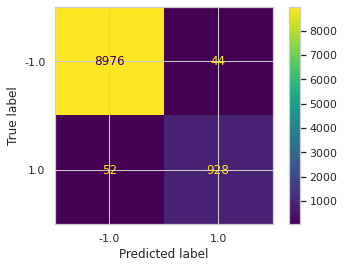

In [ ]:
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0, values_format='.5g')

In [ ]:
print('Precision:{0:.2f}'.format(precision_score(y_test_0,y_hat_test_0)))
print('recall:{0:.2f}'.format(recall_score(y_test_0,y_hat_test_0)))


Precision:0.95
recall:0.95


####Exercise6: [Precision - Recall Curve]

---
Use the Following Information:

---


* Often time we need to make a trade off between precision and recall scores of a model, depending on the problem at hand.
* It is important to note that we should **not** pass the **predicted labels** as input to `precision_recall_curve` function, instead we need to pass the probability scores or the output from the decision function!.
* The `Perceptron()` class contains a `decision_function` method, therefore we can make use of it.
* Then, internally the decision scores are sorted, **tps** and **fps** will be computed by changing the threshold from index[0] to index [-1].

---



1. Compute the scores from decision function and save it to y_scores.
2. Plot a histogram of y_scores
3. Using precision_recall_curve() plot the precision recall curve

---



Solution:

---



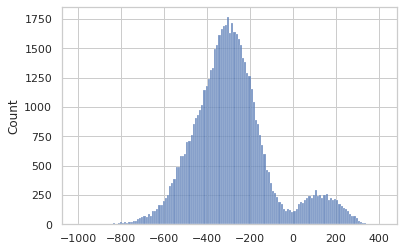

In [ ]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train,y_train_0)
y_scores = bin_clf.decision_function(X_train)

sns.histplot(np.sort(y_scores))
plt.show()

Can you think why there are so many negative values than the positives ?
**Hint** Class-Imbalance
* Suppose threshold takes the value of -600, then all the samples having score greater than -600 is set to 1(Positive label) and less than it is set to -1(neg label) 
* Therefore, the number of False Positives will be increased. This will in turn reduce the precision score to a greater extent.
* On the otherhand, if the threshold takes the value of say 400, Then, the number of False negatives will be increase and hence the recall will reduce to a greater extent.

* Let's see it in action.

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores,pos_label=1)

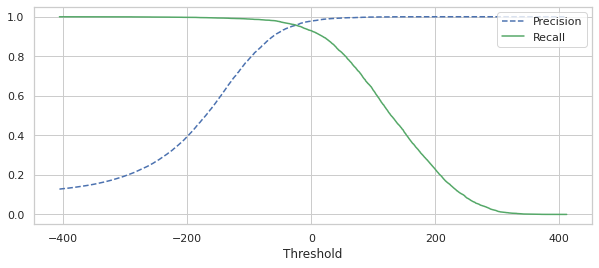

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

####Exercise7: [ROC Curve]

---


Continuing from previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- Plot a ROC curve using appropriate sklearn API

---



Solution:

---



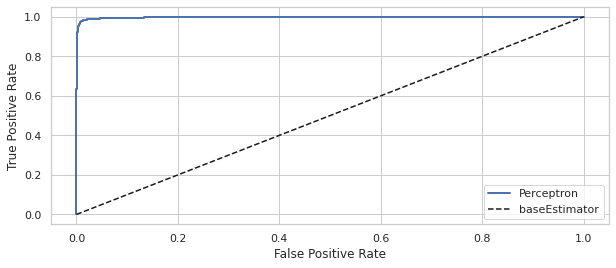

In [ ]:
fpr, tpr, thresholds =roc_curve(y_train_0, y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth =2, label='Perceptron')
plt.plot([0,1],[0,1],'k--', label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show() 


In [ ]:
X.shape

(70000, 784)

####Exercise8: [cold_start Vs. warm_start]

---


Use the following Code (continuing from previous steps)
> Q1. Run the above code 5 times and observe the accuracy scores, what do you observe?

> Q2. Use `warm_start=True` as perceptron parameter and run the code 5 times, what do you observe?

---



In [ ]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train, y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)
print(f'Training accuracy: {bin_clf.score(X_train, y_train_0)}')
print(f'Test accuracy: {bin_clf.score(X_test, y_test_0)}')

Solution:

---



Warm start vs Cold Start 

---


$ \\ \\ $ 
Cold Start 

---



* If we execute the `fit` method of `bin_clf` repeatedly, we get the same score for both training and testing accuracy.
* This because everytime the `fit` method is called, the model weights are initialized to the same values. Therefore, we obtain the same score.
* This is termed as **cold start** Let's execute the following cell 4 times tand observe the score.

In [ ]:
bin_clf.fit(X_train,y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)
print("Training Accuracy:", bin_clf.score(X_train, y_train_0))
print("Test accuracy", bin_clf.score(X_test, y_test_0))

Training Accuracy: 0.99095
Test accuracy 0.989


Warm Start

---



* As you might have guessed, there is an approach called `warm Start`.
* Setting `warm_start=True` retains the weight values of the model after `max_iter` and hence produce different results for each execution.
* Warm starting is useful in many ways. It helps us train the model by initializing the weight values from the previous state. So, we can pause the training and resume it whenever we get the resource for computation.
* Of course, it is not required for simple models like perceptron and for a small dataset like **MNIST**.
* In this notebook, we use this feature to plot the iteratation vs loss curve.
* Let us execute the following lines of code 4 times and observe how the training accuracy changes for each execution.

In [ ]:
bin_clf_warm = Perceptron(max_iter=100,random_state=1729,warm_start=True)

In [ ]:
bin_clf_warm.fit(X_train,y_train_0)
print("Training Accuracy:", bin_clf_warm.score(X_train,y_train_0))

Training Accuracy: 0.9837833333333333


###5. Multi-class Classification (Perceptron)

---



####Exercise1: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Convert `X` and `y` into `np.ndarray` (if found to be of different datatype)
2. Split the data into 60000/10000 training and test data
3. Use LabelBinarizer() to fit and transform y_train and save it to y_train_over
4. Use the code and note your observations
```
for i in range(10):
    print(y_train[i], '==>', y_train_ovr[i])
```

5. Print the shape of `y_train_ovr`
6. Instantiate a perceptron object '`clf`' with `random_state = 1729` and fit the training data
7. Print the shape of coef_ and intercept_ of the clf
8. Print the scores and predicted class using decision_function()
9. Get predictions of all examples in X_train
10. Print a classification report and display confusion matrix


---



Solution:

---



Multiclass Classifier (OneVsAll)

---


We know that the perceptron is a binary classifier. However,MNIST dataset contains 10 classes. Then how can we extend the idea to handle multi-class problem?

---



Solution: Combine multiple binary classifiers and devise a suitable scoring metric.

---



Sklearn makes it extremely easy without modifying a single line of code that we have written for the binary classifier.

---



Sklearn does this by counting a number of unique elements (10 in this case) in the label vector y_train and converting labels using Labelbinarizer to fit each binary classifier.

---



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [ ]:

if not isinstance(X, np.ndarray):
    X = X.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
if not isinstance(y, np.ndarray):
    y = y.to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
target_names = np.unique(y)
print(f'Number of samples: {X.shape[0]}, type: {X.dtype}')
print(f'Number of features: {X.shape[1]}')
print(f'Minimum: {np.min(X)}, Maximum: {np.max(X)}')
print(f'Number of classes: {len(target_names)}, type: {y.dtype}')
print(f'Labels: {target_names}')

Number of samples: 70000, type: float64
Number of features: 784
Minimum: 0.0, Maximum: 255.0
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
#This step is internal to the algorithm, and shown here only for clarity
from sklearn.preprocessing import LabelBinarizer
y_train_ovr = LabelBinarizer().fit_transform(y_train)
# see the equivalent conversions for the first 10 y_train values
for i in range(10):
    print(y_train[i], '==>', y_train_ovr[i])

5 ==> [0 0 0 0 0 1 0 0 0 0]
0 ==> [1 0 0 0 0 0 0 0 0 0]
4 ==> [0 0 0 0 1 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
9 ==> [0 0 0 0 0 0 0 0 0 1]
2 ==> [0 0 1 0 0 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
3 ==> [0 0 0 1 0 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
4 ==> [0 0 0 0 1 0 0 0 0 0]


In [ ]:
y_train_ovr.shape

(60000, 10)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [ ]:
clf = Perceptron(random_state=1729)
clf.fit(X_train, y_train)

Perceptron(random_state=1729)

In [ ]:
print(f"Shape of weight matrix is {clf.coef_.shape} and shape of bias vector is {clf.intercept_.shape}")


Shape of weight matrix is (10, 784) and shape of bias vector is (10,)


In [ ]:
scores = clf.decision_function(X_train[0].reshape(1, -1))
print(scores)
print(f"Predicted class is {np.argmax(scores)}")

[[-12002266. -17622609. -13573128.    857820. -20312887.   3197840.
  -18155723.  -9888472. -13008226. -12868963.]]
Predicted class is 5


In [ ]:
y_hat_train = clf.predict(X_train) #Get predictions for all examples in X_train


In [ ]:
print(classification_report(y_train, y_hat_train))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5923
           1       0.92      0.98      0.95      6742
           2       0.92      0.88      0.90      5958
           3       0.85      0.91      0.88      6131
           4       0.85      0.93      0.89      5842
           5       0.89      0.81      0.84      5421
           6       0.96      0.94      0.95      5918
           7       0.96      0.88      0.92      6265
           8       0.81      0.82      0.81      5851
           9       0.87      0.85      0.86      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



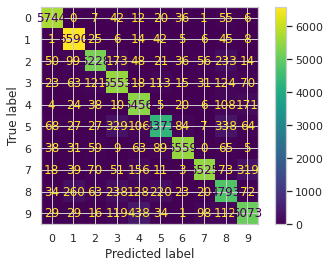

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat_train, values_format='.5g')




---


**There seems to confusion between 1/5, 1/8, 7/4 etc.**

---



In [ ]:
X.shape

(70000, 784)

####Exercise2: [Pipeline] 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Create a pipeline with 2 steps one to do scaling of MinMaxScaler and other use Perceptron with random_state =1739 as object with name 'pipe'
2. Fit the Pipeline object with the training data 
3. Predict the values for the training set
4. Display a confusion matrix

---



Solution:

---



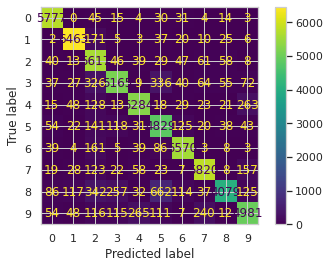

In [ ]:
pipe = Pipeline([('std_scaler', MinMaxScaler()),
                ('clf', Perceptron(random_state=1729))])
pipe.fit(X_train, y_train)

y_hat_train = pipe.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat_train, values_format='.5g')

###6. GridSearchCV (Perceptron)

---



####Exercise1: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- print the shape of X and X[0](first example)
- reshape the first example to 28 X 28 matrix
- find the minimum and maximum value of the first example
- print the label value and image of this first example using matplotlib.pyplot

---



Solution:

---



In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:

if not isinstance(X, np.ndarray):
    X = X.to_numpy()
if not isinstance(y, np.ndarray):
    y = y.to_numpy()
X,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [ ]:
target_names = np.unique(y)
print(f'Number of samples: {X.shape[0]}, type: {X.dtype}')
print(f'Number of features: {X.shape[1]}')
print(f'Minimum: {np.min(X)}, Maximum: {np.max(X)}')
print(f'Number of classes: {len(target_names)}, type: {y.dtype}')
print(f'Labels: {target_names}')

Number of samples: 70000, type: float64
Number of features: 784
Minimum: 0.0, Maximum: 255.0
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]




---

**First convert this to a binary classification problem, all zero labels are being converted to 1 and non-zero labels to -1**



---



In [ ]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == 0)
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == 0)
y_test_0[indx_0] = 1

In [ ]:
from sklearn.metrics import make_scorer
# scoring = make_scorer(hinge_loss,greater_is_better=False)
# lr_grid = [1/2**n for n in range(1,6)]
# bin_clf_gscv = GridSearchCV(Perceptron(), param_grid={'eta0':lr_grid},scoring=scoring, cv=5)
# bin_clf_gscv.fit(X_train,y_train_0) 

# pprint(bin_clf_gscv.cv_results_)
# bin_clf_gscv.best_params_



####ExerciseXYZ: 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- print the shape of X and X[0](first example)
- reshape the first example to 28 X 28 matrix
- find the minimum and maximum value of the first example
- print the label value and image of this first example using matplotlib.pyplot

---



Solution:

---



In [ ]:
X.shape

(70000, 784)

##Week6: (SGD, Logistic, NB Classifier)

---



###1. SGDClassifier  (Binary Classification)

---



####Exercise1: [Common Setup]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Load the dataset
2. Convert the feature matrix and label vector/matrix to np.ndarray (if feature matrix and label vector/matrix is not of np.ndarray type)
3. Scale the feature matrix using MinMaxScaler
4. Print image of y[0] first example
5. Split the total number of samples into train and test set in the following ratio: 60000/10000 (that is, 60000 samples in the training set and 10,000 samples in the testing set).
6. Check for class imbalance in the label

---



Solution:

---



In [ ]:
#1 loading data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
#2 converting to np.ndarray
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
if not isinstance(X, np.ndarray):
  X = X.to_numpy()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
if not isinstance(y, np.ndarray):
  y = y.to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
#3 Scaling feature matrix
X = MinMaxScaler().fit_transform(X)
np.min(X), np.max(X)

(0.0, 1.0)

5


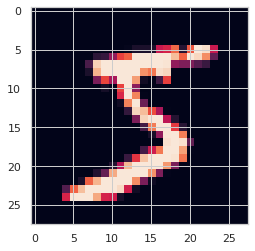

In [ ]:
#4 Print image of first label
print(y[0])
plt.imshow(X[0].reshape(28,28))

In [ ]:
#5 split the dataset into training and test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

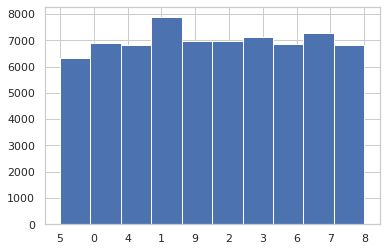

In [ ]:
#6 checking for imbalance
plt.hist(y);

####Exercise2: [Modify Labels]

---


Continuing from previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
- **Note**: The original label vector contains 10 classes, we need to modify the number of classes to 2. The label 0 will be changed to 1 and all other labels(1-9) will be changed to 0 (unlike -1 in perceptron).
1. Name the label vectors as y_train_0 and y_test_0.
2. Do a sanity check by print labels and respective images for first 10 examples

---



Solution:

---



In [ ]:
# initialize new variables names with all 0.
y_train_0 = np.zeros((len(y_train)))
y_test_0 = np.zeros((len(y_test)))

#find indices of digit 0 image
indx_0 = np.where(y_train=='0') #remember original labels are of type str not int 
# use those indices to modify y_train_0 & y_test_0 
y_train_0[indx_0] = 1 
indx_0 = np.where(y_test == '0')
y_test_0[indx_0]=1



####Exercise3: [Baseline Model]

---


Continuing from previous steps of the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Construct a baseline model with the following rule(you are free to choose different rule)

> Count number of samples per class.

> The model always outputs the class which has highest number of samples.

> Then calculate the accuracy of the baseline model.

2. Do you think accuracy alone is a good measure?

---



Solution:

---



In [ ]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==0)[0])
print(num_pos, num_neg)

5923 54077


In [ ]:
base_clf = DummyClassifier(strategy='most_frequent') #there are other approches too
base_clf.fit(X_train,y_train_0)
print(base_clf.score(X_train,y_train_0))

0.9012833333333333


* Now the reason is obvious. The model would have predicted 54077 sample correctly just by outputing -1 for all the input samples. Therefore the accuracy will be $ \frac{54077}{60000}=90.12 \% $

This is the reason why "accuracy" alone is not always a good measure!.


####Exercise4: [SGDClassifier (log loss)] [without reg] [No CV]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1.  Set the loss parameter to `loss=log` makes it a logistic regression classifier. We may refer to documentation for more details on the `SGDClassifier` class.
2. Create an instant of binary classifier(bin_sgd_clf) and call the `fit` method to train the model.
3. Make `warm_start =True` and `max_iter=1`
4. Set `eta0=0.01,learning_rate='constant' ` and `alpha=0`.
5. Let us use fit method of `SGDClassifier()` to plot the iteration vs loss curve(Of course, you could use `partial_fit()` method as well) 
6. Print the training and test accuracy
7. Use ConfusionMatrixDisplay.from_predictions() to display confusion matrix
8. Print classification report

---



Solution:

---



In [ ]:
bin_sgd_clf =SGDClassifier(loss='log',
                           penalty='l2',
                           warm_start=True,
                           eta0=0.01,
                           alpha=0,
                           learning_rate='constant',
                           random_state=1729)
Loss=[] 
iterations=100
for i in range(iterations):
  bin_sgd_clf.fit(x_train,y_train_0)
  y_pred=bin_sgd_clf.predict_proba(x_train)
  Loss.append(log_loss(y_train_0,y_pred))


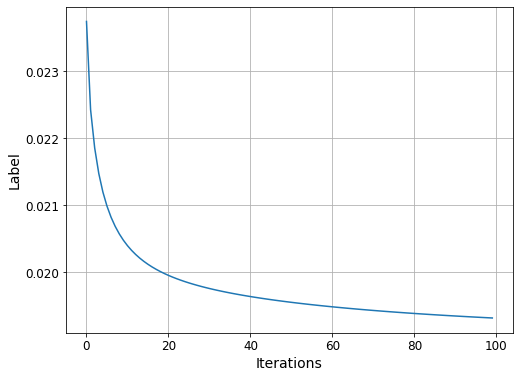

In [ ]:
plt.figure() 
plt.plot(np.arange(iterations),Loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Label') 
plt.show()

In [ ]:
print('Training accuracy:{0:.2f}'.format(bin_sgd_clf.score(x_train,y_train_0)))
print('Testing accuracy{0:.2f}'.format(bin_sgd_clf.score(x_test,y_test_0)))

Training accuracy:0.99
Testing accuracy0.99


* We know that accuracy alone is not a good metric for binary classification.
* Let's compute Precision,recall and f1-score for the model.


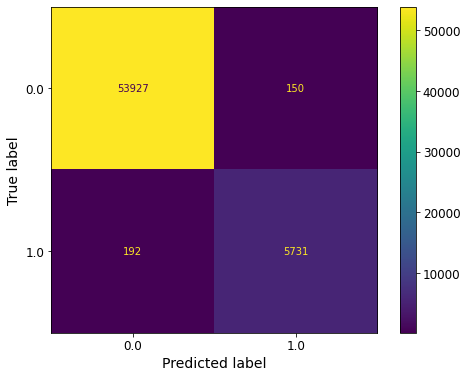

In [ ]:
y_hat_train_0 = bin_sgd_clf.predict(x_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')
plt.show()

In [ ]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54077
         1.0       0.97      0.97      0.97      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.98      0.98     60000
weighted avg       0.99      0.99      0.99     60000



####Exercise5:[SGDClassifier (log loss)] [without reg] [With CV]

---


Continuing from `Exercise4`
- DO Cross validation to check for the generalization ability of the model.

---



Solution:

---



In [ ]:
estimator = SGDClassifier(loss='log',
                          penalty='l2',
                          max_iter=100,
                          warm_start=False,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729)

In [ ]:
cv_bin_clf = cross_validate(estimator,x_train,y_train_0,cv=5,
                            scoring=['precision','recall','f1'],
                            return_train_score=True,
                            return_estimator=True)
pprint(cv_bin_clf)

{'estimator': [SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729),
               SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=100, random_state=1729)],
 'fit_time': array([1.54149604, 1.53617358, 1.51081324, 1.63690877, 1.35528994]),
 'score_time': array([0.0427947 , 0.04881883, 0.04214311, 0.04203677, 0.04257345]),
 'test_f1': array([0.95699831, 0.954371  , 0.9616041 , 0.95870583, 0.95993252]),
 'test_precision': array([0.95538721, 0.96382429, 0.97238999, 0.96735395, 0.9

* From the above result, we can see that logistic regression is better than the perceptron.! 

* However, it is good to check the weight values of all the features and decide whether regularization could be of any help.


Bias: [-5.01034596]
(1, 784) (1,)


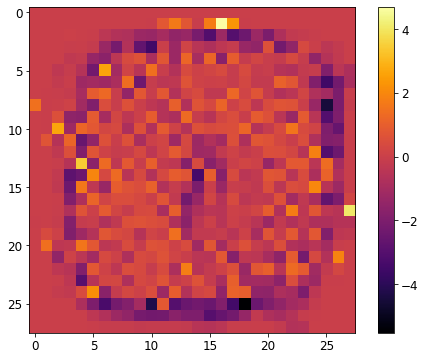

In [ ]:
weights = bin_sgd_clf.coef_
bias = bin_sgd_clf.intercept_
print('Bias:',bias)
print(weights.shape,bias.shape)
plt.figure() 
plt.imshow(weights.reshape(28,28),cmap='inferno')
plt.grid(False)
plt.colorbar()
plt.show()

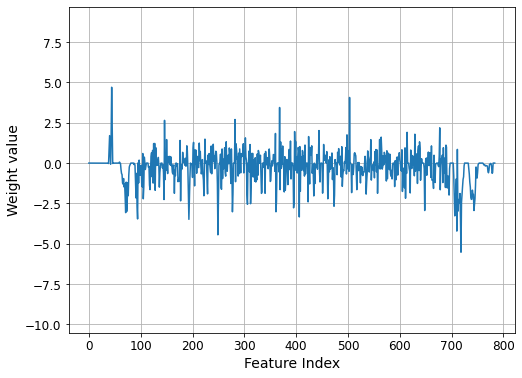

In [ ]:
plt.figure() 
plt.plot(np.arange(0,784),weights[0,:])
plt.ylim(np.min(weights[0])-5,np.max(weights[0])+5)
plt.grid(True)
plt.xlabel('Feature Index')
plt.ylabel('Weight value')
plt.show()


* It is interesting to observe how many weight values are exactly zero.
* Those features contribute nothing in the classification.


In [ ]:
zero_weight_idx = np.where(weights[0]==0)
print(len(zero_weight_idx[0]))

#num_zero_w = weights.shape[1]-np.count_nonzero(weights) 
#print("Number of weights with value zero".format(num_zero_w))

67


* From the above plot, it is also obvious that regularization is not required.





####Exercise6: [SGDClassifier (log loss)] [with reg] [No CV]

---


Continuing from previous exercises for  the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Use `SGDClassifier`  with following parameters

                               loss='log',
                               penalty='l2',
                               eta0=0.01,
                               alpha=0.001,
                               max_iter=1,
                               warm_start=True,
                               learning_rate='constant',
                               random_state=1729
                              

---
2. Plot iterations vs loss for 100 iterations
3. Find the shape of the weights and value of the bias
4. Find out number of zero weights 
5. Find out training and testing accuracy
6. Print classification report and display confusion matrix





Solution:

---



In [ ]:
bin_sgd_clf_l2 = SGDClassifier(loss='log',
                               penalty='l2',
                               eta0=0.01,
                               alpha=0.001,
                               max_iter=1,
                               warm_start=True,
                               learning_rate='constant',
                               random_state=1729
                               )

Loss =[] 
iterations =100
for i in range(iterations):
  bin_sgd_clf_l2.fit(x_train, y_train_0)
  y_pred = bin_sgd_clf_l2.predict_proba(x_train)
  Loss.append(log_loss(y_train_0,y_pred))

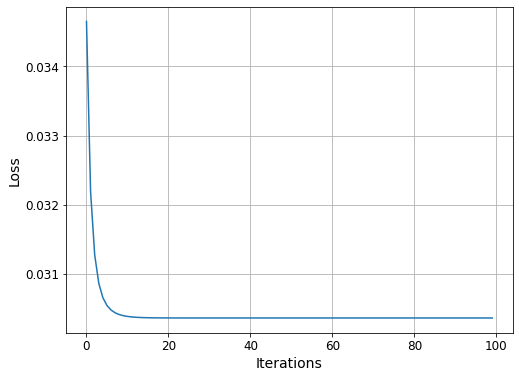

In [ ]:
plt.figure() 
plt.plot(np.arange(iterations),Loss)
plt.grid(True) 
plt.xlabel('Iterations') 
plt.ylabel('Loss') 
plt.show()

In [ ]:
#calculation of weights and bias
weights = bin_sgd_clf_l2.coef_ 
bias = bin_sgd_clf_l2.intercept_

print(weights.shape, bias)

(1, 784) [-4.43002876]


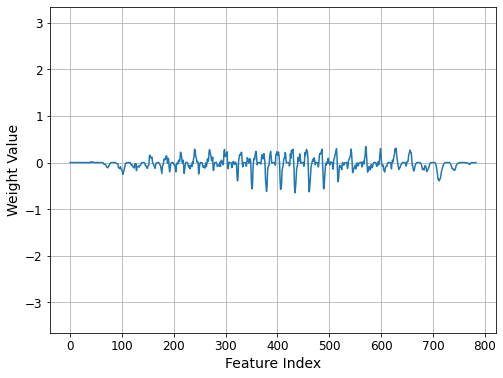

In [ ]:
plt.figure() 
plt.plot(np.arange(0,784),weights[0,:])
plt.ylim(np.min(weights[0]-3),np.max(weights[0])+3)
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.grid(True) 
plt.show()

In [ ]:
# zero weights calculation Note: zero weights can't contribute to features.
num_zero_w = len(np.where(weights==0)[0])
print('Number of zero weight count:',num_zero_w)


Number of zero weight count: 67


In [ ]:
# Training and testing accuracy 
print('Training accuracy: {0:.2f}'.format(bin_sgd_clf_l2.score(x_train,y_train_0)))
print('Testing accuracy: {0:.2f}'.format(bin_sgd_clf_l2.score(x_test,y_test_0)))

Training accuracy: 0.99
Testing accuracy: 0.99


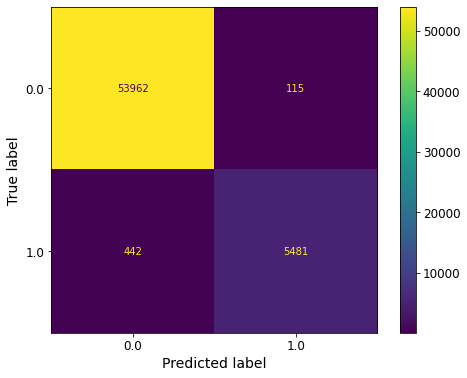

In [ ]:
y_hat_train_0 = bin_sgd_clf_l2.predict(x_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format='.5g')

In [ ]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



####Exercise7: [RandomizedSearchCV] 

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Define an SGDClassifier estimator with parameters: `(loss='log', penalty='l2', max_iter=1, warm_start=True, eta0=0.01, alpha=0, learning_rate='constant', random_state=1729)`
2. Define `RandomizedSearchCV` object with above estimator and `param_distributions={'eta0': loguniform(1e-2, 1e-1)}`, `scoring=['precision', 'recall', 'f1']`, `n_iter=5,` `refit='f1'`and `cv= 5` as '`scores`' variable
3. Find (scores.cv_results_), scores.best_estimator_ (best estimator)
4. Print classification report

---



Solution:

---



Hyper-parameter tuning

---


* We have to use cross-validate folds and mesure the same metrics across these folds for different values of hyper-parameters.
* Logistic regression uses **sgd** solver and hence the learning rate and regularization rate are two important hyper-parameters.
* For the moment, we skip penalizing the parameters of the model and just search for a better learning rate using `RandomizedSearchCV() and draw the value from the uniform distribution.


In [ ]:
lr_grid = loguniform(1e-2,1e-1)


* Note that, `lr_grid` is an object that contains a method called `rvs()` which can be used to get the samples of given size.
* Therefore, we pass this `lr_grid` object to `RandomizedSearchCV()`. Internally, it makes use of this `rvs()` method for sampling.


In [ ]:
print(lr_grid.rvs(3,random_state=42))

[0.02368864 0.0892718  0.05395031]


In [ ]:
#estimator for convenience 
estimator=SGDClassifier(loss='log',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True, 
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=1729)


In [ ]:
scores = RandomizedSearchCV(estimator,
                            param_distributions={'eta0':lr_grid},
                            cv=5,
                            scoring=['precision','recall','f1'],
                            n_iter=5,
                            refit='f1')


In [ ]:
#It take quite a long time to finish
scores.fit(x_train,y_train_0)

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(alpha=0, eta0=0.01,
                                           learning_rate='constant', loss='log',
                                           max_iter=1, random_state=1729,
                                           warm_start=True),
                   n_iter=5,
                   param_distributions={'eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f788089f090>},
                   refit='f1', scoring=['precision', 'recall', 'f1'])

In [ ]:
pprint(scores.cv_results_)

{'mean_fit_time': array([0.33212709, 0.32181134, 0.32330742, 0.32499204, 0.46975274]),
 'mean_score_time': array([0.04485798, 0.04678826, 0.04600329, 0.04902148, 0.07732201]),
 'mean_test_f1': array([0.95383975, 0.94148246, 0.94869555, 0.95090017, 0.95474878]),
 'mean_test_precision': array([0.96136672, 0.93597638, 0.94998271, 0.9540212 , 0.96640269]),
 'mean_test_recall': array([0.94682062, 0.94851138, 0.94834146, 0.94850966, 0.94361173]),
 'param_eta0': masked_array(data=[0.02368863950364078, 0.08927180304353625,
                   0.05395030966670228, 0.039687933304443715,
                   0.01432249371823025],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.02368863950364078},
            {'eta0': 0.08927180304353625},
            {'eta0': 0.05395030966670228},
            {'eta0': 0.039687933304443715},
            {'eta0': 0.01432249371823025}],
 'rank_test_f1': array([2, 5, 4, 3, 1], dtype=int32),


* Let us pick the best estimator from the results

In [ ]:
best_bin_clf = scores.best_estimator_


In [ ]:
y_hat_train_best_0 = best_bin_clf.predict(x_train)

In [ ]:
print(classification_report(y_train_0, y_hat_train_best_0))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     54077
         1.0       0.98      0.92      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



####Exercise8: [PR Curve]

---


Continuing from the previous exercises for the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

- Plot PR Curve


---



Solution:

---



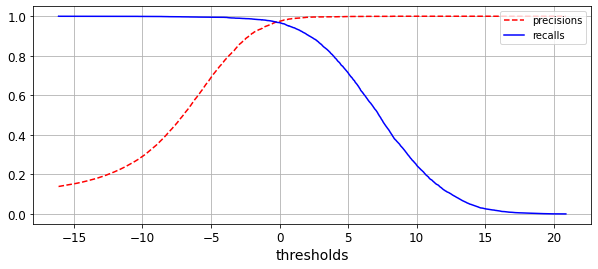

In [ ]:
y_scores = bin_sgd_clf.decision_function(x_train)
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4)) 
plt.plot(thresholds,precisions[:-1],'r--',label='precisions')
plt.plot(thresholds,recalls[:-1],'b-',label='recalls')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('thresholds')
plt.show()

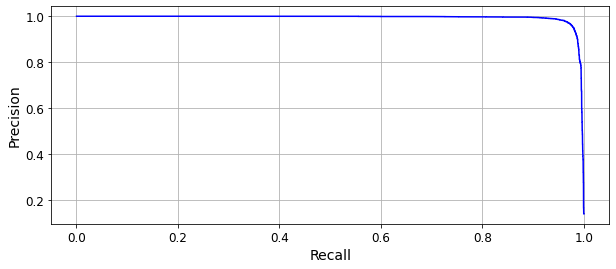

In [ ]:
#precision recall curve 
plt.figure(figsize=(10,4))
plt.plot(recalls[:-1],precisions[:-1], 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

####Exercise9: [ROC Curve]

---


Continuing from the previous exercises for the dataset  `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

- Plot ROC Curve
---



Solution:

---



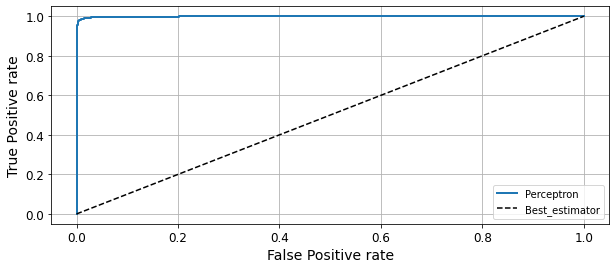

In [ ]:
fpr,tpr,thresholds = roc_curve(y_train_0,y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,linewidth=2,label='Perceptron')
plt.plot([0,1],[0,1],'k--',label='Best_estimator')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#roc auc curve 

auc=roc_auc_score(y_train_0,y_scores)
print('AUC: {0:.3f}'.format(auc))

AUC: 0.999


###2. Logistic Regression  (Without Regularization)

---



####Exercise1: [Logistic Regression Vs. GridSearchCV Vs. LogisticRegressionCV]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Create a pipeline with MinMaxScaler and  logistic regresssion classifier with `random_state=1729,                                          solver='lbfgs', C=np.infty)`
2. Create a pipeline and fit using GridSearchCV with C values `[0,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]` as part of the grid search and scoring as f1. Findout best_params_, best_score_, and best_estimator_
3. Instead of GridSearchCV use LogisticRegressionCV
4. Predict each example with above 3 classifiers
5. Compare precision, recall and f1 score for the above 3 classifiers
6. use decision_function method to compute uy_scores for all three classifiers
7. Draw PR Curve for all three classifiers
8. Import auc and compute auc-pr for all the three classifiers
9. Using ConfusionMatrixDisplay.from_predictions() display confusion matrix for all three classifiers
10. Plot ROC for all three classifiers and calculate the area under the ROC curve

---



#####Solution:

---



Logistic Regression 

---


* In the previous setup, we used `SGDClassifier` to train 0-detector model in an iterative manner.
 * We can also train such a classifier by solving a set of equations obtained by setting the derivative of loss w.r.t. weights to 0.
 * These are not linear equations and therefore we need a different set of solvers.

* Sklearn uses solvers like `liblinear`, `newton-cg`, `sag` `saga` and `lbfgs` to find the optimal weights.
* Regularization is applied by default.
* Parameters: 
  `LogisticRegression(penalty='l2',*,dual=False, tol=0.0001, c=1.0, fit_intercept = True, intercept_scaling=1, class_weight=None, solver='lbfgs',max_iter=100,multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio =None)` 
* Note some of the important default parameters:
  * Regularization: `penalty='l2'`
  * Regularization rate: `C=1`
  * Solver: `solver = 'lbfgs'`
* Let's implement LogisticRegression(), **without regularization** by setting the parameter $ C= \infty $. Therefore, we may expect performance close to `SGDClassifier` without regularization.

 Training without regularization 

---


* **STEP 1:** Instantiate a pipeline object with two stages:
 * The first stage contains `MinMaxScaler` for scaling the input.
 * The second state contains a `LogisticRegression` classifier with the regularization rate $C = \infty $
* **STEP 2:** Train the pipeline with feature matrix `x_train` and label vector `y_train_0`.



In [ ]:
pipe_logit = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=1729,
                                                              solver='lbfgs',
                                                              C=np.infty))
pipe_logit.fit(x_train, y_train_0)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=inf, random_state=1729))])

By executing this cell, we trained our `LogisticRegression` classifier, which can be used for making predictions on the new inputs.


Hyperparameter search 

---



with GridSearchCV 


In the previous cell we trained `LogisticRegression` Classifier with default parameterization.

Now we will demonstrate how to search for the best parameter value for regularization rate C, as an illustration, using GridSearachCV.

   Note that you can also use `RandomizedSearchCV` for this purpose.

In order to use `GridSearchCV`, we first define a set of values that we want to try out for c. The best value of c will be found from this set.

We define the `pipeline` object exactly like how we defined in the previous cell while using `LogisticRegression` classifier with default parameters and no regularization.

The additional step here is to instantiate a `GridSearchCV` object with a `pipeline` estimator, parameter grid specification and f1 as a scoring function.

  Note that you can use other scoring functions like `precision`, `recall`, however the value of C is found such that the given scoring function is optimized.

  







In [ ]:
from sklearn.pipeline import Pipeline 

grid_Cs = [0,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]


scaler = MinMaxScaler() 
logreg = LogisticRegression(C=1.0, random_state =1729)

pipe = Pipeline([('scaler',scaler),
                 ('logistic',logreg)])

pipe_logit_cv = GridSearchCV(pipe, 
                             param_grid={'logistic__C':grid_Cs},
                             scoring='f1')
pipe_logit_cv.fit(x_train,y_train_0)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=1729))]),
             param_grid={'logistic__C': [0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0]},
             scoring='f1')

The `GridSearchCV` finds the best value of c and refits the estimator by default on the entire training set. This gives us the logistic regression classifier with best value of C.

We can check the value of the bst parameter by accessing the `best_params_` member variable of the `GridSearchCV` object.


In [ ]:
pipe_logit_cv.best_params_

{'logistic__C': 0.1}

and the best score can be found in `best_score_` member variable and can be obtained as follows:



In [ ]:
pipe_logit_cv.best_score_

0.9579654953103655

The best estimator can be accessed with `best_estimator_` member variable.


In [ ]:
pipe_logit_cv.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=0.1, random_state=1729))])

With `LogisticRegressionCV` 

---



Instead of using `GridSearchCV` for finding the best value for parameter c, we can use `LogisticRegressionCV` for performing the same job. 
  * **STEP 1**: Here we make use of `LogisticRegressionCV` estimator with number of cross validation folds `cv=5` and scoring scheme `scoring='f1'` in the `pipeline` object.

  * **STEP 2**: In the second step, we train the pipeline object as before.
  

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
estimator = LogisticRegressionCV(cv=5, scoring='f1',random_state=1729)
logit_cv = make_pipeline(MinMaxScaler(),estimator)
logit_cv.fit(x_train,y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=5, random_state=1729, scoring='f1'))])

By default, `LogisticRegressionCV` refits the model on the entire training set with the best parameter values obtained via cross validation.

Performance evaluation.

---



Precision, recall, f1-score 

Let's evaluate performance of these three different logistic regression classifiers for detecting digit 0 from the image.

 * Logistic regression without regularization 
 * Best logistic regression classifier found through `GridSearchCV`.
 * Best classifier found through `LogisticRegressionCV`.
  Note that `GridSearchCV` and `LogisticRegressionCV` by default refit the classifier for the best hyperparameter values. 

Let's get prediction for test set with these three classifiers: 



In [ ]:
lr_y_hat_0 = pipe_logit.predict(x_test) 
lr_gs_y_hat_0 = pipe_logit_cv.best_estimator_.predict(x_test)
lr_cv_y_hat_0 = logit_cv.predict(x_test) 

We will compare **Precision, recall and F1 score** for the three classifiers.

In [ ]:
precision_lr = precision_score(y_test_0, lr_y_hat_0) 
recall_lr = recall_score(y_test_0, lr_y_hat_0) 

precision_lr_gs = precision_score(y_test_0,lr_gs_y_hat_0)
recall_lr_gs = recall_score(y_test_0, lr_gs_y_hat_0)

precision_lr_cv = precision_score(y_test_0, lr_cv_y_hat_0)
recall_lr_cv = recall_score(y_test_0, lr_cv_y_hat_0)

In [ ]:
print(f"LogReg: precision={precision_lr},recall={recall_lr}")
print(f"GridSearch: precision={precision_lr_gs},recall={recall_lr_gs}")
print(f"LogRegCV: precision={precision_lr_cv},recall={recall_lr_cv}")

LogReg: precision=0.9515151515151515,recall=0.9612244897959183
GridSearch: precision=0.9564336372847011,recall=0.963265306122449
LogRegCV: precision=0.9546370967741935,recall=0.9663265306122449


Note that all three classifiers have roughly the same performance as measured with precision and recall.
 * The `LogisticRegression` classifier obtained through `GridSearchCV` has the highest precision-marginally higher that the other two classifiers.
 * The `LogisticRegression` classifier obtained through `LogisticRegressionCV` has the highest recall - marginally higher than the other two classifiers.

Using PR-curve


In [ ]:
y_scores_lr = pipe_logit.decision_function(x_test)
precisions_lr, recalls_lr, thresholds_lr= precision_recall_curve(y_test_0, y_scores_lr)

y_scores_lr_gs = pipe_logit_cv.decision_function(x_test)
precisions_lr_gs, recalls_lr_gs, thresholds_lr_gs= precision_recall_curve(y_test_0, y_scores_lr_gs)

y_scores_lr_cv = pipe_logit_cv.decision_function(x_test)
precisions_lr_cv, recalls_lr_cv, thresholds_lr_cv= precision_recall_curve(y_test_0, y_scores_lr_cv)





We have all the quantities for plotting the PR curve. Let's plot PR curve for all three classifiers.

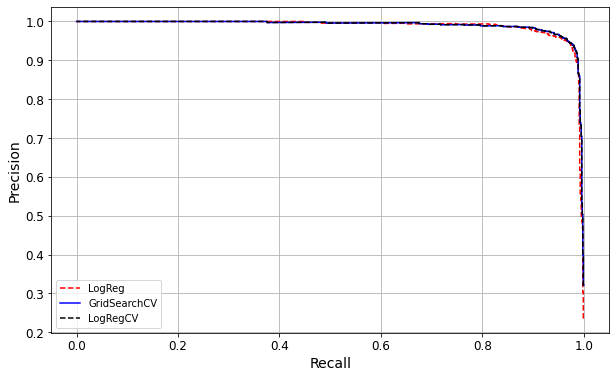

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(recalls_lr, precisions_lr, 'r--',label='LogReg')
plt.plot(recalls_lr_gs, precisions_lr_gs,'b-',label="GridSearchCV") 
plt.plot(recalls_lr_cv, precisions_lr_cv,'k--',label='LogRegCV')

plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend() 
plt.show()


Note that the PR curves for all three classifiers overlap significantly.

Let's calculate are under the PR curve:


In [ ]:
from sklearn.metrics import auc 
auc_lr =auc(recalls_lr, precisions_lr)
auc_lr_gs=auc(recalls_lr_gs, precisions_lr_gs)
auc_lr_cv =auc(recalls_lr_cv, precisions_lr_cv)


In [ ]:
print('AUC-PR for logistic regression:',auc_lr)
print("AUC-PR for GridSearchCV",auc_lr_gs) 
print("AUC-PR for Logistic Regression CV:",auc_lr_cv)

AUC-PR for logistic regression: 0.988154157939231
AUC-PR for GridSearchCV 0.9896724785220581
AUC-PR for Logistic Regression CV: 0.9896724785220581


Observe that the AUC for all three classifier is roughly the same with `LogisticRegression` classifier obtained through cross validation and grid search have slightly higher AUC under PR curve.

Confusion Matrix 

---


We show a confusion matrix for test set with logistic regression classifier:


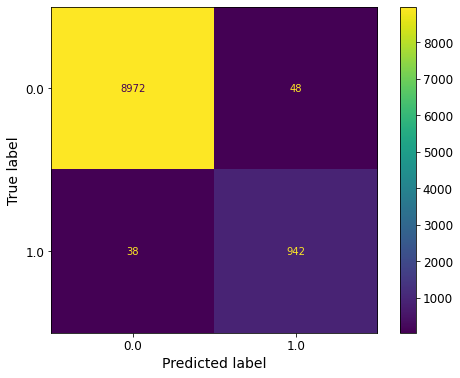

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0,lr_y_hat_0, values_format='.5g')
plt.show()

Confusion matrix for test set with logistic regression classifier obtained through **Grid search**: 



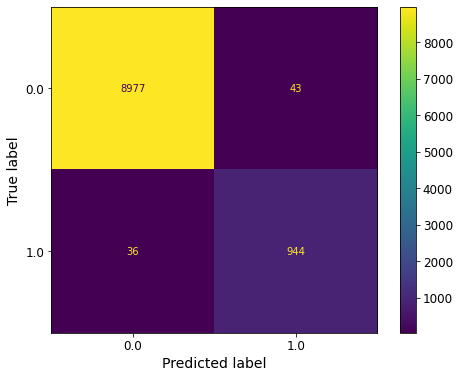

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, lr_gs_y_hat_0)

Confusion matrix for test set with logistic regression classifier through cross validation:


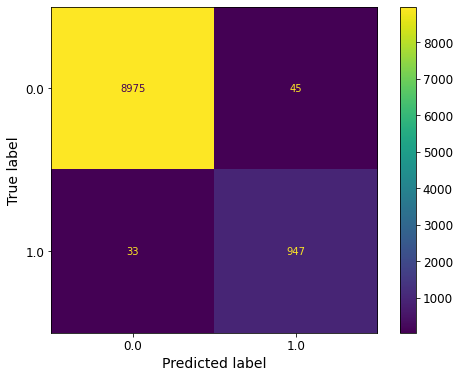

In [ ]:
cm_display =ConfusionMatrixDisplay.from_predictions(y_test_0,lr_cv_y_hat_0)

####Exercise2: [Ridge Classifier]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

**Note**: Ridge classifier cast the problem as least-square classification and finds the optimal weight using some matrix decomposition technique such as SVD.
1. To train the ridge classifier, modify the labels to be $ y \in \{+1,-1\}$
2. The classifier also by defaul
t implements L2 regularization. However, use it without regularization by setting `alpha=0`
3. Make a pipeline and use MinMaxScaler and RidgeClassifier estimator with zero as alpha value and set normalize to false
4. Print classification report
5. Use cross validation using cross_validate, find the best estimator and print classification report using the best estimator

---



Solution:

---



In [ ]:
X.shape

(70000, 784)

In [ ]:
#initialize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

#find indices of digit 0 image
indx_0 = np.where(y_train=='0')
y_train_0[indx_0]=1
indx_0 = np.where(y_test=='0')
y_test_0[indx_0]=1


* First take a look into the parameters of the class
  `RidgeClassifier(alpha=1.0,*,fit_intercept=True, normalize='deprecated',copy_X=True,max_iter=None, tol=0.001,class_weight=None, solver='auto', positive=False,random_state=None)` 

* Note the parameter `normalize` is deprecated. 


In [ ]:
estimator = RidgeClassifier(normalize=False,alpha=0)
pipe_ridge=make_pipeline(MinMaxScaler(),estimator)
pipe_ridge.fit(x_train,y_train_0)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])

In [ ]:
#Performance 

y_hat_test_0 = pipe_ridge.predict(x_test) 
print(classification_report(y_test_0,y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      9020
         1.0       0.95      0.87      0.91       980

    accuracy                           0.98     10000
   macro avg       0.97      0.93      0.95     10000
weighted avg       0.98      0.98      0.98     10000



Cross Validation 

---




In [ ]:
cv_bin_ridge_clf = cross_validate(pipe_ridge,x_train,y_train_0, cv =5, 
                                  scoring=['precision','recall','f1'],
                                  return_train_score=True,
                                  return_estimator=True)
pprint(cv_bin_ridge_clf)


{'estimator': [Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])],
 'fit_time': array([11.53529501, 11.35487056, 11.37536478, 11.45613718, 11.4335165 ]),
 'score_time': array([0.09163189, 0.10674548, 0.090487  , 0.0894382 , 0.10013342]),
 'test_f1': array([0.90710859, 0.90917108, 0.92334802, 0.904     , 0.90892857]),
 'test_preci

In [ ]:
best_estimator_id = np.argmax(cv_bin_ridge_clf['train_f1']); best_estimator_id

2

In [ ]:
best_estimator = cv_bin_ridge_clf['estimator'][best_estimator_id]

Let's evaluate the performance of the best clasifier on the test set:


In [ ]:
y_hat_test_0 = best_estimator.predict(x_test)
print(classification_report(y_test_0,y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      9020
         1.0       0.95      0.90      0.93       980

    accuracy                           0.99     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.99      0.99      0.99     10000



####Exercise3: [ Multiclass SGDClassifier (log loss) ]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`
1. Create a SGDClassifier estimator with parameters `(loss='log', penalty='l2', max_iter=1, warm_start=True, eta0=0.01, alpha=0, learning_rate='constant', random_state=1729)`
2. Create a pipline object with MinMaxScaler scaled and above estimator and name it as `'pipe_sgd_ovr'`
3. Plot a loss vs iteration curve for 100 iterations
4. Print classification report, display confusion matrix, print shape of coef_ and value of the bias


---



Solution:

---



In [ ]:
estimator = SGDClassifier(loss='log',
                          penalty='l2',
                          max_iter=1,
                          warm_start=True,
                          eta0=0.01,
                          alpha=0,
                          learning_rate='constant',
                          random_state=1729) 
pipe_sgd_ovr = make_pipeline(MinMaxScaler(),estimator) 


In [ ]:
Loss = [] 
iterations = 100 
for i in range(iterations):
  pipe_sgd_ovr.fit(x_train,y_train) 
  y_pred = pipe_sgd_ovr.predict_proba(x_train) 
  Loss.append(log_loss(y_train,y_pred)) 

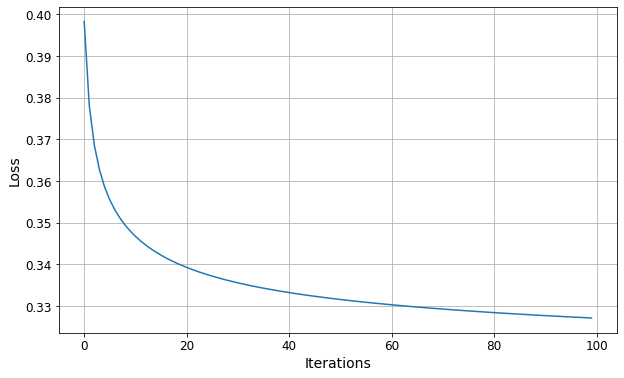

In [ ]:
plt.figure(figsize=(10,6)) 
plt.plot(np.arange(iterations),Loss) 
plt.grid(True) 
plt.xlabel('Iterations') 
plt.ylabel('Loss')
plt.show()

What actually happened behind the screen is that the library automatically created 10 binary classifiers and trained them ! During the interference time, the input will be passed through all the 10 classifiers and the highest score among the outputs will be considered as the predicted class. To see it in acction, let us execute the following lines of code.



In [ ]:
pipe_sgd_ovr[1]

SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=1, random_state=1729, warm_start=True)

In [ ]:
pipe_sgd_ovr[1].coef_.shape

(10, 784)

So, it is a matrix of size $ 10 \times 784$. A row represents the weights of a single binary classifier.


In [ ]:
y_hat = pipe_sgd_ovr.predict(x_test) ; y_hat[:5]

array(['7', '2', '1', '0', '4'], dtype='<U1')

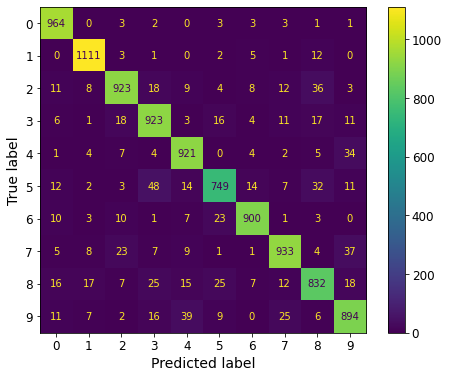

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions( y_test, y_hat, values_format='.5g' )

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.88      0.91      0.90      1010
           4       0.91      0.94      0.92       982
           5       0.90      0.84      0.87       892
           6       0.95      0.94      0.95       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.85      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000



####Exercise4:  [ Multiclass LogisticRegression ]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

1. Create a pipline object with MinMaxScaler scaled and above LogisticRegression with `random_state=1729, solver='lbfgs', C=np.infty` as parameters and name it as `'pipe_logit_ovr'`
2. Fit the pipline object with training data
3. Print classification report, display confusion matrix, 

---



Solution:

---



In [ ]:
pipe_logit_ovr = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=1729,
                                                                 solver='lbfgs',
                                                                 C=np.infty)) 
pipe_logit_ovr.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=inf, random_state=1729))])

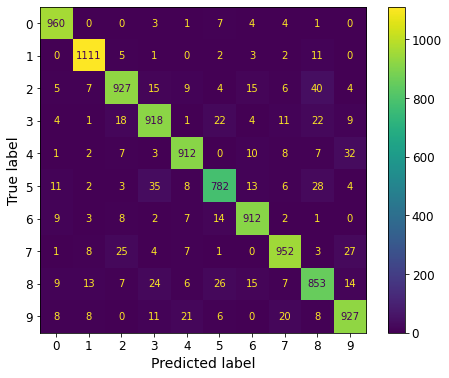

In [ ]:
y_hat = pipe_logit_ovr.predict(x_test) 
cm_display = ConfusionMatrixDisplay.from_predictions(y_test,y_hat, values_format='.5g')

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



###3. Naive Bayes Classifier  (Text Classification)

---



####Exercise1:  [ Libraries ]

---


Fill in the blanks

---



In [ ]:
#Data loading 
from sklearn.datasets import fetch_20newsgroups 
 
#Preprocessing 
from sklearn._______________ import TfidfVectorizer

#Model/estimator 
from sklearn._______________ import MultinomialNB 

#Pipeline utility 
from sklearn._______ import make_pipeline 

#Model evaluation 
from sklearn._______ import ConfusionMatrixDisplay 

#plotting library 
import matplotlib._______ as plt


Solution:

---



In [ ]:
#Data loading 
from sklearn.datasets import fetch_20newsgroups 
 
#Preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer

#Model/estimator 
from sklearn.naive_bayes import MultinomialNB 

#Pipeline utility 
from sklearn.pipeline import make_pipeline 

#Model evaluation 
from sklearn.metrics import ConfusionMatrixDisplay 

#plotting library 
import matplotlib.pyplot as plt


####Exercise2:  [ Common Setup ]

---


Dataset: `20newsgroup`

1. Download 20 newsgroup dataset with `fetch_20newsgroup`API.
2. Explore the number of classes present in the label
3. Create a Subset of the dataset: Instead of 20 use these 4 `['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']`  and download the training and test data.

---



Solution:

---



Solution:

---



Exercise read about **TfidfVectorizer** API

Dataset 

---



We will be using 20 newsgroup data set for classification 

As a first step, let's download 20 newsgroup dataset with `fetch_20newsgroup`API.



In [ ]:
data = fetch_20newsgroups() 


Let's look at the names of the classes 


In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are **20 categories** in the dataset. For simplicity, we will select **4** of these categories and download training and test sets.


In [ ]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics'] 
train = fetch_20newsgroups(subset='train', categories=categories) 
test = fetch_20newsgroups(subset='test',categories=categories) 

Let's look at a sample trianing document: 


In [ ]:
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

####Exercise3:  [ Modelling & Prediction ]

---


1. Convert the text data to numeric form using TfidfVectorizer  API (it converts text input into a vector of numerical values)
2. Use multinomial naive Bayes Classifier for categorizing documents from 20newsgroup corpus.
3. Create make_pipeline object combining 1 and 2 and fit the model to find the values of the parameters
4. Use ConfusionMatrixDisplay.from_estimator() to display confusion matrix
5. Make use of predict function on pipeline for predicting category of a test string.
6. Predict the category for the following strings:

> - 'sending a payload to this ISS'

> - 'discussing islam vs atheism'

> - 'determining the screen resolution'

---



Solution:

---



This data is different than what we have seen so far. Here the training data contains document in text form.
Data preprocessing and modeling 

---



As we have mentioned this in the first week of machine learning techniques course, we need to convert the text data to numeric form.
`TfidfVectorizer` is one such API that converts text input into a vector of numerical values.

We will use `TfidfVectorizer` as a preprocessing step to obtain feature vector corresponding to the text document.

We will be using multinomial naive Bayes Classifier for categorizing documents from 20newsgroup corpus. 




In [ ]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB()) 

In [ ]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

Model evaluation 

---



Let's first predict the labels for the test set and then calculate the confusion matrix for the test set.


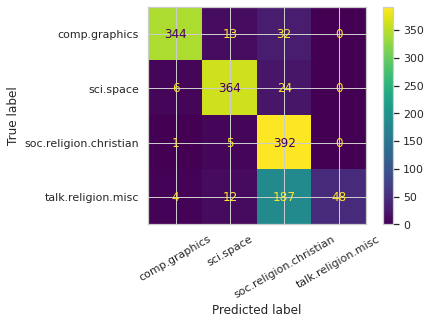

In [ ]:
ConfusionMatrixDisplay.from_estimator(model,test.data, test.target, display_labels=test.target_names,xticks_rotation=30) 
plt.show()

Observe that: 
  * There is a confusion between documents of class `soc.religion.christian` and `talk.religion.misc`, which is along the expected lines.
  * The classes `comp.graphics` and `sci.space` are well separated by such a simple classifier.

Now we have a tool to classify statements into one of these four classes.
  Make use of `predict` function on pipeline for predicting category of a test string.
   

In [ ]:
model.predict(['sending a payload to this ISS'])[0], model.predict(['discussing islam vs atheism']), train.target_names[1]

(1, array([2]), 'sci.space')

In [ ]:
def predict_category(s, train = train, model=model):
  pred = model.predict([s]) 
  return train.target_names[pred[0]]

Using this function for prediction:

In [ ]:
predict_category('sending a payload to this ISS') 


'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

####Exercise4:  [ BluePrint / Example ]

---


Use the dataset from `X, y = fetch_openml('mnist_784', version=1, return_X_y=True)`

1. Create a pipline object with MinMaxScaler scaled and above LogisticRegression with `random_state=1729, solver='lbfgs', C=np.infty` as parameters and name it as `'pipe_logit_ovr'`
2. Fit the pipline object with training data
3. Print classification report, display confusion matrix, 

---



Solution:

---



In [ ]:
#x+uybd

Solution:

---



In [ ]:
#x+uybd

##Week7: (Softmax Regression, KNN, LSML)

---



###1. Softmax Regression (No CV):

---



####Exercise1:  [ Logistic Regression ]
---


Use the folowing dataset and info: 

---


In [ ]:
np.random.seed(42)

from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1. Plot a histogram to check class imbalance
2. Create a pipeline with StandardScaler to scale and LogisticRegression with sag solver and multinomial for multi_class parameter and fit the pipeline object with the training data
3. Print the shape of coeffient, bias and classes 
4. Print clasification report and display confusion matrix using appropraite skearn API

Solution:

---



In [ ]:
#Model building 

pipe = Pipeline([('scaler',StandardScaler()),
                 ('logreg',LogisticRegression(multi_class='multinomial',solver='sag'))]) 
pipe.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [ ]:
pipe[-1].intercept_

array([-0.25772504, -0.49001505,  0.23215004,  0.24497982, -0.32792409,
        0.30887949, -0.20104819, -0.25996318,  0.70634575,  0.04432048])

In [ ]:
pipe[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
#Model evaluation 

y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



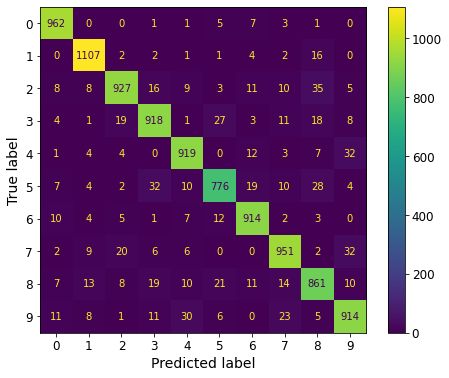

In [ ]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 

<Figure size 1440x1440 with 0 Axes>

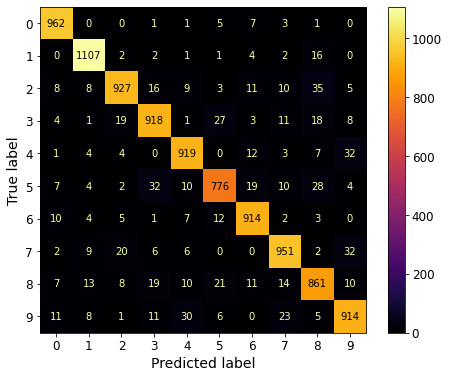

In [ ]:
plt.figure(figsize=(20,20))
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test,cmap='inferno',values_format='.5g') 
plt.show()

In [ ]:
#x+uybd

###2. Softmax Regression (With CV):

---



####Exercise1:  [ Logistic Regression with CV]
---


Use the folowing dataset and info: 

---


In [ ]:
np.random.seed(42)

from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1. Plot a histogram to check class imbalance
2. Create a pipeline with StandardScaler to scale and LogisticRegression with sag solver, cv=5, max_iter =100, random_state=1729 and multinomial for multi_class parameter and fit the pipeline object with the training data
3. Print the shape of coeffient, bias and classes 
4. Print clasification report and display confusion matrix using appropraite skearn API

Solution:

---



In [ ]:
#Following is an attempt to cross-validate the same regression model, but it takes more than 3 hours to finish. For now, just commenting out the lines.

# scorer = make_scorer(f1_score, average='micro')
# pipe = Pipeline([('scaler', StandardScaler()), ('logreg', 
#                                                 LogisticRegressionCV(cv=5, multi_class='multinomial', solver='sag', 
#                                                                      scoring=scorer, max_iter=100, random_state=1729))])
# pipe.fit(X_train, y_train)
#Checking the best hyperparameters that resulted from the cross-validation

# pipe[-1].C_
# pipe[-1].l1_ratio_
# print(classification_report(y_test, pipe.predict(X_test)))
# ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

###3. KNN  (With CV):

---



####Exercise1:  [ Common Setup + Modify Label]

---


Use the following dataset: 


---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1. Modify labels 0 images with 1 and non-0's with -1


Solution:

---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X_pd.to_numpy()
y = y_pd.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == '0')
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


####Exercise2:  [Apply PCA]

---


Use the following dataset: 


---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1. Use make_pipeline and apply MinMaxScaler and PCA with 2 components and 3 components 
2. Then, Use the code below and note what you observe

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'b'])
sns.scatterplot(x = X_train_pca_2d[:, 0], y = X_train_pca_2d[:, 1], hue=y_train_0, palette=cmap)

Solution:

---



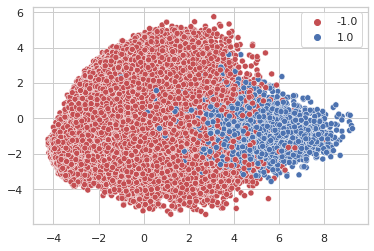

In [ ]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components=2))
X_train_pca_2d = pipe_pca_2d.fit_transform(X_train)

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'b'])
sns.scatterplot(x = X_train_pca_2d[:, 0], y = X_train_pca_2d[:, 1], hue=y_train_0, palette=cmap)

####Exercise3:  [Train KNNClassifier]

---


Use the following dataset: 


---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
pipe_pca_2d = make_pipeline(MinMaxScaler(), PCA(n_components=2))
pipe_clf_pca_2d = make_pipeline(pipe_pca_2d, KNeighborsClassifier(n_neighbors=3))


1. Create a small dataset to train 10 samples (first 5 from negative class and last 5 from positive class) and save it to X and y

2. Fit the pipe_pca_2d with X and y
3. Plot them X (after applying PCA) with corresponding y
4. Predict from the model and using ConfusionMatrixDisplay.from_predictions() print confusion matrix

Solution:

---



In [ ]:
# Train 10 samples (first 5 from negative class and last 5 from positive class)
index_neg = np.argsort(y_train_0)[:5]
index_pos = np.argsort(y_train_0)[-1:-6:-1]
print(f"Positive classes: {y_train_0[index_pos]}")
print(f"Negative classes: {y_train_0[index_neg]}")


Positive classes: [1. 1. 1. 1. 1.]
Negative classes: [-1. -1. -1. -1. -1.]


In [ ]:
# Create a small dataset
X = np.vstack((X_train[index_pos, :], X_train[index_neg, :]))
y = np.hstack((y_train_0[index_pos], y_train_0[index_neg]))
print(X.shape, y.shape)

(10, 784) (10,)


In [ ]:
pipe_clf_pca_2d .fit(X, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


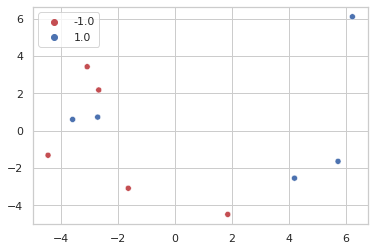

In [ ]:
# Plot them X (after applying PCA) with corresponding y.
X_reduced = pipe_clf_pca_2d [0].transform(X)

cmap = ListedColormap(['r', 'b'])
sns.scatterplot(X_reduced[:, 0], y=X_reduced[:, 1], marker='o', hue=y, palette=cmap)

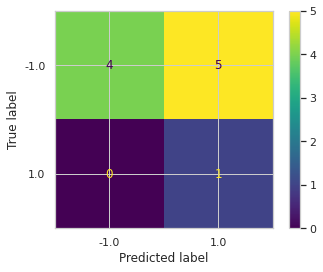

In [ ]:
# Predict from the model
y_hat_0 = pipe_clf_pca_2d.predict(X_test[:10, :])
ConfusionMatrixDisplay.from_predictions(y_test_0[:10], y_hat_0)

####Exercise4:  [GridSearchCV]   [Without PCA]

---


Use the following dataset: 


---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

1. Create a pipeline using make_pipeline usinf MinMaxScaler and KNN classifier with 1 neighbor
2. Use `[1,3,5,7,9,11]` as grid values for n_neighbors
3. Use scoring parameter to be precision and cv value as 5
4. Fit the GridSearchCV object
5. print the results, best parameters
6. Repeat the same with the best value obtained and display confusion matrix

Solution:

---



In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))

grid_k = {'kneighborsclassifier__n_neighbors': [1,3,5,7,9,11]}
cv = GridSearchCV(pipe_knn, param_grid=grid_k, scoring='precision', cv=5)

cv.fit(X_train, y_train_0)
print(cv)

NameError: ignored

In [ ]:
cv.cv_results_


In [ ]:
cv.best_params_

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))
pipe_knn.fit(X_train, y_train_0)

In [ ]:
y_hat_0 = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_0)

####Exercise4:  [Multiclass KNN Classifier] 

---


Use the following dataset: 


---



In [ ]:
np.random.seed(42)
from sklearn.datasets import fetch_openml
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



1. Create a pipeline object 'pipe_knn' using make_pipeline usinf MinMaxScaler and KNN classifier with 7 as n_neighbors value
2. Fit pipe_knn with the training data
3. Predict on test dataset
4. Display confusion matrix
5. Print the classes 
6. Print the classification report

Solution:

---



In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))


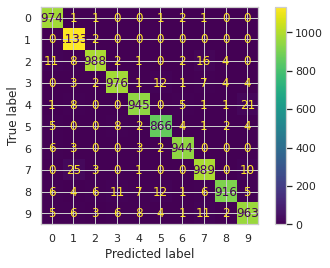

In [ ]:
pipe_knn.fit(X_train, y_train)  #reuse the pipe created earlier
y_hat = pipe_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [ ]:
pipe_knn.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



###4. KNN  (Regression Problem):

---



####Exercise1:  [California Housing] 

---


Use the following dataset: 


---



In [ ]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape, X_test.shape)

(20640, 8) (20640,)
(14448, 8) (6192, 8)


1. Create a pipeline with minmax scaler and knn regressor with 2 neighbors
2. Fit pipeline object with the training data
3. Predict on test dataset
4. Find and print the mean squared error with squared = False
5. Use GridSearchCV for n_neighbors of list(range(1, 31)), cv=10, n_jobs=1 as parameters, fit this GridSearchCV object with the training data
6. Find the best estimator
7. Find the mean squared error value using the best estimator

Solution:

---



In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor(n_neighbors=2))])
gs = GridSearchCV(pipe, param_grid={'knn__n_neighbors': list(range(1, 31))}, cv=10, n_jobs=1, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=2))]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             return_train_score=True)

In [ ]:
gs.best_estimator_


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [ ]:
# Now, use this estimator to predict.
pred = gs.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, pred, squared=False)
print("RMSE value for k is: ", error)

RMSE value for k is:  0.6255268557053962


####Exercise2:  [California Housing] [With Polynomial Features]

---


Use the following dataset: 


---



In [ ]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape, X_test.shape)

(20640, 8) (20640,)
(14448, 8) (6192, 8)


1. Create a pipeline object with polynomial features, minmax scaler and knn regressor 
2. Use GridSearchCV with the above pipeline object as estimator along with polynomial degree with list(range(1,4)), cv=10
3. Fit the above object wirth the training set
4. Print the best estimator
5. Get the RMSE value using the best estimator

Solution:

---



In [ ]:
params = {'poly__degree': list(range(1,4))} 

pipe = Pipeline([('poly', PolynomialFeatures()),
                ('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor()) ])
gs = GridSearchCV(estimator=pipe,
                  param_grid = params,
                  cv =10,
                  n_jobs=-1) 
gs.fit(X_train, y_train)
reg_knn = gs.best_estimator_ 
print(reg_knn)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])


We evaluate the model with the test set.



In [ ]:
pred = gs.best_estimator_.predict(X_test) 
error = mean_squared_error(y_test, pred, squared=False) 
print('RMSE value of k is:', error)

RMSE value of k is: 0.6313551708664618


###5. Large Scale Machine Learning:

---



####Exercise1:  [ fit(  ) Vs. partial_fit(  ) ] [ Incremental Learning ]

---


Use the following dataset: ( 50000 samples with 10 features matrix, 3 classes in the target label, each class having a single cluster)


```
x,y = make_classification(n_samples=50000, n_features=10,
                          n_classes =3,
                          n_clusters_per_class=1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15) 


```

1. Insitantiate a SGDClassifier object with `max_iter =1000, tol=0.01` then 


> a) **fit** with training data 

> b) Get score on training and test set 

> c) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> d) print classification report

2. Follow the questions below:

> a) Concatnate training data and save it into a csv file

>b) Write a python program to iterate through the csv file with chunk size of 1000 and partial_fit the data, print the value of coefficient and intercept after each iteration

>c) Get score on traininf and test data

>d) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> e) print classification report



---


Compare the results of the fit() vs partial_fit()


---



---



#####Solution:

---



In [ ]:
clf1 = SGDClassifier(max_iter =1000, tol=0.01)

We will use traditional `fit()` method to train out model. 


In [ ]:
clf1.fit(xtrain, ytrain)

SGDClassifier(tol=0.01)

Let's obtain the training and test scores on the trained model.



In [ ]:
train_score = clf1.score(xtrain, ytrain)
train_score

0.8332941176470589

In [ ]:
test_score = clf1.score(xtest, ytest)
test_score

0.8302666666666667

We obtain the confusion matrix and classification report for evaluating the classifier.



[[2053  445   14]
 [ 274 2149   20]
 [ 255  265 2025]]


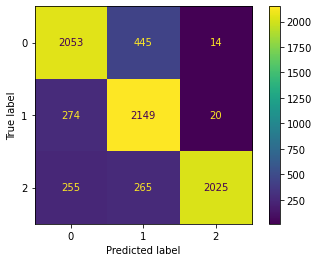

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ypred = clf1.predict(xtest) 
print(confusion_matrix(ytest, ypred))
ConfusionMatrixDisplay.from_predictions(ytest, ypred)  


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2512
           1       0.75      0.88      0.81      2443
           2       0.98      0.80      0.88      2545

    accuracy                           0.83      7500
   macro avg       0.84      0.83      0.83      7500
weighted avg       0.84      0.83      0.83      7500



Incremental approach (using partial_fit()) 

---



We will now assume that the data can't be kept completely in the main memory and hence, will load chunks of data and fit usng `partial_fit()`.


In [ ]:
xtrain[:5]

array([[ 0.43730863, -2.76892412, -0.13160189,  2.98560933, -0.29025881,
         0.53602365, -0.48815079, -1.13060207,  0.02625099,  0.9100316 ],
       [-0.66924638, -0.53589829,  1.19075444, -0.92226969, -0.76509943,
        -0.84453671,  1.46010866, -0.0422574 , -0.8352542 , -1.29478472],
       [ 1.68873874,  1.18727072, -1.41311248, -2.29387703, -0.35459563,
        -1.31097345,  1.25982138,  0.39778013, -0.7009112 ,  1.39109616],
       [-0.72574843, -0.69292692,  0.75261709, -0.57166767, -0.69588833,
         0.3389533 ,  1.24455633,  1.63628774, -1.02605814, -0.01434957],
       [ 1.24482167, -1.10936768, -1.27850683,  0.24115398, -0.56762122,
         0.02902249,  0.79413551, -1.2473405 , -1.03542404,  0.23125699]])

In [ ]:
ytrain[:5]

array([0, 2, 1, 0, 0])

In order to load data chunk, we will first store the given(training) data in a csv file(This is just for demonstration purpose. In a  real scenario, the large dataset might already be in the form of say, a csv which we will be reading in multiple iterations.) 


In [ ]:
import numpy as np 


In [ ]:
train_data = np.concatenate((xtrain, ytrain[:,np.newaxis]),axis=1)

In [ ]:
train_data[:5]

array([[ 0.43730863, -2.76892412, -0.13160189,  2.98560933, -0.29025881,
         0.53602365, -0.48815079, -1.13060207,  0.02625099,  0.9100316 ,
         0.        ],
       [-0.66924638, -0.53589829,  1.19075444, -0.92226969, -0.76509943,
        -0.84453671,  1.46010866, -0.0422574 , -0.8352542 , -1.29478472,
         2.        ],
       [ 1.68873874,  1.18727072, -1.41311248, -2.29387703, -0.35459563,
        -1.31097345,  1.25982138,  0.39778013, -0.7009112 ,  1.39109616,
         1.        ],
       [-0.72574843, -0.69292692,  0.75261709, -0.57166767, -0.69588833,
         0.3389533 ,  1.24455633,  1.63628774, -1.02605814, -0.01434957,
         0.        ],
       [ 1.24482167, -1.10936768, -1.27850683,  0.24115398, -0.56762122,
         0.02902249,  0.79413551, -1.2473405 , -1.03542404,  0.23125699,
         0.        ]])

In [ ]:
a = np.asarray(train_data) 
np.savetxt('train_data.csv',a, delimiter=',')

Now, our data for demonstration is ready in a csv file.
Let's create `SGDClassifier` object that we intend to train with `partial_fit()`.

In [ ]:
#Let us create another classifier and we will fit it incrementally.
clf2 = SGDClassifier(max_iter=1000, tol=0.01)

Processing data chunk by chunk 

---


Pandas' read_csv() function has an attribute `chunksize` that can be used to read data chunk by chunk. The `chunksize` parameter specifies the number of rows per chunk. (The last chunk may contain fewer than chunksize rows, of course.) 

We can then use this data for `partial_fit()`. We can then repeat these two steps multiple times. That way entire data may not be required to be kept in memmory.

In [ ]:
import pandas as pd
chunksize =1000 


iter =1 
for train_df in pd.read_csv('train_data.csv',chunksize=chunksize, iterator=True):
  # print(train_data.shape)
  if iter ==1:
    # print(train_df)
    # In the first iteration, we are specifying all possible class.
    # labels
    xtrain_partial = train_df.iloc[:,0:10]
    ytrain_partial = train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial,
                     classes=np.array([0,1,2])) 
    
  else:
    xtrain_partial = train_df.iloc[:,0:10]
    ytrain_partial = train_df.iloc[:,10]
    clf2.partial_fit(xtrain_partial,ytrain_partial) 
  
  print("After iter #", iter) 
  print(clf2.coef_) 
  print(clf2.intercept_) 
  iter+=1 
  



After iter # 1
[[ -4.249947   -56.74832473   7.50184493   5.97515119 -32.04194827
    6.28425568  47.21480416   8.65053677   1.17358781  -6.77193466]
 [  5.99160765  16.39744558  -3.34892681 -28.71708711  -3.49672305
  -27.62469908  14.32806538 -14.79664114  -1.89455268  -8.64959939]
 [ -1.35643743  -9.85212844  -1.97080672  26.41298681   6.42923505
    0.49643474 -18.10021172   0.30137165  11.22965608  -5.90712757]]
[-82.31447031 -41.98927477 -10.43802809]
After iter # 2
[[ -4.22930432 -38.62073841   0.35123003   9.52506917 -19.2268835
   -6.74582295  26.4757357   -3.69516927  -2.39747707  -0.15264583]
 [  2.31435401  12.61524909  -8.28843344  -1.05227202   7.25341894
   -6.51682866 -10.78196967   4.98846938   0.25745166  -6.20792181]
 [  5.41840496   7.70757346   9.66760368   9.26989756   9.11625492
    1.75000837 -16.86030592  -1.06809421   7.79682186  -4.46728055]]
[-75.05463132 -13.98296396 -16.40398943]
After iter # 3
[[ -4.04189486 -31.93901186  -5.01061013   7.87894703 -15.8996

Notes:
* In the first call to `partial_fit()`, we passed the list of possible target class labels. For subsequent calls to `partial_fit()`, this is not required.

* Observe the changing values pf the classifier attributes: `coef_` and `intercept_` which we are printing in each iteration.


In [ ]:
test_score = clf2.score(xtest, ytest) 
test_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8117333333333333

Let's evaluate the classifier by examining the `confusion_matrix`.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


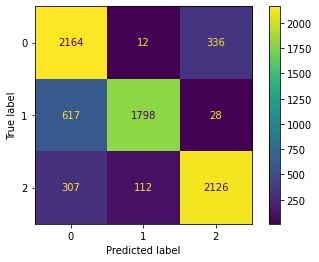

In [ ]:
ypred = clf2.predict(xtest) 
cm = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      2512
           1       0.94      0.74      0.82      2443
           2       0.85      0.84      0.84      2545

    accuracy                           0.81      7500
   macro avg       0.83      0.81      0.81      7500
weighted avg       0.83      0.81      0.81      7500



####Exercise2:  [ fit(  ) Vs. partial_fit(  ) ] [ Incremental Learning ]

---


Use the following dataset: ( 50000 samples with 10 features matrix, 3 classes in the target label, each class having a single cluster)


```
x,y = make_classification(n_samples=50000, n_features=10,
                          n_classes =3,
                          n_clusters_per_class=1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15) 


```

1. Insitantiate a Perceptron object with `max_iter =1000, tol=0.01` then 


> a) **fit** with training data 

> b) Get score on training and test set 

> c) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> d) print classification report

2. Follow the questions below:

> a) Concatnate training data and save it into a csv file

>b) Write a python program to iterate through the csv file with chunk size of 1000 and partial_fit the data, print the value of coefficient and intercept after each iteration

>c) Get score on traininf and test data

>d) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> e) print classification report



---


Compare the results of the fit() vs partial_fit()


---



---



#####Solution:

---



####Exercise3:  [ fit(  ) Vs. partial_fit(  ) ] [ Incremental Learning ]

---


Use the following dataset: ( 50000 samples with 10 features matrix, 3 classes in the target label, each class having a single cluster)


```
x,y = make_classification(n_samples=50000, n_features=10,
                          n_classes =3,
                          n_clusters_per_class=1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15) 


```

1. Insitantiate a MultinomialNB() object with `max_iter =1000, tol=0.01` then 


> a) **fit** with training data 

> b) Get score on training and test set 

> c) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> d) print classification report

2. Follow the questions below:

> a) Concatnate training data and save it into a csv file

>b) Write a python program to iterate through the csv file with chunk size of 1000 and partial_fit the data, print the value of coefficient and intercept after each iteration

>c) Get score on traininf and test data

>d) predict on test data, print confusion matrix 
(confusion_matrix & ConfusionMatrixDisplay)

> e) print classification report



---


Compare the results of the fit() vs partial_fit()


---



---



#####Solution:

---



####Exercise2:  [sample block]

---


Use the following dataset: 


---



In [ ]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape, X_test.shape)

(20640, 8) (20640,)
(14448, 8) (6192, 8)


1. Create a pipeline object with polynomial features, minmax scaler and knn regressor 
2. Use GridSearchCV with the above pipeline object as estimator along with polynomial degree with list(range(1,4)), cv=10
3. Fit the above object wirth the training set
4. Print the best estimator
5. Get the RMSE value using the best estimator

Solution:

---



In [ ]:
params = {'poly__degree': list(range(1,4))} 

pipe = Pipeline([('poly', PolynomialFeatures()),
                ('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor()) ])
gs = GridSearchCV(estimator=pipe,
                  param_grid = params,
                  cv =10,
                  n_jobs=-1) 
gs.fit(X_train, y_train)
reg_knn = gs.best_estimator_ 
print(reg_knn)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])


We evaluate the model with the test set.



In [ ]:
pred = gs.best_estimator_.predict(X_test) 
error = mean_squared_error(y_test, pred, squared=False) 
print('RMSE value of k is:', error)

RMSE value of k is: 0.6313551708664618


###6. Incremental Preprocessing:

---



####Exercise1:  [CountVectorizer Vs. HashingVectorizer]

---


Use the following data: 


```
text_documents = ['The well-known saying an apple a day keeps the doctor away has a very straightforward, literal meaning, that the eating of fruit maintains good health.',
                  'The proverb fist appeared in print in 1866 and over 150 years later is advice that we still pass down through generation.',
                  'British apples are one of the nations best loved fruit and according to Great British Apples, we consume around 122,000 tonnes of them each year.',
                  'But what are the health benefits, and do they really keep the doctor away?']
                  
```




---
1. Create an object of CountVectorizer class.
2. Use this object to vectorize the input text documents using fit transform method
3. Print the shape of the transformed vector, vocabulary (vocabulary_)


---
1. Create an object of HashingVectorizer class.
2. Use this object to vectorize the input text documents using fit transform method
3. Print the shape of the transformed vector, vocabulary (vocabulary_)


#####Solution:

---



In [ ]:
text_documents = ['The well-known saying an apple a day keeps the doctor away has a very straightforward, literal meaning, that the eating of fruit maintains good health.',
                  'The proverb fist appeared in print in 1866 and over 150 years later is advice that we still pass down through generation.',
                  'British apples are one of the nations best loved fruit and according to Great British Apples, we consume around 122,000 tonnes of them each year.',
                  'But what are the health benefits, and do they really keep the doctor away?']

 Incremental Preprocessing Example 

---



`CountVectorizer vs HashingVectorizer` 

Vectorizers are used to convert a collection of text documents to a vector representation, thus helping in preprocessing them before applying any model on these text documents.

`CountVectorizer` and `HashingVectorizer` both perform the task of vectorizing the text documents. However, there are some differences among them.

One difference is that `HashingVectorizer` does not store the resulting vocabulary(i.e. the unique tokens). Hence, it can be used to learn from data that does not fit into the computer's main memory. Each mini-batch is vectorized using `HashingVectorizer` so as to guarantee that the input space of the estimator has always the same dimensionality.

With `HashingVectorizer`, each token directly maps to a pre-defined column position in a matrix. For example, if there are 100 columns in the resultant(vectorized) matrix, each token(word) maps to 1 of the 100 columns. The mapping between the word and the position in matrix is done using hashing.


In other words in `HashingVectorizer`, each token transforms to a column position instead of adding to the vocabulary. Not storing the vocabulary is useful while handling large datasets. This is because holding a huge token vocabulary compromising of millions of words may be a challenging when the memory is limited.

Since `HashingVectorizer` does not store vocabulary. Its object not only takes lesser space. It also alleviates any dependence with function calls performed on the previous chunk of data in case of incremental learning.

Example

---



Let us take some sample text documents and vectorize them, first using CountVectorizer and then HashingVectorizer.





HashingVectorizer 

---



Let us now see how `HashingVectorizer` is different from `CountVectorizer`.

We will create an object of `HashingVectorizer`. While creating the object, we need to specify the number of features we wish to have in the feature matrix.


Overall, `HashingVectorizer` is a good choice if we are falling short of memory and resources, or we need to perform incremental learning. However, `CountVectorizer` is a good choice if we need to access the actual tokens.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
c_vectorizer = CountVectorizer() 


In [ ]:
X_c = c_vectorizer.fit_transform(text_documents) 
X_c.shape

(4, 66)

In [ ]:
c_vectorizer.vocabulary_

{'000': 0,
 '122': 1,
 '150': 2,
 '1866': 3,
 'according': 4,
 'advice': 5,
 'an': 6,
 'and': 7,
 'appeared': 8,
 'apple': 9,
 'apples': 10,
 'are': 11,
 'around': 12,
 'away': 13,
 'benefits': 14,
 'best': 15,
 'british': 16,
 'but': 17,
 'consume': 18,
 'day': 19,
 'do': 20,
 'doctor': 21,
 'down': 22,
 'each': 23,
 'eating': 24,
 'fist': 25,
 'fruit': 26,
 'generation': 27,
 'good': 28,
 'great': 29,
 'has': 30,
 'health': 31,
 'in': 32,
 'is': 33,
 'keep': 34,
 'keeps': 35,
 'known': 36,
 'later': 37,
 'literal': 38,
 'loved': 39,
 'maintains': 40,
 'meaning': 41,
 'nations': 42,
 'of': 43,
 'one': 44,
 'over': 45,
 'pass': 46,
 'print': 47,
 'proverb': 48,
 'really': 49,
 'saying': 50,
 'still': 51,
 'straightforward': 52,
 'that': 53,
 'the': 54,
 'them': 55,
 'they': 56,
 'through': 57,
 'to': 58,
 'tonnes': 59,
 'very': 60,
 'we': 61,
 'well': 62,
 'what': 63,
 'year': 64,
 'years': 65}

In [ ]:
print(X_c)

  (0, 54)	3
  (0, 62)	1
  (0, 36)	1
  (0, 50)	1
  (0, 6)	1
  (0, 9)	1
  (0, 19)	1
  (0, 35)	1
  (0, 21)	1
  (0, 13)	1
  (0, 30)	1
  (0, 60)	1
  (0, 52)	1
  (0, 38)	1
  (0, 41)	1
  (0, 53)	1
  (0, 24)	1
  (0, 43)	1
  (0, 26)	1
  (0, 40)	1
  (0, 28)	1
  (0, 31)	1
  (1, 54)	1
  (1, 53)	1
  (1, 48)	1
  :	:
  (2, 39)	1
  (2, 4)	1
  (2, 58)	1
  (2, 29)	1
  (2, 18)	1
  (2, 12)	1
  (2, 1)	1
  (2, 0)	1
  (2, 59)	1
  (2, 55)	1
  (2, 23)	1
  (2, 64)	1
  (3, 54)	2
  (3, 21)	1
  (3, 13)	1
  (3, 31)	1
  (3, 7)	1
  (3, 11)	1
  (3, 17)	1
  (3, 63)	1
  (3, 14)	1
  (3, 20)	1
  (3, 56)	1
  (3, 49)	1
  (3, 34)	1


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
h_vectorizer = HashingVectorizer() 
X_h = h_vectorizer.fit_transform(text_documents)
X_h.shape

(4, 1048576)

In [ ]:
h_vectorizer = HashingVectorizer(n_features=50) 


In [ ]:
X_h = h_vectorizer.fit_transform(text_documents)

In [ ]:
X_h.shape

(4, 50)

In [ ]:
print(X_h[0])

  (0, 5)	0.0
  (0, 8)	-0.47140452079103173
  (0, 10)	-0.23570226039551587
  (0, 11)	-0.23570226039551587
  (0, 13)	0.0
  (0, 18)	-0.23570226039551587
  (0, 20)	0.23570226039551587
  (0, 26)	0.0
  (0, 29)	0.23570226039551587
  (0, 33)	0.23570226039551587
  (0, 36)	-0.23570226039551587
  (0, 38)	0.47140452079103173
  (0, 39)	-0.23570226039551587
  (0, 45)	-0.23570226039551587
  (0, 46)	0.23570226039551587


####Exercise2:  [ Read Zipped CSV File ]

---


Q. Instead of downloading, unzipping and then reading, directly read the zipped csv file. 

---


For that purpose, we are making use of `urllib.request`, `BytesIO` and `TextIOWrapper` classes)

---



Link: `'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'`

---



Solution:

---



In [ ]:
import pandas as pd 
from io import StringIO, BytesIO, TextIOWrapper 
from zipfile import ZipFile 
import urllib.request

resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),encoding='utf-8') 

df = pd.read_csv(data, sep='\t') 
df.columns = ['review','sentiment']

####Exercise3:  [HashingVectorizer]

---


Use the following dataset: 



```
import pandas as pd 
from io import StringIO, BytesIO, TextIOWrapper 
from zipfile import ZipFile 
import urllib.request

resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),encoding='utf-8') 

df = pd.read_csv(data, sep='\t') 
df.columns = ['review','sentiment

```
**Common Setup:**

---


1. Explore the data by printing head, tail, info, describe 
2. Create X and y from the data based on 'review' and 'sentiment' respectively
3. Split the data with test_size of 0.2

---
**Preprocess:**

---


4. Insitantiate HashingVectorizer object 

> Note: (Since the data is textual, you need to vectorize it. In order to perform incremental learning, you will use HashingVectorizer)

---
**SGDClassifier:**

---


5. Create an instance of SGDClassifier with hinge loss and ridge penalty 


---
**partial_fit():**

---


6. Take the first 400 samples from the training data and partial_fit() your classifier (2 iterations total) and print the score for both the iterations

> Note: We will assume we do not have sufficient memory to handle all the 799 samples in one go for training purpose. So, we will take the first 400 samples from the training data and partial_fit() our classifier.

> Note: Another use case of partial_fit here could also be a scenario where we only have 400 samples available at a time. So, we fit our classifier with them. However, we partial_fit it, to have the possibility of traning it with more data later whenever that becomes available.


---

#####Solution:

---



In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
h_vectorizer = HashingVectorizer(n_features=50) 


In [ ]:
X_h = h_vectorizer.fit_transform(text_documents)

In [ ]:
X_h.shape

(4, 50)

In [ ]:
print(X_h[0])

  (0, 5)	0.0
  (0, 8)	-0.47140452079103173
  (0, 10)	-0.23570226039551587
  (0, 11)	-0.23570226039551587
  (0, 13)	0.0
  (0, 18)	-0.23570226039551587
  (0, 20)	0.23570226039551587
  (0, 26)	0.0
  (0, 29)	0.23570226039551587
  (0, 33)	0.23570226039551587
  (0, 36)	-0.23570226039551587
  (0, 38)	0.47140452079103173
  (0, 39)	-0.23570226039551587
  (0, 45)	-0.23570226039551587
  (0, 46)	0.23570226039551587


In [ ]:
import pandas as pd 
from io import StringIO, BytesIO, TextIOWrapper 
from zipfile import ZipFile 
import urllib.request

resp = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
zipfile = ZipFile(BytesIO(resp.read()))

data = TextIOWrapper(zipfile.open('sentiment labelled sentences/amazon_cells_labelled.txt'),encoding='utf-8') 

df = pd.read_csv(data, sep='\t') 
df.columns = ['review','sentiment']

In [ ]:
df.head()

,review,sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [ ]:
df.tail()

,review,sentiment
994,The screen does get smudged easily because it ...,0
995,What a piece of junk.. I lose more calls on th...,0
996,Item Does Not Match Picture.,0
997,The only thing that disappoint me is the infra...,0
998,"You can not answer calls with the unit, never ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
df.describe()

,sentiment
count,999.000000
mean,0.500501
std,0.500250
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


As we can see, 
* There are 999 samples in the dataset.
* The possible classes for sentiment are 1 and 0.

4. Splitting data into train and test

---




In [ ]:
from sklearn.model_selection import train_test_split 


In [ ]:
X = df.loc[:,'review']
# X2 = df.iloc[:,0]

y = df.loc[:,'sentiment'] 


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train.shape

(799,)

In [ ]:
y_train.shape

(799,)

5. Preprocessing 

---



Since the data is textual, we need to vectorize it. In order to perform incremental learning, we will use `HashingVectorizer`. 

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer 
vectorizer = HashingVectorizer() 


6. Creating an instance of the SGDClassifier 

---




In [ ]:
from sklearn.linear_model import SGDClassifier  
classifier = SGDClassifier(penalty='l2', loss = 'hinge')

7. Iteration 1 of partial_fit() 

---



We will assume we do not have sufficient memory to handle all the 799 samples in one go for training purpose. So, we will take the first 400 samples from the training data and `partial_fit()` our classifier.


Another use case of partial_fit here could also be a scenario where we only have 400 samples available at a time. So, we fit our classifier with them. However, we `partial_fit` it, to have the possibility of traning it with more data later whenever that becomes available.


In [ ]:
X_train_part1_hashed = vectorizer.fit_transform(X_train[0:400]) 
y_train_part1 = y_train[0:400] 


In [ ]:
all_classes = np.unique(df.loc[:,'sentiment']) #we need to mention all classes in the first iteration of partial_fit() 


In [ ]:
classifier.partial_fit(X_train_part1_hashed, y_train_part1, classes = all_classes)

SGDClassifier()

Let us now use this classifier on our test data that we had kept aside earlier.


In [ ]:
X_test_hashed = vectorizer.transform(X_test)#first we will have to preprocess the X_test with the same vectorizer that was fit on the train data.

In [ ]:
test_score = classifier.score(X_test_hashed, y_test)
print('Test score ', test_score)

Test score  0.72


Note: We can also store this classifier using pickle object and can access it later.

8. Iteration 2 of partial_fit()

---



We will now assume that more data became available. So, we will fit the same  classifier with more data and observe if our test score improves.

In [ ]:
X_train_part2_hashed = vectorizer.fit_transform(X_train[400:])
y_train_part2 = y_train[400:]

In [ ]:
classifier.partial_fit(X_train_part2_hashed, y_train_part2)

SGDClassifier()

In [ ]:
test_score = classifier.score(X_test_hashed, y_test)
print("test score:", test_score)

test score: 0.735


We see that our test score has improved after we fed more data to the classifier in the second iteration of `partial_fit()`.



####Exercise3:  [sample block]

---


Use the following dataset: 


---



In [ ]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
print(X_train.shape, X_test.shape)

(20640, 8) (20640,)
(14448, 8) (6192, 8)


1. Create a pipeline object with polynomial features, minmax scaler and knn regressor 
2. Use GridSearchCV with the above pipeline object as estimator along with polynomial degree with list(range(1,4)), cv=10
3. Fit the above object wirth the training set
4. Print the best estimator
5. Get the RMSE value using the best estimator

Solution:

---



In [ ]:
params = {'poly__degree': list(range(1,4))} 

pipe = Pipeline([('poly', PolynomialFeatures()),
                ('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor()) ])
gs = GridSearchCV(estimator=pipe,
                  param_grid = params,
                  cv =10,
                  n_jobs=-1) 
gs.fit(X_train, y_train)
reg_knn = gs.best_estimator_ 
print(reg_knn)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])


We evaluate the model with the test set.



In [ ]:
pred = gs.best_estimator_.predict(X_test) 
error = mean_squared_error(y_test, pred, squared=False) 
print('RMSE value of k is:', error)

RMSE value of k is: 0.6313551708664618


##Week8: (SVM)

---



###1. MNIST Dataset:

---



####Exercise1:  [Load Data]

---


1. Use the keras datasets and load the MNIST dataset
2. Flatten each input image (X_train and X_test) into a vector of length 784 
3. Normalize the X_train and X_test (dividing by 255)
4. Condition: Consider the first 10000 images in training dataset and first 2000 images in testing dataset. Based on the condition create X_train, X_test, y_train, y_test


---



Solution:

---



In [ ]:
from keras.datasets import mnist 


#Load dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0],28*28) 
X_test = X_test.reshape(X_test.shape[0],28*28) 

#Normalizing 
X_train = X_train/255 
X_test = X_test/255 

#creating subset of data
X_train = X_train[0:10000,:] 
y_train = y_train[0:10000] 
X_test = X_test[0:2000,:] 
y_test = y_test[0:2000]

11501568/11490434 [==============================] - 0s 0us/step


###2. SVM (Multiclass):

---



####Exercise1:  [Linear SVM]

---


Use the following dataset: 



```
from keras.datasets import mnist 


#Load dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0],28*28) 
X_test = X_test.reshape(X_test.shape[0],28*28) 

#Normalizing 
X_train = X_train/255 
X_test = X_test/255 

#creating subset of data
X_train = X_train[0:10000,:] 
y_train = y_train[0:10000] 
X_test = X_test[0:2000,:] 
y_test = y_test[0:2000]

```


1. Create a pipeline object 'pipe_1' and use a scaler of minmax scaler, a linear svm classifier with C=1

2. Evaluate the model using crossvalidation with cv =2 and print the training accuracy


3. Print confusion matrix and classification report

---



#####Solution:

---



In [ ]:
pipe_1 = Pipeline([('scaler',MinMaxScaler()),
                   ('classifier',SVC(kernel='linear',C=1))])
pipe_1.fit(X_train,y_train.ravel()) 

#Evaluate the model using crossvalidation 

acc = cross_val_score(pipe_1,X_train, y_train.ravel(), cv=2) 

print("Training Accuracy:{:.2f}".format(acc.mean()*100)) 


Training Accuracy:91.07


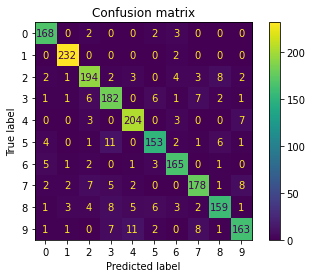

In [ ]:
#Visualizaing the confusion matrix 

y_pred = pipe_1.predict(X_test) 

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.title("Confusion matrix") 
plt.show()

In [ ]:
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



####Exercise2:  [Non-Linear SVM]

---


Use the following dataset: 



```
from keras.datasets import mnist 


#Load dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0],28*28) 
X_test = X_test.reshape(X_test.shape[0],28*28) 

#Normalizing 
X_train = X_train/255 
X_test = X_test/255 

#creating subset of data
X_train = X_train[0:10000,:] 
y_train = y_train[0:10000] 
X_test = X_test[0:2000,:] 
y_test = y_test[0:2000]

```


1. Create a pipeline object 'pipe_2' and use a scaler of minmax scaler, a  svm classifier with `kernel='rbf',gamma=0.1, C=1`

2. Evaluate the model using crossvalidation with `cv =2` and print the training accuracy


3. Print confusion matrix and classification report

---



#####Solution:

---



In [ ]:
pipe_2 = Pipeline([('scalerr',MinMaxScaler()),
                   ('classifier',SVC(kernel='rbf',gamma=0.1, C=1))]) 

pipe_2.fit(X_train,y_train.ravel()) 

#Evaluate the model using crossvalidation
acc = cross_val_score(pipe_2, X_train, y_train.ravel(),cv=2) 

print("Training Accuracy:{:.2f}".format(acc.mean()*100)) 


Training Accuracy:82.87


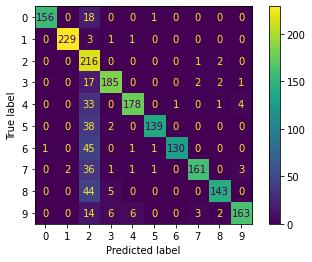

In [ ]:
y_pred = pipe_2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



####Exercise3:  [GridSearchCV]

---


Use the following dataset: 



```
from keras.datasets import mnist 


#Load dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0],28*28) 
X_test = X_test.reshape(X_test.shape[0],28*28) 

#Normalizing 
X_train = X_train/255 
X_test = X_test/255 

#creating subset of data
X_train = X_train[0:10000,:] 
y_train = y_train[0:10000] 
X_test = X_test[0:2000,:] 
y_test = y_test[0:2000]

```


1. Train the feature matrix of train and test data with standard scaler

2. Use the C and gamma values as: 
> `C_range = np.logspace(-2,10,13), gamma_range = np.logspace(-9,3,13)` 


3. Use a stratified shuffle split with 3 splits, test_size as 0.2 and random_state as 42

4. Fit the GridSearchCV object with the training data and print the best parameters and best score

---






#####Solution:

---



In [ ]:
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test) 

C_range = np.logspace(-2,10,13) 
gamma_range = np.logspace(-9,3,13) 
param_grid = dict(gamma=gamma_range, C= C_range) 
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42) 
grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv =cv) 
grid.fit(X_train,y_train.ravel()) 

print(f"The best parameters are{grid.best_params_, grid.best_score_:.2f}")

##Week9: (Decision Trees)

---



####Exercise2:  [Sample Block]

---


Use the following dataset: 


---



Solution:

---



##Week10: (Ensemble Learning)

---



####Exercise3:  [sample block]

---


Use the following dataset: 


---



Solution:

---



##Week11: (Clustering)

---



####Exercise3:  [sample block]

---


Use the following dataset: 


---



Solution:

---



#Notes:

### Week2

---



Data pre-processing Techniques

___
Data preprocessing involves several transformations that are applied to the raw data to make it more amenable for learning. It is carried out before using it for model training or prediction.

There are many pre-processing techniques for 
* Data Cleaning
  * Data Imputation
  * Feature scaling
* Feature transformation
  * Polynomial Features
  * Discretization
  * Handling categorical features
  * Custom Transformers
  * Composiste Transformers
    * Apply Transformation to diverse features
    * TargetTranformedRegressor
* Feature selection
    * Filter based feature selection
    * Wrapper based feature selection
* Feature Extraction
  * PCA

The transformation are applied in a specific order and the order can be specified via ```Pipeline```. We need to apply different transformations based on the feature type. `FeatureUnion` helps us perform that task and combine outputs from multiple transformations into a single transformed feature matrix. We will also study as how to visualize this pipeline.

Importing basic libraries

---

In this colab, we are importing as needed. However it is a good practice to have all imports in one cell -arranged in alphabetical order. This helps us weed out any duplicate imports and some such issues.


1.**Feature Extraction**

DictVectorizer
Many a times the data is present as a $\textbf {list of dictionary objects.}$ ML algorithms expect the data in **matrix form** with shape $(n,m)$ where $n$ is the number of samples and $m$ is the number of features.
`Vectorizer` **converts** a list of dictionary objects to feature matrix.

Let's create a sample data for demo purpose containing `age` and `height` of children.
  Each record/sample is a dictionary with two keys `age` and `height` , and corresponding values.
  


Data Imputation

---
  * Many machine learning algorithms need full feature matrix and they mayy not work in presence of missing data.
  * Data imputation identifies **missing values** in each featurer of the dataset and **replaces** them with an **appropriate values** based on a **fixed strategy** such as
    * **mean** or **median** or **mode** of that feature.
    * **use specified constant** value
Sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose.

Some of its important parameters:
  * *missing_values:* could be `int`,`str`,`np.nan` or `None`. Default is `np.nan`.
  * `strategy`: string, default is 'mean'. One the following strategies can be used:
    * `mean`- missing values are  replaced using the **mean** along each column.
    * `median`-missing values are replaced using the **median** along each column.
    * `most_frequent`-missing values are replaced using the **most_frequent** along each column
    * `constant` -missing values are replaced with value specified in `fill_value` argument.
    * `add_indicator` is a boolean parameter that when set to `True` returns **missing value indicators** in `indicator_` memeber value.

**Note** 
   * `mean` and `median` strategies can nonly be used with numeric data. 
   * `most_frequent` and `constant` strategies can be used with strings or numberic data.

Data imputation on real world dataset.

---
  Let's perform data imputation on real world dataset. We will be using <https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data> for this purpose. We will load this dataset from csv file.

The dataset has the following features:
    
    Age (in years)
    sex(1=male; 0=female)
    cp - chest pain type
    trestbps - resting blood pressure (anything above 130-140 is typically cause for concern) 
    fbs -fasting blood sugar (>120 mg/dl) (1=true; 0 = false)
    restecg - resting electrocardiographic results
        * normal=0
        * 1 = having ST-T wave abnormality;
        * 2 = showing probable or definite left ventricular hypertropy by Estes' criteria
    thalch - maximum heart rate achieved
    exang -excercise induced angina
        * 1 = yes
        * 0 = no
    oldpeak - depression induced by excercise relative to rest
    slope - slope of the peak excercise ST segment
        * 1 = unsloping;
        * 2 = flat value;
        * 3 = downsloping
    ca - number of major vessels (0-3) colored by fluroscopy 
    thal - (3 = normal; 6 =fixed defect; 7 = reversable defect)
    num - diagnosis of heart disease (angiographic disease status) (
      * 0 < 50% diameter narrowing;
      * 1: . 50% diameter narrowing

**STEP 1** Check if the data contains missing values.
* This can be checked via dataset description or by check number of `nan` or `np.null` in the dataframe. However such check can be performed only for numerical features.
* For non-numberical features, we can list their unique values and check if there are values like `?`.

**STEP 2** Replace '?' with `nan`.

**STEP 3**: Fill the missing values with `sklearn` missing value imputation utilities.
> Here we use `SimpleImputer` with `mean` strategy.

We will try two variations-
* add_indicator = `False`: Default choice that only imputes missing values.


`add_indicator = True:` Adds additional column for each column containing missing values. In our case, this adds two columns one for `ca` and other for `thal`. It indicates if the sample has a missing value.
now the number of extra column added will be 1 per missing columns that contains the boolean value i.e True/False to indicate that earlier some values were missing. It is just like a pointer for missing  value update.

**Feature Scaling**
Feature Scaling **transform feature values** such that **all the features are on the same scale**
When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:
* __Enables Faster Convergence__ in iterative optimization algorithms like gradien descent and its variants.
* The performance of ML algorithms such as SVM, K-NN and K-means etc that compute euclidean distance among input samples gets impacted if the features are not scaled.

`Tree` based Ml algorithms are not affected by feature-scaling. In other words, feature scaling is not required for `tree` based ML algorithms.
Feature scaling can be performed with the following methods:
* Standardization
* Normalization
* MaxAbsScaler

Let's demonstrate feature scaling on a real world dataset. For This purpose we will be using <https://archive.ics.uci.edu/ml/datasets/Abalone> We will use different scaling utilities in `sklearn` library.

[Abalone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data) has the following columns:
    
    Sex -nominal (M, F, and I (infant)) 
    Length (mm - Longest shell measurement) 
    Diameter (mm - perpendicular to lenght)
    Height (mm - with meat in shell) 
    Whole weight (grams -whole abalone)
    Shucked weight (grams - whole abalone)
    Viscera weight (grams - gut weight (after bleeding))
    Shell weight (grams - after being dried)
    Rings (target - age in years)
    

**STEP 1:** Examine the dataset
Feature scaling is performed only on numerical attributes. Let's check which are numerical attributes in this dataset. We can get that via `info()` method.

**STEP 1a [Optional]: Convert non-numerical attributes to numerical ones. 
> In this dataset, `sex` is a non-numeric column in this dataset. Let's examine it and see if we can convert it to numeric representation.


**STEP**: Separate labels from features.


**STEP 3:** Examine feature scales

 Statistical method
  check the scales of different feature with `describe` method of dataframe.
  

Note that
* There are 4177 examples or rows in this dataset.
* The mean and standard deviation of features are quite different from one another.

> We can confirm that with a variety of visualization techniques and plots.
Visualization of feature distributions.

  Visualize feature distributions.
  * HIstrogram
  * Kernel density estimation (KDE) plot
  * Box
  * Violin

Feature histogram:
  We will have separate and combined histogram plots to check if the feature are indeed on different scales.

  

KDE plot
Alternatively, we can generate **Kernel Density Estimate** plot using Gaussian Kernels.
> In statistics, kernel density function (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
This function uses Gaussian Kernels and includes automatic bandwidth determination.
>##@title [KDE plots - combined]
ax =abalone_data.plot.kde()

Observe that the features have different distributions and scales.
Box plot

---
A **box plot** (or box-and-whisker plot) shows the **distribution of quantitative** in a way that facilitates comparisions between variables or across levels of a categorical variables.

The box shows the **quartiles** of the dataset while the **whiskers** extend to show the rest of the distribution, except for points that are determined to be 'outliers' using a method that is a function of the inter-quartile range.

[Box Plot]

---
** sns.boxplot(data=abalone_data, orient='h')


**STEP 4:** Scaling


Normalization

The features are normalized such that their range lies between $[0,1] or [-1,1]$.There are two way to achieve this.

* `MaxAbsScaler` transform features in range $[-1,1]$ 
* `MinMaxScaler` transforms features in range $[0,1]$

MaxAbsScaler
It transforms the original features vector $ \textbf x$ into new feature vector $\textbf x^{'} $ so that all values fall within range [-1,1] \\
\begin{equation} \textbf x^{'} = \frac{\textbf x}{\text {MaxAbsoluteValue}}\end{equation}

where \begin{equation} \text {MaxAbsolutevalue}= \text {max}(\textbf x.max,|\textbf x.min|)\end{equation}


MinMaxScaler 

---
Normalization is a procedure in which the features' values are scaled such that they range between 0 and 1. This technique is also called **min-max scaling**. It is performed with the following formula:
\begin{equation} \mathbf X_{new} = \frac{X_{old} - X_{min} }{\mathbf X_{max} - X_{min}}\end{equation}

Where
* $X_{old}$ is the old value of a data point, which is rescaled to $ X_{new}$.
* $X_{min}$ is minimum value of feature $X$
* $X_{max}$, is maximum value of feature $X$.

Normalization can be achieved by `MinMaxScaler` from sklearn library.


Standardization 

---

Standardization is another feature scaling technique that results into (close to ) zero mean and unit standard deviation of a feature's values.
Formula for standardization:
\begin{equation} X_{new} = \frac{X_{old}-\mu}{\sigma}\end{equation}

Here $\mu$  and $\sigma$ respectively are the mean and standard deviation of the feature values.

Standardization can be achieved by StandardScaler from sklearn library.


4. `add_dummy_feature`
Augments dataset with a column vector, each value in the column vector is 1. this is useful for adding a parameter for bias term in the model.

**5.Custom transformers**

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

Useful when:
1. The dataset consists of *hetereogeneous data types* (e.g. raster images and text captions),
2. The dataset is stored in a `pandas.DataFrame` and different columns reuqire *different processing pipelines.*
3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [ ]:
from sklearn.preprocessing import FunctionTransformer 


You can implement a transformer from an arbitrary function with `FunctionTransformer`. 
* For example, let us build a tranformer that applies a log transformation to features.
For this demonstration, we will be using a  [wine quality dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) from uci machine learning repository.

It has got the following attributes:

    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide 
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
    12. quality (output: score between 0 and 10) 
    

**6 Polynomial Features** 

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form $[a,b]$, the degree-2 polynomial features are $[1,a,a^2,ab,b^2]$. 
`sklearn.preprocessing.PolynomialFeatures` enables us to perform polynomial transformation of desired degree. Let's demonstrate it with *wine quality* dataset.


7. Discretization**

**Discretization** (otherwise known as **quantization or binning**) provides a way to partition continuous features into discrete values.


* Certain datasets with conntinuous features may benefit from discretization, because discretization can transform the datasets of continuous attributes to one with only nomial attributes.
* One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.
* For instance, pre-processing with discretizer can introduce non-linearity to linear models.



**8. Handling Categorical Features** 


We need to convert the categorical features into numeric features.
1. Ordinal encoding
2. One hot encoding
3. Label encoding
4. Using dummy variables


**Ordinal Encoding** 

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate from before they feeding them for training an ML model.

Our intuitive way of handling them could be to assign them a numerical value. As an example, take state as a feature with 'Punjab', Rajasthan, and Haryana as the possible values. We might consider assigning number to these values as follows:


    Old feature | New feature
    ------------|-------------
    Punjab      |     1
    Rajasthan   |     2
    Haryana     |     3
    


However, this approach assigns some ordering to the labels, i.e. states, thus representing that Haryana is thrice Punjab and Rajasthan is twice Pubjab, these relationships do not exist in the data, thus providing wrong information to the ML model. 

One of the most-common approaches to handle this is: *One-hot encoding*


One-hot Encoding

---

This approach consists of creating an addtional feature for each label present in categorical feature(i.e. the number of different states here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is, 

      Old feature  |  $ New feature_1 (punjab) | New feature_2 (Rajasthan) | New feature_3(Haryana) 
     --------------|---------------------------|---------------------------|------------------------
     Punjab        |          1                |           0               |         0
     --------------|---------------------------|---------------------------|------------------------
     Rajasthan     |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------
     Haryana       |          0                |           1               |         0
     --------------|---------------------------|---------------------------|------------------------


It may be implemented using `OneHotEncoder` class from sklearn.preprocessing module. Let's demonstrate this concept with `Iris` dataset.


LabelEncoder

---
Another option is to use `LabelEncoder` for transforming categorical features into integer codes.

MultilabelBinarizer

---

Encodes categorical features with value 0 to $ k-1$ where $k$ is number of classes. As the name suggests for case where output are multilabels there we use each unique label as column and assign 0 or 1 depending upon in the dataset that value is present or not. Movie generes is best example to understand.



9. Composite Transformers

---
It applies a set of transformers to columns of an array or `pandas.DataFrame`, concatenates the transformed outputs from different transformers into a single matrix.
* It is useful for transforming heterogeneous data by applying different transformers to separate subsets of features.
* It combines different feature selection mechanism and transformation into a single transformer object.

**TransformedTargetRegressor**

> Transforms the target variable `y` before fitting a regression model.
* The predicted values are mapped back to the original space via an inverse transform.
* It takes **regressor** and **transformer** to be applied to the target variable as arguments.


**Feature selection** 

`sklearn.feature_selection` module has useful APIs to select features/reduce dimensionality, either to improve estimators' accuracy score or to boost their performance on very high-dimensional datasets.

Filter based methods

---

Variance Threshold 

---

This transformer helps to keep only high variance features by providing a certain threshold.
> Features with  variance greater or equal to threshold value are kept rest are removed.

> By default it removes any feature with same value i.e. 0 variance.


As you may observe from output of above cell, the transformer has removed the `age` feature because its variance is below the threshold.

SelectKBest 

---
It selects `k` highest scoring features based on a function and removes the rest of the features.

Let's take an example of California Housing Dataset.


Let's select 3 most important features, since it is a regression problem, we can use only `mutual_info_regression` of `f_regression` scoring functions only.

Select Percentile 

---
This is very similar to `SelectKBest` from previous section, the only difference is, it selects top `percentile` of all features and drops the rest of features.

Similar to `SelecKBest`, it also uses a scoring function to decide the importance of features.

Let's use the california housing price dataset for this API.

GenericUnivariateSelect

---


It applies  univariate feature selection with a certain strategy, which is passed to the API via `mode` parameter. The `mode` can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr`(false positive rate), `fdr` (false discovery rate), `fwe` (family wise error rate) 

If you want to accomplish the same objective as `SelectKBest`, we can use following code: 


RFE (Recursive Feature Elimination) 
* __STEP 1__: Fits a model and 
* __STEP 2__: Ranks the features, afterwards it removes one or more features(depending upn `step` parameter)

These two steps are repeated until desired number of features are selected.



RFE-CV

This adds another layer of cross validation to `RFE`. 

SelectFromModel 

---

>Selects desired number of important features(as specified with `max_features` parameter) above certain threshold of feature importance as obtained from the trained estimator.
* The feature importance is obtained via `coef_`, `feature_importance_` or an `importance_getter` callable from the trained estimator.
* The feature importance threshold can be specified either numerically or through string argument based on built-in heuristics such as `mean`, `median` and `float` multiples of these like `0.1*mean`.


The following example uses california housing price dataset. Using `SelectFromModel` top three features are selected.



SequentialFeatureSelection 

---

It performs feature selection by selecting or deselecting features one by one in a greedy manner. 

**11. PCA**
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.
It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Let's generate some artificial data to better understand PCA.


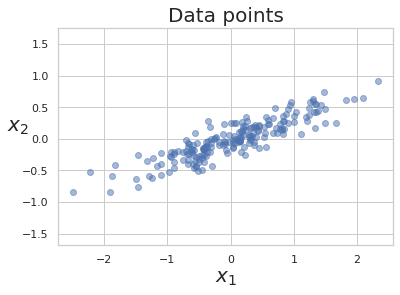

In [ ]:
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');

Let us fit a `PCA` transformer on this data and compute its two principal components: 

In [ ]:
from sklearn.decomposition import PCA 
pca =PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principle axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where **each column returns them in the form of a matrix, where each column represents a principle component:** 


In [ ]:
print(f'The {pca.n_components_} principle axes are \n',pca.components_)

The 2 principle axes are 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Let's also look at the explained variance corresponding to each priciple axes.

In [ ]:
print('Explained variance by each component', pca.explained_variance_)

Explained variance by each component [0.7625315 0.0184779]


To better understand PCA, let's visualize these principle axex.
* There are two principle axes $ C_1 and C_2$. They are orthogonal to each other. An additional vector $C_3$ is also mentioned for comparision.
* The lenghts of $C_1$ and $C_2$ are taken as square root of respective explained variance. The length of the vector implies how important that vector is.

In [ ]:
# draw projections of data points on different vectors

projections = X@pca.components_ 
print(projections.shape)
c3= X[2]
arbitary_projection = X@c3 
print(arbitary_projection.shape)


(200, 2)
(200,)


Text(0.5, 0, '$z$')

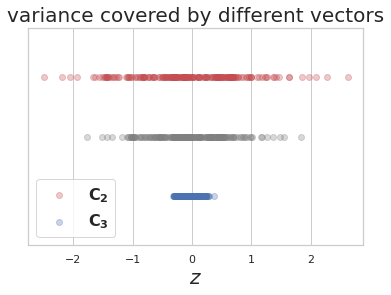

In [ ]:
#plt.figure(figsize=(8,6))
plt.scatter(projections[:,0], 1+np.zeros((200,1)),alpha=0.3, color='r')
plt.scatter(projections[:,1], -1+np.zeros((200,1)),alpha=0.3, color='b')
plt.scatter(arbitary_projection, np.zeros((200,)),alpha=0.3, color='grey')
plt.legend(['$\mathbf{C_2}$','$\mathbf{C_3}$'],prop={'size': 16})
plt.title("variance covered by different vectors",size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size =20)

Reducing Dimensions

---
We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture high(i.e. desired) amount of variance are kept.


Let's reduce the dimension of our data from 2 to 1. You can observe the transformed data has only 1 feature.


In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) 
print('original shape:', X.shape)
print('transformed shape',X_pca.shape)

original shape: (200, 2)
transformed shape (200, 1)


To better understand what happened to our data, let's visualize our original data and the reduced data.
To do this, we will need to bring the transformed data into space or original data, which can be accomplished by `inverse_transform` method of `PCA` object.


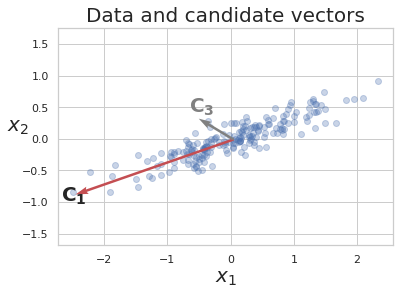

In [ ]:
#@ Visualize data in PC space
@title [Visualize principal components]

# set x and y labels

plt.figure()

plt.title('Data and candidate vectors', size = 20)

plt.xlabel('$x_1$', size=20)

plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 

                                    pca.components_, 

                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],

                                    ['r','b']):

    v = principal_axis * np.sqrt(length)

    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis

    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis

    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component

lengths = np.eye(2)

np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,

           *(1.1*(c3-pca.mean_)),

           scale=1,

           scale_units='xy',

           color='grey')

# label the  principal axis

plt.text(*(1.4*c3), 

         '$\mathbf{C_3}$', 

         size = 20,

         color='grey')

plt.axis('equal')

plt.show()

From above chart it is clear that the new/transformed data points are now projected on $\mathbf C_1$ vector. 


**Chaining Transformers**

The preprocessing transformations are applied one after another on the input feature matrix.
>It is important to apply exactly same transformation on training, evaluation and test set in the same order.
Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.
The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

Pipeline

---

Sequentially apply a list of transformers and estimators.
* Intermediate steps of the pipeline must be 'transformer' that is, they must implement `fit` and `transform` methods.
* The final estimator only needs to implement `fit`. 

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

Creating pipelines

A pipeline can be created with `Pipeline()`. It takes a list of ('estimatorsName',estimator(...)) tuples. The pipeline object exposes interface of the last step.

The same pipeline can also be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

Accessing parameters of a step in pipeline



---


Parameters of the estimators in the pipeline can be accessed using the __syntax, note there are two undercores 

In [ ]:
estimators = [
              ('simpleImputer',SimpleImputer()),
              ('pca', PCA()),
              ('regressor',LinearRegression())
]
pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])


In above example `n_components` of `PCA()` step is set after the pipeline is created.

**GridSearch with pipeline**




---
By using naming convention of nested parameters, grid search can be implemented.


In [ ]:
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                           SimpleImputer(),
                           KNNImputer()],
                  clf=[SVC(),LogisticRegression()],
                  clf_C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid = param_grid)


* `c` is an inverse of regularization, lower its value stronger the regularization is.
* In the example above `clf_C` provides a set of values for grid search.



Caching Transformers



---



Transforming data is a computationally expensive step.
* For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and the transformed data can be reused.

This can be achived by setting `memory` parameter of `pipeline` object.



FeaturerUnion 

---
Concatenates results of multiple transformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.
`FeatuerUnion` and `Pipeline` can be used to create complex transformers.

**Visualizaing Pipelines**


14. Handling Imbalanced Data 


---




Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversampling

[Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

![Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)



We will demonstrate how to handle imbalance with the help of wine quality dataset that we have used earlier in this notebook.

We will reload this dataset once more before using it for the demonstration.


Undersampling


---



Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library 


**Oversampling**

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using RandomOverSampler class from imblearn library.



**Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for over sampling. It is available under **imblean** library.


**Types of SMOTE** 
* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)

### Week6

---



In [ ]:
Slides: https://drive.google.com/drive/folders/1VLWDupp6MBTpGYNe63B1XSZ2kYlPXUKx